In [1]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

pd.options.display.max_columns = None

from IPython.display import display

# **Preparación del Dataset**
Leer el csv de los datos y bajar el DataFrame.


In [2]:
dir_dataset = 'https://raw.githubusercontent.com/claudia-ramos/7506R-1C2024-GRUPO3/main/Datasets/properati_argentina_2021.csv'
df = pd.read_csv(dir_dataset)

# **Análisis Inicial del Dataset**

Mostramos la cantidad de registros y columnas.



In [3]:
print("Cantidad de filas:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])

Cantidad de filas: 460154
Cantidad de columnas: 20


Mostramos los nombres de las columnas.

In [4]:
df.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Mostramos los primeros y últimos 3 registros del Dataset.

In [5]:
df.head(3)

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   

   property_surface_covered  property_price property_currency  property_title  
0                     206.0             NaN               NaN  Casa - Capital  
1                     193.0        390000.0               USD   Casa - Malvín  
2                      45.0         47000.0               USD  Casa - Uruguay

In [6]:
df.tail(3)

id  start_date    end_date  created_on  \
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

       place_l4 place_l5  place_l6 operation    property_type  property_rooms  \
460151      NaN      NaN       NaN     Venta  Local comercial             NaN   
460152      NaN      NaN       NaN  Alquiler  Local comercial             NaN   
460153      NaN      NaN       NaN     Venta  Local comercial             1.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
460151                NaN                   915.0                     915.0   
460152                NaN                     NaN                      15.0   
460153                NaN                   243.0                     133.0   

        property_price property_currency  \
460151        800000.0               USD   
460152             NaN               NaN   
460153        160000.0               USD   

                                           property_title  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

Mostramos una informacion general de los diferentes variables y el tipo de dato.


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Podemos observar que el Dataset cuenta con 20 columnas:


*   **Id**: Identificador de cada propiedad en el Dataset.
*   **Start_date**: Fecha inicio de la operación.
*   **End_date**: Fecha final de la operación.
*   **Created_on**: Fecha de cración del anuncio en Properati.
*   **Latitud**: Coordenada geográfica de la propiedad.

*   **Longitud**: Coordenada geográfica de la propiedad.

**Observación**:  Observamos que en los campos donde se menciona la ubicación respecto de un lugar, por ejemplo la provincia, municipio o barrio donde se ubica la propiedad; son cinco campos completados por la persona que creó el anuncio de la propiedad donde no necesariamente completó todos los campos. Generalmente cada campo se completa de la siguiente manera:
* **Place_l2**: Provincia donde se ubica la propiedad.
* **Place_l3**: Departamento/comuna/localidad donde se ubica la propiedad.
* **Place_l4**: Zona o barrio donde se ubica la propiedad.
* **Place_l5**: Zona donde se ubica la propiedad.

* **Place_l6**: Sin informacion pero concluimos que por el nombre tambien puede referirse a la zona del lugar donde se ubica la propiedad.

Describimos los campos restantes.

* **Operation**: Tipo de operación.

* **Property_type**: Tipo de propiedad. Puede ser casa,departamento, PH, etc.

*  **Property_rooms**: Cantidad de habitaciones.

*  **Property_bedrooms**: Cantidad de dormitorios.

* **Property_surface_total**: Superficie total en metros cuadrados.
* **Property_surface_covered**: Superficie cubierta total en metros cuadrados.
* **Property_price**: Precio de la propiedad.
* **Property_currency**: Divisa del precio de la propiedad.
* **Property_title**: Titulo del anuncio de la propiedad en Properati.







Cada variable de las diferentes columnas se pueden dividir en:


*   Cuantitativas (numéricas) que pueden ser discretas o continuas.
*   Cualitativas (categorias)  que pueden ser nominales y ordinales.

En nuestro Dataset se clasifican en:


Variables cuantitativas discretas


*  **Property_rooms**
* **Property_bedrooms**

Variables cuantitativas continuas

* **Latitud**
* **Longitud**
* **Property_surface_total**
* **Property_surface_covered**
* **Property_price**

Mostramos las medidas de resumen











In [8]:
variables_cuantitativas = ['latitud', 'longitud','property_rooms','property_bedrooms','property_surface_total','property_surface_covered','property_price']
df[variables_cuantitativas].describe()

latitud       longitud  property_rooms  property_bedrooms  \
count  419740.000000  419740.000000   368498.000000      344113.000000   
mean      -34.228570     -59.557066        3.278053           2.297960   
std         3.251509       2.905129        1.870832           1.673985   
min       -54.832057    -103.219258        1.000000          -3.000000   
25%       -34.640132     -58.899343        2.000000           1.000000   
50%       -34.585122     -58.488309        3.000000           2.000000   
75%       -34.423414     -58.404876        4.000000           3.000000   
max        42.557773     -35.044991       40.000000         390.000000   

       property_surface_total  property_surface_covered  property_price  
count           397813.000000              4.279160e+05    4.421530e+05  
mean               420.601250              9.605005e+03    3.063273e+05  
std               4026.380748              3.440367e+06    4.899613e+06  
min                 -1.000000             -3.000000e+00    0.000000e+00  
25%                 50.000000              4.500000e+01    4.490000e+04  
50%                 90.000000              7.800000e+01    9.800000e+04  
75%                210.000000              1.700000e+02    1.990000e+05  
max             200000.000000              2.147484e+09    1.500000e+09

Variables cualitativas nominales

* **Place_12**
* **Place_13**
* **Place_14**
* **Place_15**
* **Place_16**
* **Property_currency**
* **Property_title**
* **Property_type**
* **Operation**
* **Id**

Mostramos cantidad de valores posibles y frecuencia de cada uno.



In [9]:
frecuencia = df['place_l2'].value_counts()
print("VALORES POSIBLES DE PLACE_L2 ")
print(frecuencia)


VALORES POSIBLES DE PLACE_L2 
place_l2
Capital Federal                 157563
Bs.As. G.B.A. Zona Norte         89693
Santa Fe                         47861
Bs.As. G.B.A. Zona Sur           47754
Bs.As. G.B.A. Zona Oeste         28352
Córdoba                          22528
Buenos Aires Costa Atlántica     12457
Neuquén                           8788
Montevideo                        7494
Buenos Aires Interior             6274
Maldonado                         5540
Mendoza                           5395
Río Negro                         5280
Tucumán                           3571
Colonia                           2535
Salta                             1537
Entre Ríos                        1216
San Juan                           997
La Pampa                           783
Canelones                          744
Chubut                             701
San Luis                           677
Misiones                           529
Florida                            411
Jujuy                    

In [10]:
frecuencia = df['place_l3'].value_counts()
print("VALORES POSIBLES DE PLACE_L3 ")
print(frecuencia)

VALORES POSIBLES DE PLACE_L3 
place_l3
Rosario              34735
Palermo              25811
Tigre                24327
La Plata             20230
Pilar                15648
                     ...  
Saladas                  1
El Chaltén               1
Paso del Sapo            1
Realicó                  1
Carlos Pellegrini        1
Name: count, Length: 767, dtype: int64


In [11]:
frecuencia = df['place_l4'].value_counts()
print("VALORES POSIBLES DE PLACE_L4 ")
print(frecuencia)

VALORES POSIBLES DE PLACE_L4 
place_l4
La Plata                       10253
Nordelta                        8637
Olivos                          3976
Ramos Mejía                     3413
Palermo Hollywood               2967
                               ...  
José C Paz                         1
Del Valle                          1
Barrio Cerrado "Las Marías"        1
Cachoeira do Bom Jesus             1
Juan José Paso                     1
Name: count, Length: 791, dtype: int64


In [12]:
frecuencia = df['place_l5'].value_counts()
print("VALORES POSIBLES DE PLACE_L5 ")
print(frecuencia)

VALORES POSIBLES DE PLACE_L5 
place_l5
BarrioPortezuelo                510
Barrio El Golf                  355
Barrio Los Alisos               314
Barrio Los Lagos                176
Barrio Los Sauces               162
Barrio Los Castores             122
Barrio La Alameda               105
Barrio Cabos del Lago            82
Barrio Lagos del Golf 2          82
Barrio Las Glorietas             77
Barrio Las Caletas               76
Barrio La Isla                   76
Barrio Los Tilos                 72
Islas del Canal                  41
Barrio El Yacht                  40
Barrio Barrancas del Lago        37
QBay Yacht                       31
Enyoi                            27
Barrio Lagos del Golf 1          23
Barrio Residencial Pacheco 2     22
Name: count, dtype: int64


In [13]:
frecuencia = df['place_l6'].value_counts()
print("VALORES POSIBLES DE PLACE_L6 ")
print(frecuencia)

VALORES POSIBLES DE PLACE_L6 
Series([], Name: count, dtype: int64)


In [14]:
frecuencia = df['property_currency'].value_counts()
print("VALORES POSIBLES DE PROPERTY_CURRENCY ")
print(frecuencia)

VALORES POSIBLES DE PROPERTY_CURRENCY 
property_currency
USD    349104
ARS     88869
UYU      3506
PEN        99
COP        12
Name: count, dtype: int64


In [15]:
frecuencia = df['property_type'].value_counts()
print("VALORES POSIBLES DE PROPERTY_TYPE ")
print(frecuencia)

VALORES POSIBLES DE PROPERTY_TYPE 
property_type
Departamento       231358
Casa               120768
Lote                28748
PH                  25910
Local comercial     20546
Oficina             16085
Otro                 7713
Cochera              4111
Depósito             4050
Casa de campo         865
Name: count, dtype: int64


In [16]:
frecuencia = df['operation'].value_counts()
print("VALORES POSIBLES DE OPERATION ")
print(frecuencia)

VALORES POSIBLES DE OPERATION 
operation
Venta                337874
Alquiler              98900
Alquiler temporal     23380
Name: count, dtype: int64


In [17]:
frecuencia = df['property_title'].value_counts()
print("VALORES POSIBLES DE PROPERTY_TITLE ")
print(frecuencia)

VALORES POSIBLES DE PROPERTY_TITLE 
property_title
Departamento - La Plata                                 3102
Departamento - Palermo                                  2858
Departamento - Recoleta                                 2568
Departamento - Centro                                   2293
Departamento - Belgrano                                 1880
                                                        ... 
Casa/PH en venta. Bernal Centro                            1
CASA EN VENTA CON  JARDÍN                                  1
BUENOS AIRES 976 00 03                                     1
CASA INTERNA 2 DORMITORIOS Y GRAN PATIO DORREGO 1100       1
Local - Playa Grande                                       1
Name: count, Length: 253326, dtype: int64


In [18]:
frecuencia = df['id'].value_counts()
print("VALORES POSIBLES DEL ID ")
print(frecuencia)

VALORES POSIBLES DEL ID 
id
XZq2dFGxBiboHY3Bo/tqlw==    1
ohUSBzS62+R9IIndLK6T9A==    1
gWmZT1i6a7JIxPtyUOrZWw==    1
Y3qSNxH0L1Raf4rOoznjlQ==    1
2xAnx852bq1UxRTZJfVNlw==    1
                           ..
BjmANOZWZmWQPijyOY+S8g==    1
W+Iw7blJHHcWkPhvxkViKw==    1
FNKjqwCVd66HqTwxK7Extw==    1
Yenpu3dBfYEZgP0Oi83Cyw==    1
Y7KBafQ+e5noGh2Pio0xLg==    1
Name: count, Length: 460154, dtype: int64


Correlacion entre las diferentes variables antes del preprocesamiento

<Axes: >

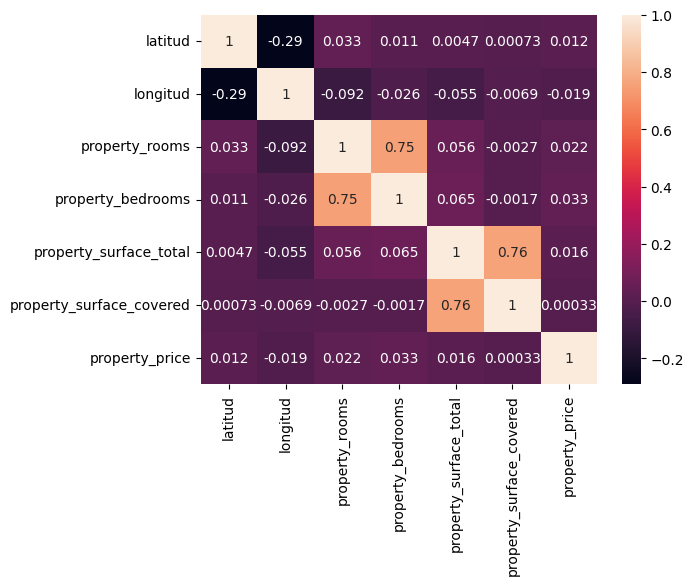

In [19]:
df_num = df.select_dtypes(include=['float64'])
df_num.drop(['place_l6'], axis="columns", inplace=True)
sns.heatmap(df_num.corr(),annot=True)

#**Separar train y test antes de hacer imputaciones.**

In [20]:
columnas_modelo = df.columns.tolist()
columnas_modelo.remove('property_price')

df_sin_price = df[columnas_modelo].copy()
df_price = df['property_price'].copy()

df_train, df_test, price_train, price_test = train_test_split(df_sin_price, df_price, test_size=0.2, random_state=2)

#**Preprocesamiento del df del train y Imputacion de datos**

Vemos el porcentaje de valores nulos por columna.

In [21]:
print("Informacion del DF de entrenamiento")
display(df_train.info())

Informacion del DF de entrenamiento
<class 'pandas.core.frame.DataFrame'>
Index: 368123 entries, 342973 to 351400
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        368123 non-null  object 
 1   start_date                368123 non-null  object 
 2   end_date                  368123 non-null  object 
 3   created_on                368123 non-null  object 
 4   latitud                   335836 non-null  float64
 5   longitud                  335836 non-null  float64
 6   place_l2                  368123 non-null  object 
 7   place_l3                  350171 non-null  object 
 8   place_l4                  111376 non-null  object 
 9   place_l5                  1972 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 368123 non-null  object 
 12  property_type             368123 non-null  object 
 13  property

None

In [22]:
print("Porcentaje de valores NaN del DF de entrenamiento")
display(df_train.isna().sum() / df_train.shape[0] * 100)

Porcentaje de valores NaN del DF de entrenamiento


id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       8.770710
longitud                      8.770710
place_l2                      0.000000
place_l3                      4.876631
place_l4                     69.744895
place_l5                     99.464309
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms               19.880583
property_bedrooms            25.205434
property_surface_total       13.507713
property_surface_covered      7.044928
property_currency             4.048375
property_title                0.000000
dtype: float64

Graficos de los datos faltantes de cada columna

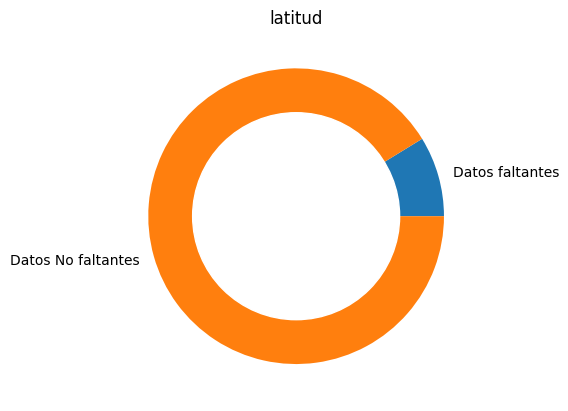

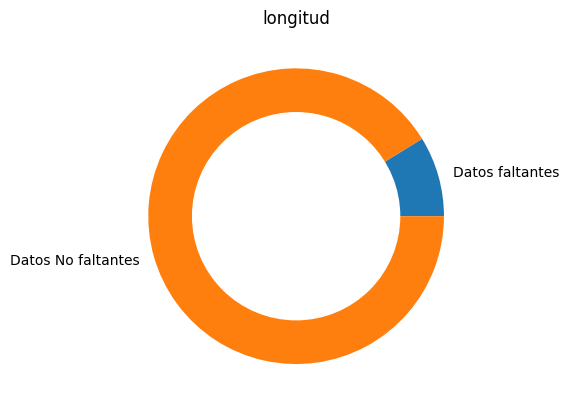

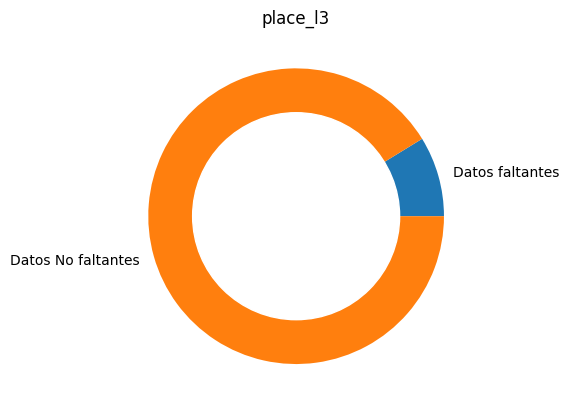

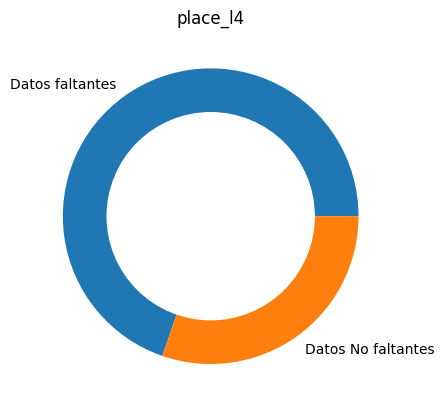

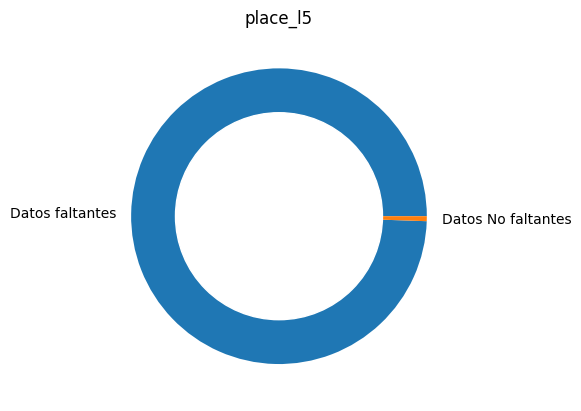

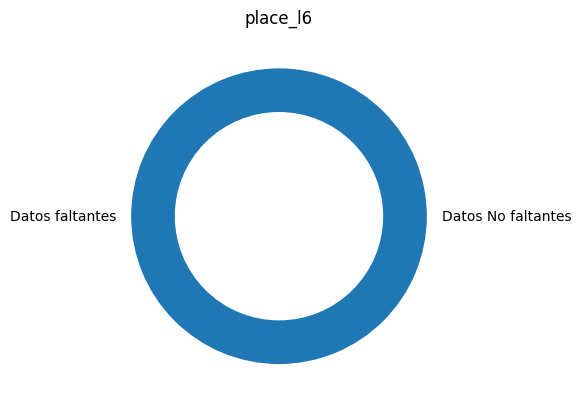

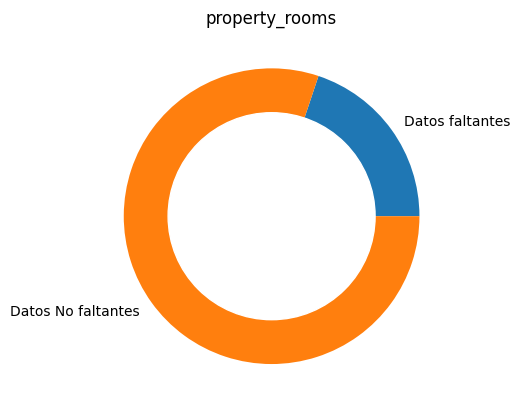

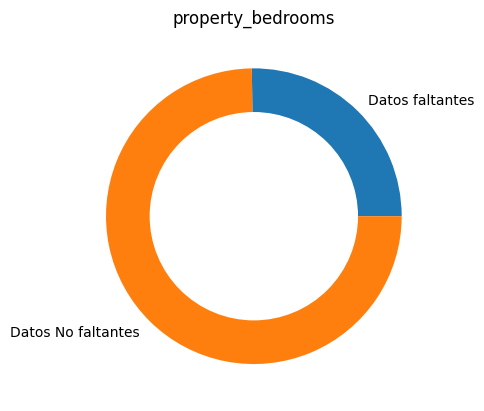

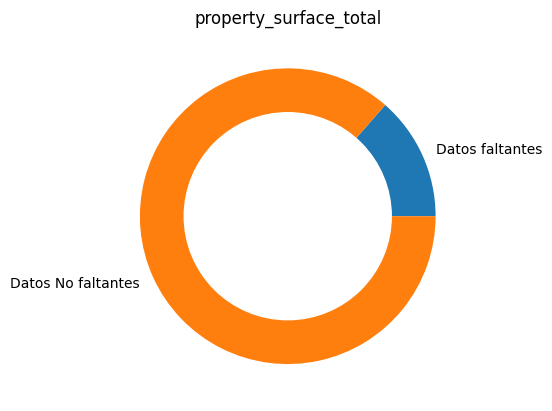

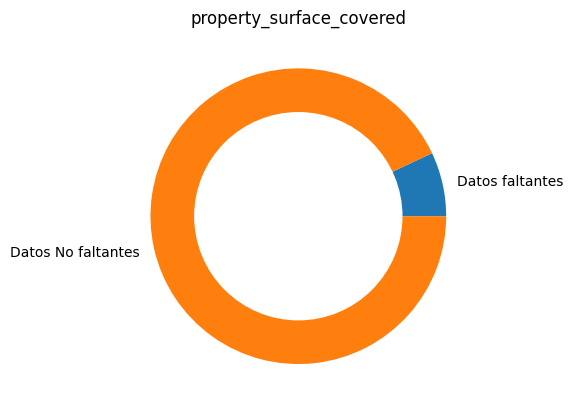

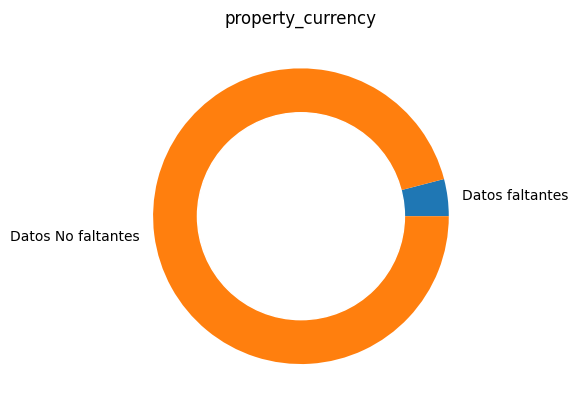

In [23]:
def graficar_datos_faltantes(porcentaje_datos_faltantes, columna):
    names = ['Datos faltantes', 'Datos No faltantes']
    otros = 100 - (porcentaje_datos_faltantes)
    size =  [porcentaje_datos_faltantes, otros]
    my_circle = plt.Circle( (0,0), 0.7, color='white')
    plt.pie(size, labels=names)
    plt.title(columna)
    p = plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()


graficar_datos_faltantes(8.766652, "latitud")
graficar_datos_faltantes(8.766652, "longitud")
graficar_datos_faltantes(8.766652, "place_l3")
graficar_datos_faltantes(69.692990, "place_l4")
graficar_datos_faltantes(99.461670, "place_l5")
graficar_datos_faltantes(100, "place_l6")
graficar_datos_faltantes(19.862344, "property_rooms")
graficar_datos_faltantes(25.215844, "property_bedrooms")
graficar_datos_faltantes(13.543015, "property_surface_total")
graficar_datos_faltantes(7.0122662, "property_surface_covered")
graficar_datos_faltantes(4.046171, "property_currency")


Observar datos faltantes a nivel de fila.

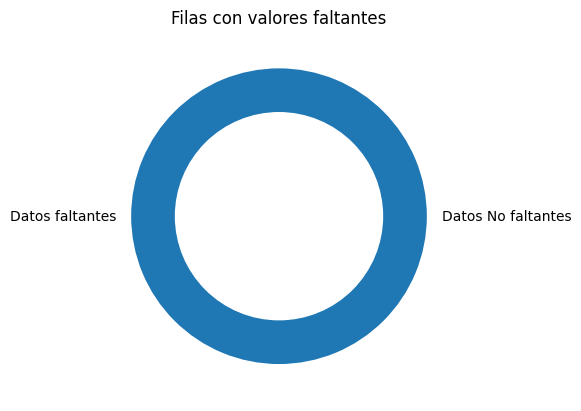

In [24]:
df_filas_con_nan = df_train[df_train.isna().sum(axis=1) >= 1]
porcentaje_datos_faltantes_fila = df_filas_con_nan.shape[0] / df_train.shape[0] * 100
graficar_datos_faltantes(porcentaje_datos_faltantes_fila, "Filas con valores faltantes")


Vemos que en los campos "place_l4", "place_l5" y "place_l6" tienen un porcentaje mayor de valores nulos, por ende no me aporta informacion asi que decidimos directamente eliminar dichos campos del dataset.

In [25]:
columnas_nans_eliminar = ['place_l4', 'place_l5', 'place_l6']
df_train.drop(columnas_nans_eliminar, axis="columns", inplace=True)
df_train.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_currency',
 'property_title']

Los NaN que se encuentran en las columnas que pertenecen a un tipo de dato numerico seran remplazados por su media para imputar dicho dato.

Pero antes de hacer dicha imputacion, vamos a guardar cada serie que se va a imputar para comprarar su distribucion antes y despues de la imputacion

In [26]:
#Guarar las series antes de la imputacion
latitud_antes = df_train['latitud']
longitud_antes = df_train['longitud']
property_rooms_antes = df_train['property_rooms']
property_bedrooms_antes = df_train['property_bedrooms']
property_surface_total_antes = df_train['property_surface_total']
property_surface_covered_antes = df_train['property_surface_covered']

In [27]:
#Calculo de media para cada serie
media_latitud = df_train['latitud'].mean()
media_longitud = df_train['longitud'].mean()
media_property_rooms = df_train['property_rooms'].mean()
media_property_bedrooms = df_train['property_bedrooms'].mean()
media_property_surface_total = df_train['property_surface_total'].mean()
media_property_surface_covered = df_train['property_surface_covered'].mean()

In [28]:
#imputacion de datos por la media
df_train['latitud'].fillna(media_latitud, inplace=True)
df_train['longitud'].fillna(media_longitud, inplace=True)
df_train['property_rooms'].fillna(media_property_rooms, inplace=True)
df_train['property_bedrooms'].fillna(media_property_bedrooms, inplace=True)
df_train['property_surface_total'].fillna(media_property_surface_total, inplace=True)
df_train['property_surface_covered'].fillna(media_property_surface_covered, inplace=True)
df_train.astype("str").eq("nan").sum()

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                         0
longitud                        0
place_l2                        0
place_l3                    17952
operation                       0
property_type                   0
property_rooms                  0
property_bedrooms               0
property_surface_total          0
property_surface_covered        0
property_currency           14903
property_title                  0
dtype: int64

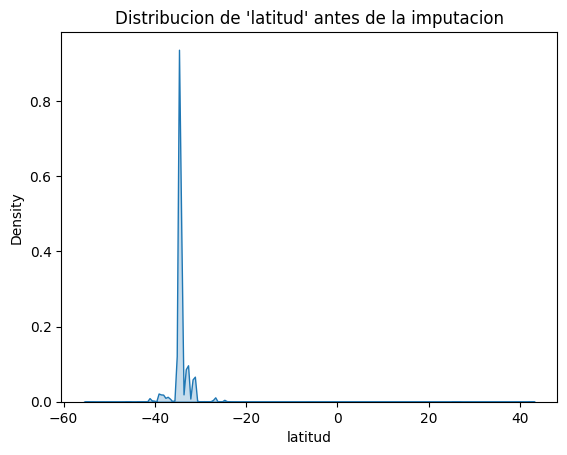

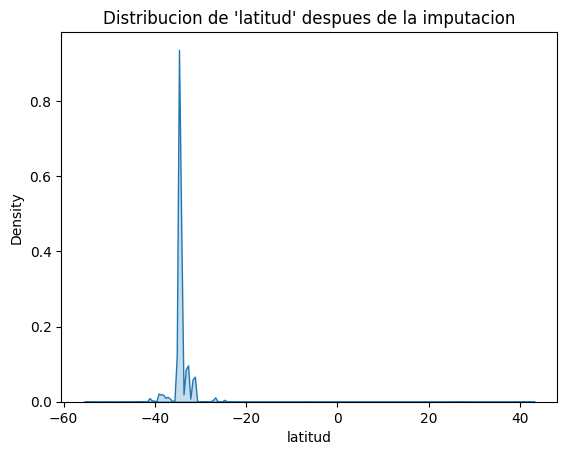

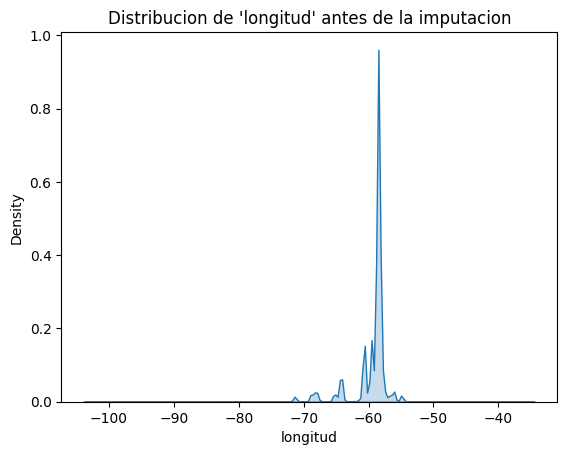

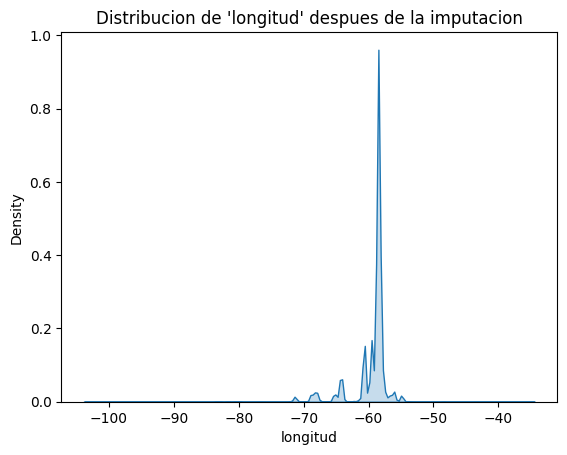

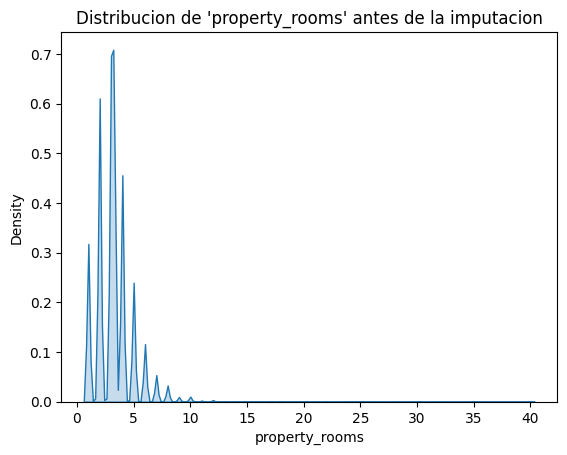

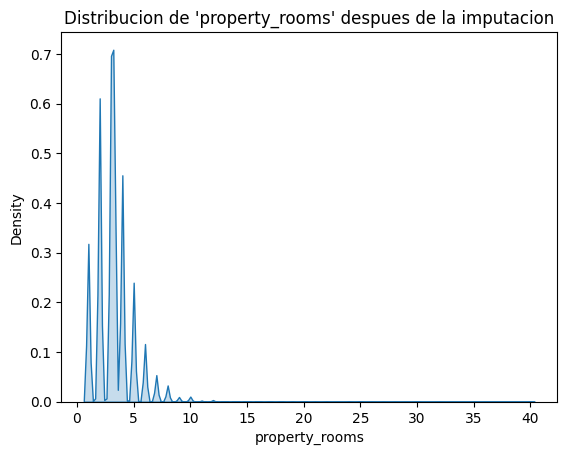

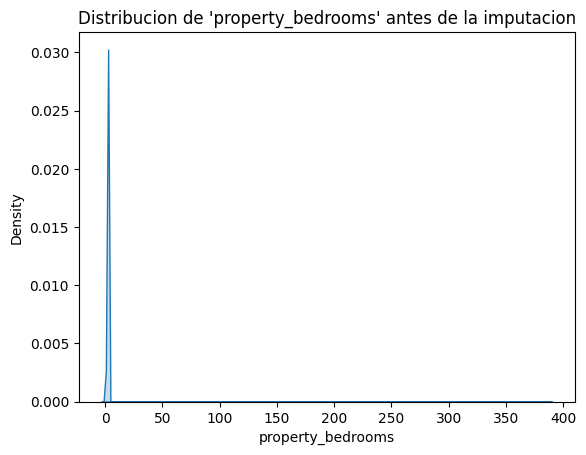

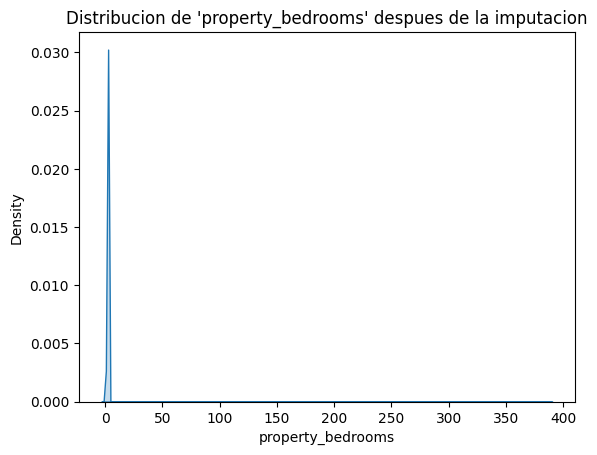

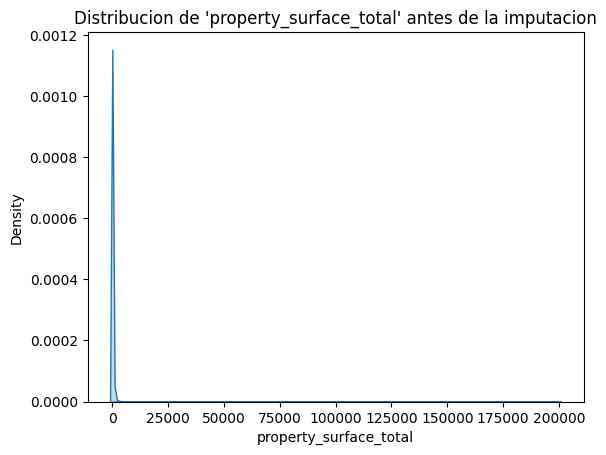

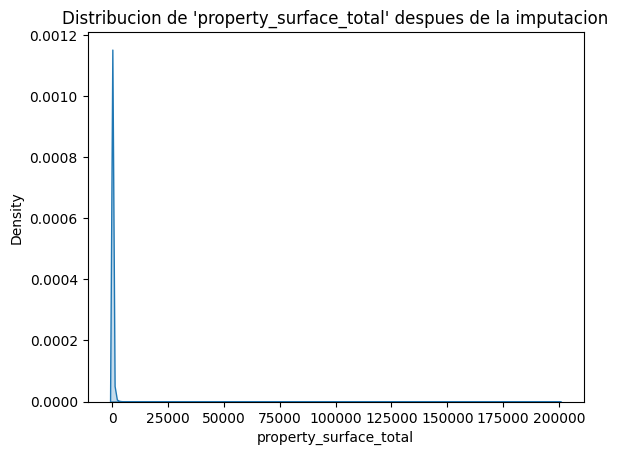

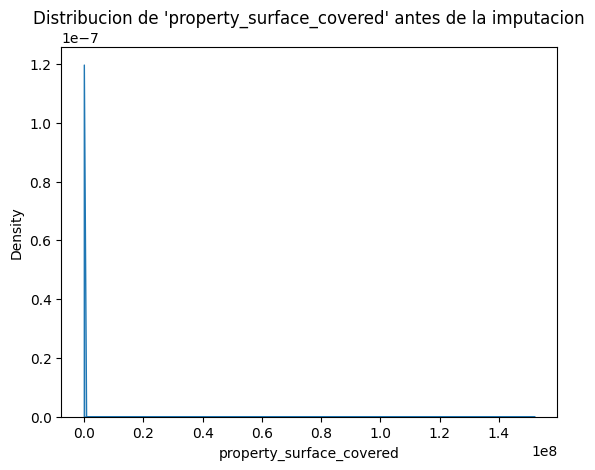

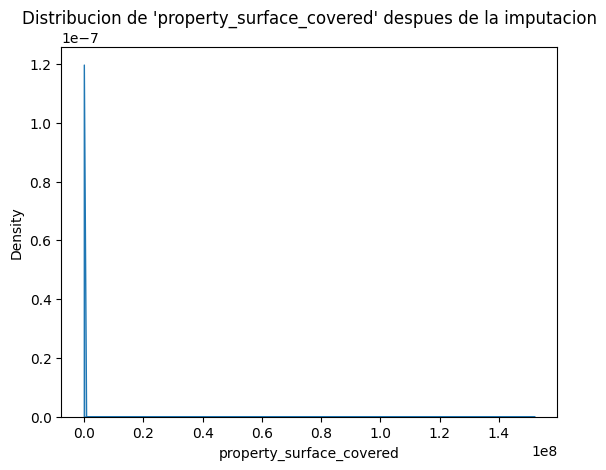

In [29]:
def graficar_distribucion_kdeplot(serie, titulo):
  sns.kdeplot(x=serie, fill=True)
  plt.title(titulo)
  plt.show()

graficar_distribucion_kdeplot(latitud_antes, "Distribucion de 'latitud' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['latitud'], "Distribucion de 'latitud' despues de la imputacion")
graficar_distribucion_kdeplot(longitud_antes, "Distribucion de 'longitud' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['longitud'], "Distribucion de 'longitud' despues de la imputacion")
graficar_distribucion_kdeplot(property_rooms_antes, "Distribucion de 'property_rooms' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['property_rooms'], "Distribucion de 'property_rooms' despues de la imputacion")
graficar_distribucion_kdeplot(property_bedrooms_antes, "Distribucion de 'property_bedrooms' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['property_bedrooms'], "Distribucion de 'property_bedrooms' despues de la imputacion")
graficar_distribucion_kdeplot(property_surface_total_antes, "Distribucion de 'property_surface_total' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['property_surface_total'], "Distribucion de 'property_surface_total' despues de la imputacion")
graficar_distribucion_kdeplot(property_surface_covered_antes, "Distribucion de 'property_surface_covered' antes de la imputacion")
graficar_distribucion_kdeplot(df_train['property_surface_covered'], "Distribucion de 'property_surface_covered' despues de la imputacion")

Se observa que los campos *'place_l3'* (que representa el barrio donde esta ubicado el inmueble del anuncio) y *'property_currency'* (que reprecenta el tipo de moneda en que esta el inmueble) son un tipo de dato no numerico.

Por ende para hacer una imputacion de datos en dichos campos se utilizara la informacion de las demas columnas para prdecir dicho valor NaN.

Para ello se utilizara la tecnica de regrecion logica.

Verificar que los datos esten bien tipeados y que halla una buena calidad de datos.

Ver si hay un dato nulo colocado como "-".

In [30]:
tienen_caracter_nulo_1 = df_train.astype("str").eq("-").any().to_frame("Caracter '-'") #devuelve una serie indicando si la columna tiene un valor "-"
tienen_caracter_nulo_1

Caracter '-'
id                               False
start_date                       False
end_date                         False
created_on                       False
latitud                          False
longitud                         False
place_l2                         False
place_l3                         False
operation                        False
property_type                    False
property_rooms                   False
property_bedrooms                False
property_surface_total           False
property_surface_covered         False
property_currency                False
property_title                    True

Ver si hay un dato nulo colocado como "".

In [31]:
tienen_caracter_nulo_2 = df_train.astype("str").eq("").any().to_frame("Caracter ''") #devuelve una serie indicando si la columna tiene un valor ""
tienen_caracter_nulo_2

Caracter ''
id                              False
start_date                      False
end_date                        False
created_on                      False
latitud                         False
longitud                        False
place_l2                        False
place_l3                        False
operation                       False
property_type                   False
property_rooms                  False
property_bedrooms               False
property_surface_total          False
property_surface_covered        False
property_currency               False
property_title                  False

Ver si hay un dato nulo colocado como "NULL".

In [32]:
tienen_caracter_nulo_3 = df_train.astype("str").eq("NULL").any().to_frame("Caracter 'NULL'") #devuelve una serie indicando si la columna tiene un valor "NULL"
tienen_caracter_nulo_3

Caracter 'NULL'
id                                  False
start_date                          False
end_date                            False
created_on                          False
latitud                             False
longitud                            False
place_l2                            False
place_l3                            False
operation                           False
property_type                       False
property_rooms                      False
property_bedrooms                   False
property_surface_total              False
property_surface_covered            False
property_currency                   False
property_title                      False

Ver si hay un dato nulo colocado como "_".

In [33]:
tienen_caracter_nulo_4 = df_train.astype("str").eq("_").any().to_frame("Caracter '_'") #devuelve una serie indicando si la columna tiene un valor "_"
tienen_caracter_nulo_4

Caracter '_'
id                               False
start_date                       False
end_date                         False
created_on                       False
latitud                          False
longitud                         False
place_l2                         False
place_l3                         False
operation                        False
property_type                    False
property_rooms                   False
property_bedrooms                False
property_surface_total           False
property_surface_covered         False
property_currency                False
property_title                   False

Ver si hay un dato nulo colocado como "?".

In [34]:
tienen_caracter_nulo_6 = df_train.astype("str").eq("?").any().to_frame("Caracter '?'") #devuelve una serie indicando si la columna tiene un valor "?"
tienen_caracter_nulo_6

Caracter '?'
id                               False
start_date                       False
end_date                         False
created_on                       False
latitud                          False
longitud                         False
place_l2                         False
place_l3                         False
operation                        False
property_type                    False
property_rooms                   False
property_bedrooms                False
property_surface_total           False
property_surface_covered         False
property_currency                False
property_title                   False

Eliminar filas duplicadas.

In [35]:
df_train = df_train.drop_duplicates()

Verificamos los valores numericos que tengan sentido. Para ello filtramos un df con todas las columnas con un tipo de dato numerico.

In [36]:
df_train_num = df_train.select_dtypes(include=['float64'])
df_train_num.dtypes

latitud                     float64
longitud                    float64
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
dtype: object

Sabemos que:

* **property_rooms** Representa la cantidad de ***ambientes del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0 y ademas el valor tiene que ser un entero.
* **property_bedrooms** Representa la cantidad de ***dormitorios del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0 y ademas el valor tiene que ser un entero.          
* **property_surface_total** Representa la ***superficie total del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0.     
* **property_surface_covered** Representa la ***superficie cubierta del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0.    
* **property_price** Representa la ***el precio del inmueble***, por ende no tiene sentido que tengo un valor menor o igual a 0.


Convertir las columnas que me indican el numero de habitaciones y de ambientes a un tipo de dato entero.

In [37]:
df_train['property_rooms'] = df_train['property_rooms'].astype(int)
df_train['property_bedrooms'] = df_train['property_bedrooms'].astype(int)


In [38]:
display((df_train[['property_rooms']] <= 0).any().to_frame("Ambientes del inmueble <= 0?"))
display((df_train[['property_bedrooms']] <= 0).any().to_frame("Dormitorios del inmueble <= 0?"))
display((df_train[['property_surface_total']] <= 0).any().to_frame("Superficie total del inmueble <= 0?"))
display((df_train[['property_surface_covered']] <= 0).any().to_frame("Superficie cubierta del inmueble <= 0?"))

Ambientes del inmueble <= 0?
property_rooms                         False

Dormitorios del inmueble <= 0?
property_bedrooms                            True

Superficie total del inmueble <= 0?
property_surface_total                                 True

Superficie cubierta del inmueble <= 0?
property_surface_covered                                    True

Vemos que hay anuncios que tienen dormitorios, superfucies totales y superficie cubierta menores o iguales a 0.

Son valores que no tienen sentido por ende hay que tomarlos como datos nulos (datos faltantes) y hay que completar dichos campos.

In [39]:
df_dormitorios_null = df_train[df_train['property_bedrooms'] <= 0]
print("Cantiad de anuncios con el valor de dormitorio sin sentido:")
display(df_dormitorios_null.shape[0])

df_surface_total_null = df_train[df_train['property_surface_total'] <= 0]
print("Cantiad de anuncios con el valor de la superficie total sin sentido:")
display(df_surface_total_null.shape[0])

df_surface_covered_null = df_train[df_train['property_surface_covered'] <= 0]
print("Cantiad de anuncios con el valor de la superficie de la cubierta sin sentido:")
display(df_surface_covered_null.shape[0])

Cantiad de anuncios con el valor de dormitorio sin sentido:


4

Cantiad de anuncios con el valor de la superficie total sin sentido:


2

Cantiad de anuncios con el valor de la superficie de la cubierta sin sentido:


2

A los anuncios con el valor de dormitorio sin sentido se les va a sustituir el valor con el numero de ambientes menos 1. Y a los de anuncios con el valor de la superficie total y cubierta sin sentido se les va a sustituir por la media

In [40]:
for x in range(df_dormitorios_null.shape[0]):
    index = df_dormitorios_null.index[x]
    df_train.loc[index, 'property_bedrooms'] = df_train.loc[index, 'property_rooms']-1
    print(df_train.loc[index, 'property_bedrooms'])

for x in range(df_surface_total_null.shape[0]):
    index = df_surface_total_null.index[x]
    df_train.loc[index, 'property_surface_total'] = df_train['property_surface_total'].mean()
    print(df_train.loc[index, 'property_surface_total'])

for x in range(df_surface_covered_null.shape[0]):
    index = df_surface_covered_null.index[x]
    df_train.loc[index, 'property_surface_covered'] = df_train['property_surface_covered'].mean()
    print(df_train.loc[index, 'property_surface_covered'])



2
1
2
0
420.5006469889886
420.5017919884779
3250.354418172414
3250.3632531390376


Devolver el tipo de dato que tenia inicialmete la cantia de habitaciones y ambientes del inmueble.

In [41]:
df_train['property_rooms'] = df_train['property_rooms'].astype(float)
df_train['property_bedrooms'] = df_train['property_bedrooms'].astype(float)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368123 entries, 342973 to 351400
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        368123 non-null  object 
 1   start_date                368123 non-null  object 
 2   end_date                  368123 non-null  object 
 3   created_on                368123 non-null  object 
 4   latitud                   368123 non-null  float64
 5   longitud                  368123 non-null  float64
 6   place_l2                  368123 non-null  object 
 7   place_l3                  350171 non-null  object 
 8   operation                 368123 non-null  object 
 9   property_type             368123 non-null  object 
 10  property_rooms            368123 non-null  float64
 11  property_bedrooms         368123 non-null  float64
 12  property_surface_total    368123 non-null  float64
 13  property_surface_covered  368123 non-null  f

Se Crea una dataframe donde se para solo los casos en los que no haya información en la columna de barrio se toma lo que dice en el título como válido y entonces si este menciona un barrio se asigna en dicha columna.

In [42]:
df_barrio_titulo=df_train[df_train["place_l3"].isna()]
barrios= df_train["place_l3"].astype(str).unique()
titles= df["property_title"].astype(str).unique()
for title in titles:
  for barrio in barrios:
        if barrio in title:
            change=df_barrio_titulo["property_title"]==title
            df_barrio_titulo.loc[change, 'place_l3'] =barrio

#**Filtracion**

**1er Filtacion**

Filtrar únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ).

In [43]:
df_train = df_train[ (df_train['property_type'] == 'Casa') | (df_train['property_type'] == 'PH') | (df_train['property_type'] == 'Departamento') ]

In [44]:
df_test = df_test[ (df_test['property_type'] == 'Casa') | (df_test['property_type'] == 'PH') | (df_test['property_type'] == 'Departamento') ]

**2da Filtracion**

De la primera filtracion agregar la filtracion de todos los anuncios de propiedades ubicados en Capital Federal.

In [45]:
df_train = df_train[ (df_train['place_l2'] == 'Capital Federal') ]

In [46]:
df_test = df_test[ (df_test['place_l2'] == 'Capital Federal') ]

**3ra Filtracion**

De la 2da filtracion agregar la filtracion cuyos anuncios tienen el tipo de operación sea venta y su precio se encuentre en dólares (USD).
Como

In [47]:
df_train = df_train[ (df_train['operation'] == 'Venta') & (df_train['property_currency'] == 'USD') ]

In [48]:
df_test = df_test[ (df_test['operation'] == 'Venta') & (df_test['property_currency'] == 'USD') ]

Filtracion del dataset con el barrio según los títulos

In [49]:
df_barrio_titulo = df_barrio_titulo[ (df_barrio_titulo['property_type'] == 'Casa') | (df_barrio_titulo['property_type'] == 'PH') | (df_barrio_titulo['property_type'] == 'Departamento') ]
df_barrio_titulo = df_barrio_titulo[ (df_barrio_titulo['place_l2'] == 'Capital Federal') ]
df_barrio_titulo = df_barrio_titulo[ (df_barrio_titulo['operation'] == 'Venta') & (df_barrio_titulo['property_currency'] == 'USD') ]

**Informacion del df filtrado**

In [50]:
display(df_train.info())
display(df_train.head(2))

<class 'pandas.core.frame.DataFrame'>
Index: 75354 entries, 11076 to 53922
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        75354 non-null  object 
 1   start_date                75354 non-null  object 
 2   end_date                  75354 non-null  object 
 3   created_on                75354 non-null  object 
 4   latitud                   75354 non-null  float64
 5   longitud                  75354 non-null  float64
 6   place_l2                  75354 non-null  object 
 7   place_l3                  75021 non-null  object 
 8   operation                 75354 non-null  object 
 9   property_type             75354 non-null  object 
 10  property_rooms            75354 non-null  float64
 11  property_bedrooms         75354 non-null  float64
 12  property_surface_total    75354 non-null  float64
 13  property_surface_covered  75354 non-null  float64
 14  propert

None

id  start_date    end_date  created_on  \
11076  7COREp5c1WOPb43JSyQJPw==  2021-01-13  2021-02-22  2021-01-13   
97969  ACTT60vk6vyLE+idpa2PrA==  2021-11-25  2022-01-27  2021-11-25   

         latitud   longitud         place_l2  place_l3 operation  \
11076 -34.228218 -59.554097  Capital Federal  Recoleta     Venta   
97969 -34.589855 -58.406316  Capital Federal  Recoleta     Venta   

      property_type  property_rooms  property_bedrooms  \
11076  Departamento             5.0                4.0   
97969  Departamento             5.0                3.0   

       property_surface_total  property_surface_covered property_currency  \
11076                   202.0                     182.0               USD   
97969                   127.0                     103.0               USD   

                                          property_title  
11076  VENTA 4 MBIENTES CON DEPENDENCIA RECOLETA TERR...  
97969  VENTA  Departamento Recoleta A. Prof 127 m2 ba...

#**Imputacion de los barrios**

Para la parte de imputación de los barrios primero se intentó hacer una regreción logística. Para esto se convierte los datos de los barrios a números. Para asegurarse de que es correcto utilizar este metodo primero se lo divide una porción de entrenamiento y una de testeo

In [61]:
####HACER REGRECION LOGICA#####
from sklearn.linear_model import LogisticRegression
df_trabajo=df_train.copy()

le = LabelEncoder()

df_trabajo["barrio_num"]=le.fit_transform(df_train["place_l3"])
col_entreno=['latitud',	'longitud', 'property_rooms',	'property_bedrooms']
col_a_predecir=['barrio_num']


df_no_nan = df_trabajo.dropna(subset=['place_l3'])  # anuncios con 'place_l3' no NaN
df_entreno = df_no_nan[col_entreno]
df_barrio_entreno = df_no_nan[col_a_predecir]
df_nan = df_trabajo[df_trabajo['place_l3'].isna()]  # anuncios con 'place_l3' NaN
df_a_predecir = df_nan[col_entreno]
x_train, x_test, y_train, y_test = train_test_split(df_entreno, df_barrio_entreno, test_size=0.2, random_state=df_no_nan['barrio_num'].mean().astype(int))

Con la base de testeo se calcula el porcentaje de aciertos. Aclaración como cuando se trabaja con 100 iteraciones no se alcanza el resultado con la precición deseada se incrementa dicha cantidad.

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
barrio_predicho = lr.predict(x_test)
display(barrio_predicho, y_test)
df_estadistico=pd.DataFrame(list(zip(y_test["barrio_num"], barrio_predicho)),columns=["barrio_num","Pred"])
df_estadistico["Correcto"]= df_estadistico["barrio_num"]==df_estadistico["Pred"]
df_estadistico[df_estadistico["Correcto"]==True].sum()/df_estadistico.shape[0] *100

Como este da menor al 20% se intenta resolverlo de otra forma.
Para esto se utiliza la base de datos donde se toman el valor de los barrios según el título de las publucacuones y se transmite la información encontrada a dicha columna.
Adicionalmente se aprobecha para hacer un mejor filtrado eliminando todas aquellas publicaciones que tenían C.A.B.A. en la columna 'place_l2' pero que lo que presentan en su título no coincide.

In [51]:
df_barrio_titulo=df_barrio_titulo.loc[~df_barrio_titulo["place_l3"].isin(df_train["place_l3"])]
df_train=df_train.drop(df_barrio_titulo.index)

In [52]:
df_train['latitud'].fillna(media_latitud, inplace=True)
df_train['longitud'].fillna(media_longitud, inplace=True)
df_train['property_rooms'].fillna(media_property_rooms, inplace=True)
df_train['property_bedrooms'].fillna(media_property_bedrooms, inplace=True)
df_train['property_surface_total'].fillna(media_property_surface_total, inplace=True)
df_train['property_surface_covered'].fillna(media_property_surface_covered, inplace=True)
df_train.astype("str").eq("nan").sum()

id                            0
start_date                    0
end_date                      0
created_on                    0
latitud                       0
longitud                      0
place_l2                      0
place_l3                    276
operation                     0
property_type                 0
property_rooms                0
property_bedrooms             0
property_surface_total        0
property_surface_covered      0
property_currency             0
property_title                0
dtype: int64

Todavía quedan 238 publicaciones sin barrio. En la sección de transformación de datos se convertirán estas en valores posibles.

#**Transformacion de datos**

Obtener un df que contenga todos las las columnas con un tipo de dato no numerico

In [53]:
df_no_num = df_train.select_dtypes(include=['object'])
print("Columnas")
display(df_no_num.columns)
print("\n Dataset:")
display(df_no_num.head())
print("\n Cantidad de valores unicos por columna:")
display(df_no_num.nunique())


Columnas


Index(['id', 'start_date', 'end_date', 'created_on', 'place_l2', 'place_l3',
       'operation', 'property_type', 'property_currency', 'property_title'],
      dtype='object')


 Dataset:


id  start_date    end_date  created_on  \
11076   7COREp5c1WOPb43JSyQJPw==  2021-01-13  2021-02-22  2021-01-13   
97969   ACTT60vk6vyLE+idpa2PrA==  2021-11-25  2022-01-27  2021-11-25   
453080  AywZNhMM1l5HdILZc52mPw==  2021-12-16  2022-02-09  2021-12-16   
277802  5HwimA+UYLh9I4VTWoZrVg==  2021-12-23  2022-01-27  2021-12-23   
97709   OAU1IwtDni2IFm3T8dlNbw==  2021-11-25  2022-01-27  2021-11-25   

               place_l2       place_l3 operation property_type  \
11076   Capital Federal       Recoleta     Venta  Departamento   
97969   Capital Federal       Recoleta     Venta  Departamento   
453080  Capital Federal      San Telmo     Venta  Departamento   
277802  Capital Federal  Villa Urquiza     Venta  Departamento   
97709   Capital Federal         Flores     Venta  Departamento   

       property_currency                                     property_title  
11076                USD  VENTA 4 MBIENTES CON DEPENDENCIA RECOLETA TERR...  
97969                USD  VENTA  Departamento Recoleta A. Prof 127 m2 ba...  
453080               USD   EXCELENTE DEPTO DIVISIBLE + AMENITIES + COCHERA   
277802               USD  Oportunidad Dptos de 1 y 2 ambientes Exclusivo...  
97709                USD                              Departamento - Flores


 Cantidad de valores unicos por columna:


id                   75297
start_date             365
end_date               603
created_on             365
place_l2                 1
place_l3                57
operation                1
property_type            3
property_currency        1
property_title       46459
dtype: int64

Donde nos va a interesar mas es tranformar la columna "*property_type*", que contiene la zona done esta ubicada el inmueble.

Para ello aplicaremos una tranformacion **One hot encoding**. Donde crearemos 2 columnas llamadas type_casa y type_dpto.

donde para cada fila (anuncio) se va a cumplir esta retriccion:

*`type_casa + type_dpto <= 1`*

Si en el campo type_casa del anuncio es igual a 1, eso quiere decir que el anuncio es una propiedad de tipo casa y lo mismo con el type_dpto. En tal caso de que type_casa y type_dpto sean 0 eso quiere decir que la propiedad del anuncio es un PH.

In [54]:
df_train['type_casa'] = df_train['property_type'].apply(lambda x: 1 if x == 'Casa' else 0)
df_train['type_dpto'] = df_train['property_type'].apply(lambda x: 1 if x == 'Departamento' else 0)
columna_property_type = ['property_type']
df_train.drop(columna_property_type, axis="columns", inplace=True)


In [55]:
df_test['type_casa'] = df_test['property_type'].apply(lambda x: 1 if x == 'Casa' else 0)
df_test['type_dpto'] = df_test['property_type'].apply(lambda x: 1 if x == 'Departamento' else 0)
df_test.drop(columna_property_type, axis="columns", inplace=True)


In [56]:
display(df_train.head(3))

id  start_date    end_date  created_on  \
11076   7COREp5c1WOPb43JSyQJPw==  2021-01-13  2021-02-22  2021-01-13   
97969   ACTT60vk6vyLE+idpa2PrA==  2021-11-25  2022-01-27  2021-11-25   
453080  AywZNhMM1l5HdILZc52mPw==  2021-12-16  2022-02-09  2021-12-16   

          latitud   longitud         place_l2   place_l3 operation  \
11076  -34.228218 -59.554097  Capital Federal   Recoleta     Venta   
97969  -34.589855 -58.406316  Capital Federal   Recoleta     Venta   
453080 -34.623850 -58.377764  Capital Federal  San Telmo     Venta   

        property_rooms  property_bedrooms  property_surface_total  \
11076              5.0                4.0                   202.0   
97969              5.0                3.0                   127.0   
453080             2.0                1.0                    44.0   

        property_surface_covered property_currency  \
11076                      182.0               USD   
97969                      103.0               USD   
453080                      42.0               USD   

                                           property_title  type_casa  \
11076   VENTA 4 MBIENTES CON DEPENDENCIA RECOLETA TERR...          0   
97969   VENTA  Departamento Recoleta A. Prof 127 m2 ba...          0   
453080   EXCELENTE DEPTO DIVISIBLE + AMENITIES + COCHERA           0   

        type_dpto  
11076           1  
97969           1  
453080          1

Ahora queremos transformar la columna ***`'place_13'`*** que contiene la zona en que esta cada inmueble. Para ello queremos saber el porcentaje de inmuebles que hay en cada zona

In [57]:
df_train['place_l3'].value_counts() / df_train['place_l3'].shape[0] * 100 #EL % de la cantidad de anuncios que hay en cada zona

place_l3
Palermo                 15.169263
Belgrano                 9.527604
Caballito                7.532837
Recoleta                 6.661620
Villa Urquiza            4.956373
Almagro                  4.294992
Nuñez                    3.816885
Villa Crespo             3.435728
Flores                   3.326826
Barrio Norte             3.116990
Balvanera                2.733177
Villa Devoto             2.099685
Colegiales               2.082420
Villa del Parque         1.961566
Saavedra                 1.952269
Puerto Madero            1.571112
San Telmo                1.443617
San Cristobal            1.402446
San Nicolás              1.394478
Retiro                   1.308153
Boedo                    1.296200
Barracas                 1.294872
Floresta                 1.252374
Monserrat                1.180658
Parque Chacabuco         1.146128
Coghlan                  1.057147
Villa Pueyrredón         1.046522
Villa Luro               0.772939
Mataderos                0.755674
Chaca

Observamos que la mayoria se encuentra en
* Palermo                 15.228256%
* Belgrano                 9.620894%
* Caballito                7.571463%
* Recoleta                 6.619126%
* Villa Urquiza            4.997867%
* Almagro                  4.283233%
* Nuñez                    3.757629%

Y el resto de los inmuebles se encuentran en otras zonas.
Por ende decidimos aplicar la transformacion **one hot encoing** al campo ***`'place_13'`***. Donde se crearan nuevas columnas, llamadas barrio_Palermo, barrio_Belgrano, barrio_Caballito, barrio_Villa_Urquiza
y barrio_Almagro. Ya que dichos barrios conforman mas del 50% de los barrios en que pertenecen los inmuebles. Donde se va a cumplir la sig restriccion para cada anuncio.

*barrio_Palermo + barrio_Belgrano + barrio_Caballito + barrio_Villa_Urquiza + barrio_Almagro <= 1*

Donde el anuncio va a tener un valor 1 si se encuentra en los barrios nombrados y si el anuncio no esta en dichos barrios, entonces tendran el valor 0 en cada columna.



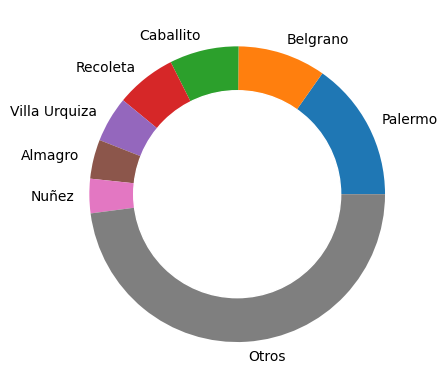

In [58]:
# create data
names = ['Palermo', 'Belgrano', 'Caballito', 'Recoleta', 'Villa Urquiza', 'Almagro', 'Nuñez','Otros']
otros = 100 - (15.228256+9.620894+7.571463+6.619126+4.997867+4.283233+3.757629)
size = [15.228256,9.620894,7.571463,6.619126,4.997867,4.283233, 3.757629, otros]

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

In [59]:
df_train.loc[df_train['place_l3'].isna()==True].shape[0]/df_train.shape[0] *100

0.3665484680664568

La distribución de estas 238 publicaciones restantes (el 0.36% del total) se la va a completar según el porcentaje de cada barrio hallado anteriormente para no modificar las medias. Concecuentemente al 15.23% de dichos 238 datos restantes se los conciderarán como si estubieran en Palermo, al 9.62% en Belgrano y así.

In [62]:
barrios=df_no_nan.value_counts('place_l3').keys().tolist()
barrios_count=df_no_nan.value_counts('place_l3') / df_no_nan['place_l3'].shape[0]
df_na=df_train.loc[df_train['place_l3'].isna()==True]
barrios_list =[]
amount= df_na.shape[0]
i=0
while len(barrios_list)<amount:
    for x in range (0,int(amount*barrios_count[i])+1):
        barrios_list.append(barrios[i])
    i+=1
barrios_list=barrios_list[0:amount]
random.shuffle(barrios_list)
df_train.loc[df_train['place_l3'].isna()==True,'place_l3'] = barrios_list

Ahora al analizar la cantidad de datos que tienen datos faltantes descubrimos que no hay ninguno en dicha cituación.

In [63]:
df_train['latitud'].fillna(media_latitud, inplace=True)
df_train['longitud'].fillna(media_longitud, inplace=True)
df_train['property_rooms'].fillna(media_property_rooms, inplace=True)
df_train['property_bedrooms'].fillna(media_property_bedrooms, inplace=True)
df_train['property_surface_total'].fillna(media_property_surface_total, inplace=True)
df_train['property_surface_covered'].fillna(media_property_surface_covered, inplace=True)
df_train.astype("str").eq("nan").sum()

id                          0
start_date                  0
end_date                    0
created_on                  0
latitud                     0
longitud                    0
place_l2                    0
place_l3                    0
operation                   0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_currency           0
property_title              0
type_casa                   0
type_dpto                   0
dtype: int64

In [64]:
df_new_train=df_train.copy()

In [65]:
df_train['barrio_Palermo'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Palermo' else 0)
df_train['barrio_Belgrano'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Belgrano' else 0)
df_train['barrio_Recoleta'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Recoleta' else 0)
df_train['barrio_Caballito'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Caballito' else 0)
df_train['barrio_Villa_Urquiza'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Villa Urquiza' else 0)
df_train['barrio_Almagro'] = df_train['place_l3'].apply(lambda x: 1 if x == 'Almagro' else 0)
columna_place_l3 = ['place_l3']
df_place_l3=df_train['place_l3']
df_train.drop(columna_place_l3, axis="columns", inplace=True)

In [66]:
df_test['barrio_Palermo'] = df_test['place_l3'].apply(lambda x: 1 if x == 'Palermo' else 0)
df_test['barrio_Belgrano'] = df_test['place_l3'].apply(lambda x: 1 if x == 'Belgrano' else 0)
df_test['barrio_Recoleta'] = df_test['place_l3'].apply(lambda x: 1 if x == 'Recoleta' else 0)
df_test['barrio_Caballito'] = df_test['place_l3'].apply(lambda x: 1 if x == 'Caballito' else 0)
df_test['barrio_Villa_Urquiza'] = df_test['place_l3'].apply(lambda x: 1 if x == 'Villa Urquiza' else 0)
df_test['barrio_Almagro'] = df_test['place_l3'].apply(lambda x: 1 if x == 'Almagro' else 0)
columna_place_l3 = ['place_l3']
df_place_l3=df_test['place_l3']
df_test.drop(columna_place_l3, axis="columns", inplace=True)

#**Datos relevantes para el problema**

In [67]:
df_train.sample(4)

id  start_date    end_date  created_on  \
207635  47MJLtVne0hQBHKKBRPd3A==  2021-02-15  2022-07-23  2021-02-15   
270303  egUIhisCtSYn0WLhb8bZEQ==  2021-07-13  2021-07-15  2021-07-13   
274520  sTzOGvSom5QB1PyCnmw+MQ==  2021-09-15  2022-03-09  2021-09-15   
154454  ZkNW6JyyxVORHlOryl9P2Q==  2021-02-03  2021-03-11  2021-02-03   

          latitud   longitud         place_l2 operation  property_rooms  \
207635 -34.603373 -58.512907  Capital Federal     Venta             4.0   
270303 -34.630864 -58.466791  Capital Federal     Venta             3.0   
274520 -34.578496 -58.431947  Capital Federal     Venta             1.0   
154454 -34.598424 -58.418361  Capital Federal     Venta             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
207635                3.0                   143.0                     122.0   
270303                2.0                    71.0                      64.0   
274520                2.0                    43.0                      31.0   
154454                1.0                    50.0                      26.0   

       property_currency                                     property_title  \
207635               USD                        Departamento - Villa Devoto   
270303               USD  VENTA DEPARTAMENTO FLORES 3 AMBIENTES NUEVO MO...   
274520               USD                   Departamento - Palermo Hollywood   
154454               USD                       Departamento 2 amb - Almagro   

        type_casa  type_dpto  barrio_Palermo  barrio_Belgrano  \
207635          0          1               0                0   
270303          0          1               0                0   
274520          0          1               1                0   
154454          0          1               0                0   

        barrio_Recoleta  barrio_Caballito  barrio_Villa_Urquiza  \
207635                0                 0                     0   
270303                0                 0                     0   
274520                0                 0                     0   
154454                0                 0                     0   

        barrio_Almagro  
207635               0  
270303               0  
274520               0  
154454               1

Observando nuestro dataset, notamos que hay algun informacion que es poco relevante para nuestro problema, como por ejemplo, las columnas 'property_currency' (ya se que todos los anuncios estan en dolares), 'operation' (ya se que todos los anuncios estan en venta), 'place_l2' (ya se que todos los anuncios estan en CABA), 'id', 'start_date',	'end_date', 'created_on' y 'property_title' (Ya que no me aportan una informacion relevante para la investigacion).

Decidimos removerlos de nuestro dataset.

In [68]:
columnas_irrelevantes_eliminar = ['property_currency', 'operation', 'property_title', 'place_l2',  'id', 'start_date', 'end_date', 'created_on' ]
df_train.drop(columnas_irrelevantes_eliminar, axis="columns", inplace=True)
df_train.columns

Index(['latitud', 'longitud', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'type_casa',
       'type_dpto', 'barrio_Palermo', 'barrio_Belgrano', 'barrio_Recoleta',
       'barrio_Caballito', 'barrio_Villa_Urquiza', 'barrio_Almagro'],
      dtype='object')

In [69]:
df_test.drop(columnas_irrelevantes_eliminar, axis="columns", inplace=True)
df_test.columns

Index(['latitud', 'longitud', 'place_l4', 'place_l5', 'place_l6',
       'property_rooms', 'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'type_casa', 'type_dpto', 'barrio_Palermo',
       'barrio_Belgrano', 'barrio_Recoleta', 'barrio_Caballito',
       'barrio_Villa_Urquiza', 'barrio_Almagro'],
      dtype='object')

In [70]:
df_train.head()

latitud   longitud  property_rooms  property_bedrooms  \
11076  -34.228218 -59.554097             5.0                4.0   
97969  -34.589855 -58.406316             5.0                3.0   
453080 -34.623850 -58.377764             2.0                1.0   
277802 -34.573932 -58.474268             1.0                1.0   
97709  -34.621109 -58.466048             2.0                1.0   

        property_surface_total  property_surface_covered  type_casa  \
11076                    202.0                     182.0          0   
97969                    127.0                     103.0          0   
453080                    44.0                      42.0          0   
277802                    34.0                      28.0          0   
97709                     41.0                      41.0          0   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
11076           1               0                0                1   
97969           1               0                0                1   
453080          1               0                0                0   
277802          1               0                0                0   
97709           1               0                0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  
11076                  0                     0               0  
97969                  0                     0               0  
453080                 0                     0               0  
277802                 0                     1               0  
97709                  0                     0               0

#**Distribuciones de las variables mas relevantes del problema y manejo de outliers**

Queremos ver que distribucion tiene algunas variables (la que concideramos mas relevante para el analisis). Por ende concidermos la variable de la cantiad de ambiente y habitaciones del inmueble y la suberficie total y de la cubierta del mismo.

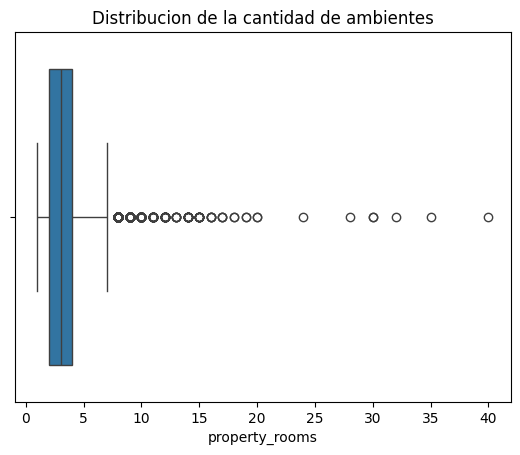

In [71]:
sns.boxplot(x=df_train["property_rooms"])
plt.title("Distribucion de la cantidad de ambientes")
plt.show()

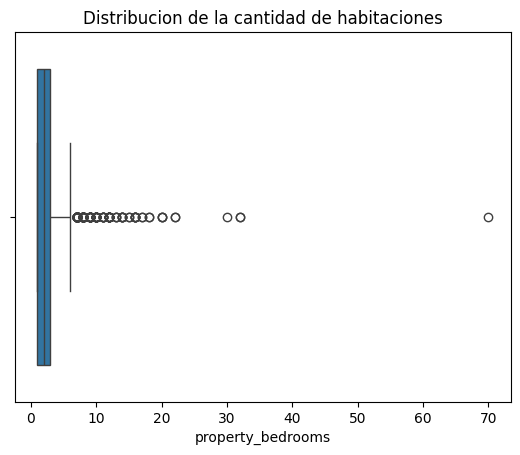

In [72]:
sns.boxplot(x=df_train["property_bedrooms"])
plt.title("Distribucion de la cantidad de habitaciones")
plt.show()

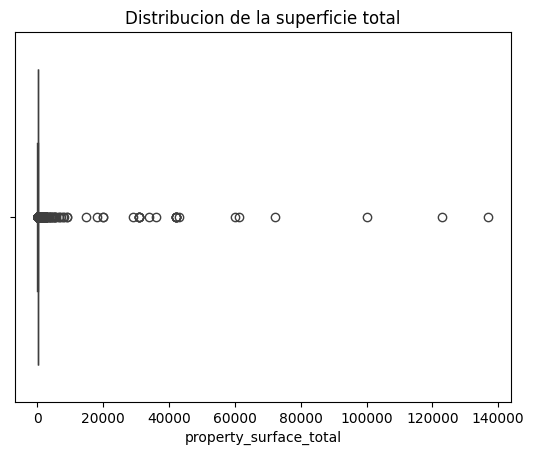

In [73]:
sns.boxplot(x=df_train["property_surface_total"])
plt.title("Distribucion de la superficie total")
plt.show()

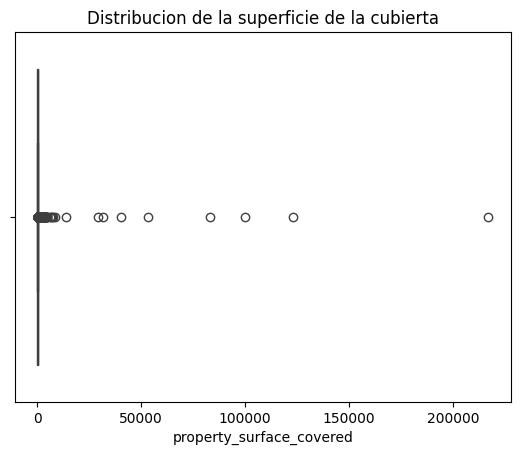

In [74]:
sns.boxplot(x=df_train["property_surface_covered"])
plt.title("Distribucion de la superficie de la cubierta")
plt.show()

Observamos que en cada variable hay varios valores atipicos univariados, y para ientificar dichos valores vamos a utilizar la tecnica de Z-score.

In [75]:
def z_calculation(serie):
  media = np.mean(serie)
  std = np.std(serie)
  return (serie - media) / std

El metodo de Z-score, al calcular el Z para cada observacion se considera un valor atipico cuando sel valor el Z de dicha observacion en mayor a 3 o menor a -3.

Calcular el Z para las variables de la cantidad de ambiete y habitaciones totales, y la superficie total y de la cubierta.

In [76]:
df_train['z_property_bedrooms'] = z_calculation(df_train.property_bedrooms)
df_train['z_property_rooms'] = z_calculation(df_train.property_rooms)
df_train['z_property_surface_total'] = z_calculation(df_train.property_surface_total)
df_train['z_property_surface_covered'] = z_calculation(df_train.property_surface_covered)

In [77]:
df_train[['z_property_bedrooms', 'z_property_rooms', 'z_property_surface_total', 'z_property_surface_covered']].head()

z_property_bedrooms  z_property_rooms  z_property_surface_total  \
11076              1.868743           1.53860                  0.073625   
97969              0.928484           1.53860                  0.000784   
453080            -0.952035          -0.58138                 -0.079826   
277802            -0.952035          -1.28804                 -0.089538   
97709             -0.952035          -0.58138                 -0.082740   

        z_property_surface_covered  
11076                    -0.017045  
97969                    -0.081731  
453080                   -0.131679  
277802                   -0.143142  
97709                    -0.132498

Encontrar dichas observaciones que se consideran outliers.

In [78]:
condicion_outlier = (df_train['z_property_bedrooms'] > 3) | (df_train['z_property_bedrooms'] < -3) | (df_train['z_property_rooms'] > 3) | (df_train['z_property_rooms'] < -3) | (df_train['z_property_surface_total'] > 3) | (df_train['z_property_surface_total'] < -3) | (df_train['z_property_surface_covered'] > 3) | (df_train['z_property_surface_covered'] < -3)
df_train_outliers = df_train[condicion_outlier]
print("Hay ", df_train_outliers.shape[0], " observaciones con outliers.")

print("\n\nValores atipicos de la superficie total")
display(df_train[(df_train['z_property_surface_total'] > 3) | (df_train['z_property_surface_total'] < -3)].head(5))

print("\n\nValores atipicos de la superficie de la cubierta")
display(df_train[(df_train['z_property_surface_covered'] > 3) | (df_train['z_property_surface_covered'] < -3)].head(5))


Hay  811  observaciones con outliers.


Valores atipicos de la superficie total


latitud   longitud  property_rooms  property_bedrooms  \
459841 -34.627876 -58.437996             3.0                2.0   
370918 -34.571747 -58.422612             4.0                3.0   
35538  -34.573375 -58.480012             2.0                1.0   
126869 -34.579163 -58.455725             1.0                2.0   
118019 -34.627828 -58.490255             1.0                1.0   

        property_surface_total  property_surface_covered  type_casa  \
459841                  7153.0                    7153.0          0   
370918                 42110.0                     307.0          0   
35538                   3500.0                      60.0          0   
126869                 31000.0                      26.0          0   
118019                  4100.0                      38.0          0   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
459841          1               0                0                0   
370918          1               1                0                0   
35538           1               0                0                0   
126869          1               0                0                0   
118019          1               0                0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
459841                 1                     0               0   
370918                 0                     0               0   
35538                  0                     1               0   
126869                 0                     0               0   
118019                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
459841            -0.011776           0.12528                  6.824510   
370918             0.928484           0.83194                 40.775119   
35538             -0.952035          -0.58138                  3.276678   
126869            -0.011776          -1.28804                 29.984969   
118019            -0.952035          -1.28804                  3.859404   

        z_property_surface_covered  
459841                    5.690926  
370918                    0.085307  
35538                    -0.116940  
126869                   -0.144780  
118019                   -0.134954



Valores atipicos de la superficie de la cubierta


latitud   longitud  property_rooms  property_bedrooms  \
459841 -34.627876 -58.437996             3.0                2.0   
1932   -34.637026 -58.426283             3.0                2.0   
30359  -34.228218 -59.554097             2.0                1.0   
313745 -34.649174 -58.413106             6.0                2.0   
72521  -34.600113 -58.403649             2.0                1.0   

        property_surface_total  property_surface_covered  type_casa  \
459841             7153.000000                    7153.0          0   
1932                420.500647                  217000.0          1   
30359                48.000000                    4435.0          0   
313745             8988.000000                    7454.0          0   
72521             33800.000000                   31670.0          0   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
459841          1               0                0                0   
1932            0               0                0                0   
30359           1               0                0                0   
313745          0               0                0                0   
72521           1               0                0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
459841                 1                     0               0   
1932                   0                     0               0   
30359                  0                     0               0   
313745                 0                     0               0   
72521                  0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
459841            -0.011776           0.12528                  6.824510   
1932              -0.011776           0.12528                  0.285835   
30359             -0.952035          -0.58138                 -0.075941   
313745            -0.011776           2.24526                  8.606682   
72521             -0.952035          -0.58138                 32.704359   

        z_property_surface_covered  
459841                    5.690926  
1932                    177.517125  
30359                     3.465382  
313745                    5.937389  
72521                    25.765851

Observemos las caracteristicas que tiene los outlier de los ambientes y habitaciones **(outliers multiples)**.



Valores atipicos de los ambientes


latitud   longitud  property_rooms  property_bedrooms  \
166105 -34.567092 -58.467051             9.0                6.0   
84087  -34.590923 -58.384214             9.0                5.0   

        property_surface_total  property_surface_covered  type_casa  \
166105              420.500647                     516.0          1   
84087               430.000000                     430.0          0   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
166105          0               0                1                0   
84087           1               0                0                1   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
166105                 0                     0               0   
84087                  0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
166105             3.749261          4.365241                  0.285835   
84087              2.809002          4.365241                  0.295061   

        z_property_surface_covered  
166105                    0.256440  
84087                     0.186022



Valores atipicos de las habitaciones


latitud   longitud  property_rooms  property_bedrooms  \
166105 -34.567092 -58.467051             9.0                6.0   
272619 -34.553019 -58.448407            11.0                6.0   

        property_surface_total  property_surface_covered  type_casa  \
166105              420.500647                     516.0          1   
272619              420.500647                     440.0          1   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
166105          0               0                1                0   
272619          0               0                1                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
166105                 0                     0               0   
272619                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
166105             3.749261          4.365241                  0.285835   
272619             3.749261          5.778561                  0.285835   

        z_property_surface_covered  
166105                     0.25644  
272619                     0.19421

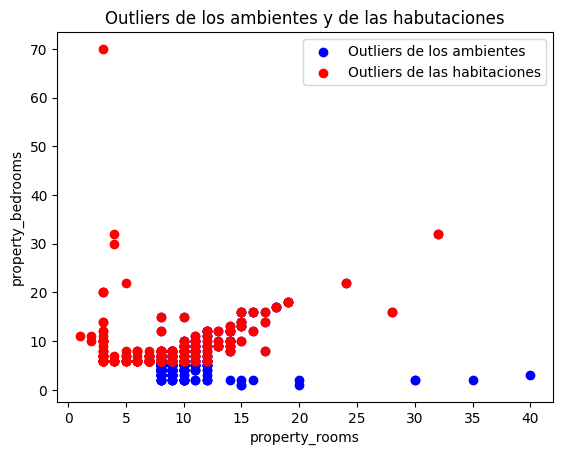

In [79]:
print("\n\nValores atipicos de los ambientes")
df_oulier_rooms = df_train[(df_train['z_property_rooms'] > 3) | (df_train['z_property_rooms'] < -3)]
display(df_oulier_rooms.head(2))

print("\n\nValores atipicos de las habitaciones")
df_oulier_bedrooms = df_train[(df_train['z_property_bedrooms'] > 3) | (df_train['z_property_bedrooms'] < -3)]
display(df_oulier_bedrooms.head(2))

df_outlier_rooms_bedrooms = df_train[(df_train['z_property_rooms'] > 3) | (df_train['z_property_rooms'] < -3) | (df_train['z_property_bedrooms'] > 3) | (df_train['z_property_bedrooms'] < -3)]

condicion_rooms = (df_outlier_rooms_bedrooms['z_property_rooms'] > 3) | (df_outlier_rooms_bedrooms['z_property_rooms'] < -3)
condicion_bedrooms = (df_outlier_rooms_bedrooms['z_property_bedrooms'] > 3) | (df_outlier_rooms_bedrooms['z_property_bedrooms'] < -3)

# Crea el gráfico de dispersión
plt.scatter(df_outlier_rooms_bedrooms[condicion_rooms]['property_rooms'], df_outlier_rooms_bedrooms[condicion_rooms]['property_bedrooms'], color='blue', label='Outliers de los ambientes')
plt.scatter(df_outlier_rooms_bedrooms[condicion_bedrooms]['property_rooms'], df_outlier_rooms_bedrooms[condicion_bedrooms]['property_bedrooms'], color='red', label='Outliers de las habitaciones')

# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_bedrooms')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()

# Muestra el gráfico
plt.show()

Observamos que hay siertos outliers entre los rooms y bedrooms que tienen alguna relacion y pueden tener algun sentio si lo comparamos con la superficie total del inmueble.

Con esta relacion podemos ver si entre dichas observaciones tienen valores coherentes.

pero hay algunos puntos que estan mas alejados del conjunto de puntos y dichos puntos no tienen mucho sentidos (por ejemplo tener mas de 50 habitaciones y tener menos e 5 ambientes)

In [80]:
# Calulo el vector de medias
vmedias = np.mean(df_outlier_rooms_bedrooms[["property_rooms", "property_bedrooms"]])

# Calculo la diferencia entre las observaciones y el vector de medias
x_dif = df_outlier_rooms_bedrooms[["property_rooms", "property_bedrooms"]] - vmedias

# Calculo matriz de covarianza y su inversa
cov = df_outlier_rooms_bedrooms[["property_rooms", "property_bedrooms"]].cov().values
inv_cov = np.linalg.inv(cov)

# Calculamos el cuadrado de la distancia de mahalanobis
mahal = np.dot(np.dot(x_dif, inv_cov), x_dif.T)

df_outlier_rooms_bedrooms["mahalanobis_rooms_bedrooms"] = mahal.diagonal()

<ipython-input-80-d049058e2027>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_rooms_bedrooms["mahalanobis_rooms_bedrooms"] = mahal.diagonal()


<Axes: ylabel='mahalanobis_rooms_bedrooms'>

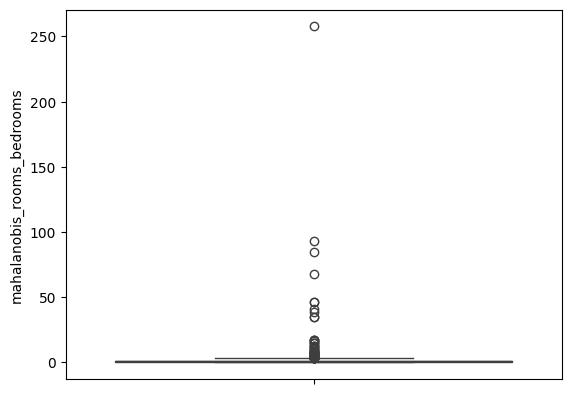

In [81]:
sns.boxplot(y=df_outlier_rooms_bedrooms.mahalanobis_rooms_bedrooms)

In [82]:
# Defino umbral
umbral = 7

# Observacione anómalas
condicion_outlier_rooms_bedrooms = df_outlier_rooms_bedrooms["mahalanobis_rooms_bedrooms"] > umbral
df_outlier_multivariados_rooms_bedrooms = df_outlier_rooms_bedrooms[condicion_outlier_rooms_bedrooms]
df_outlier_multivariados_rooms_bedrooms.head()

latitud   longitud  property_rooms  property_bedrooms  \
362696 -34.618485 -58.377993            16.0               16.0   
332857 -34.611905 -58.382384            18.0               17.0   
337149 -34.228218 -59.554097             3.0               20.0   
48279  -34.608645 -58.485619             4.0               32.0   
90686  -34.590064 -58.395623            17.0                8.0   

        property_surface_total  property_surface_covered  type_casa  \
362696              420.500647                     943.0          0   
332857              554.000000                     334.0          0   
337149              111.000000                      76.0          0   
48279                83.000000                      75.0          0   
90686               616.000000                     616.0          1   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
362696          1               0                0                0   
332857          1               0                0                0   
337149          1               0                0                0   
48279           1               0                0                0   
90686           0               0                0                1   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
362696                 0                     0               0   
332857                 0                     0               0   
337149                 0                     0               1   
48279                  0                     0               0   
90686                  0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
362696            13.151853          9.311862                  0.285835   
332857            14.092112         10.725182                  0.415491   
337149            16.912890          0.125280                 -0.014755   
48279             28.196000          0.831940                 -0.041949   
90686              5.629779         10.018522                  0.475706   

        z_property_surface_covered  mahalanobis_rooms_bedrooms  
362696                    0.606075                   10.319459  
332857                    0.107415                   14.472099  
337149                   -0.103839                   12.464407  
48279                    -0.104658                   40.952115  
90686                     0.338322                    7.783250

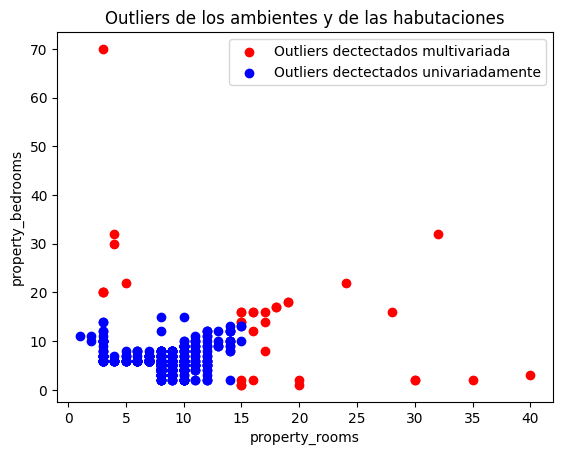

In [83]:
negada_condicion_outlier_rooms_bedrooms = ~(condicion_outlier_rooms_bedrooms)
# Crea el gráfico de dispersión
plt.scatter(df_outlier_multivariados_rooms_bedrooms['property_rooms'], df_outlier_multivariados_rooms_bedrooms['property_bedrooms'], color='red', label='Outliers dectectados multivariada')
plt.scatter(df_outlier_rooms_bedrooms[negada_condicion_outlier_rooms_bedrooms]['property_rooms'], df_outlier_rooms_bedrooms[negada_condicion_outlier_rooms_bedrooms]['property_bedrooms'], color='blue', label='Outliers dectectados univariadamente')

# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_bedrooms')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()



# Muestra el gráfico
plt.show()

Vemos que hay algunas observaciones (marcadas como ouliers) que pueden tener sentido tomarlas encuenta para el analisis del problema.

Hay observaciones con una cantidad importante de ambientes y habitaciones, la idea seria estudiar las observaciones con dichas caracteristicas y analizarlas para tomarlos en cuenta a la hora del analisis del problema.

Tomaremos como un numero importante de habitaciones como **10**.

Aquellas observaciones (de los ouliers multivariados) que tienen una cantidad de ambientes y habitaciones menores a 10 seran eliminadas del dataset, ya que no tiene sentido analizar una observacion con 70 habitaciones y 5 ambientes.

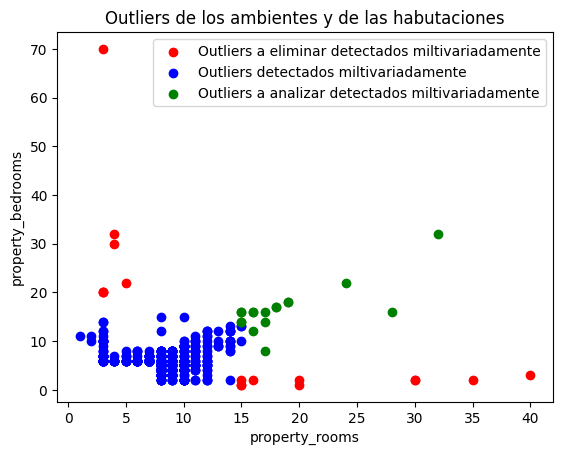

In [84]:
#Observaciones atipicas que no tienen sentios analizarlas
df_outlier_rooms_bedrooms_eliminar = df_outlier_rooms_bedrooms[(condicion_outlier_rooms_bedrooms) & ((df_outlier_rooms_bedrooms['property_bedrooms'] < 8) | (df_outlier_rooms_bedrooms['property_rooms'] < 8))]
#Observaciones atipicas que si tienen sentios analizarlas
df_outlier_rooms_bedrooms_analizar = df_outlier_rooms_bedrooms[(condicion_outlier_rooms_bedrooms) & ((df_outlier_rooms_bedrooms['property_bedrooms'] >= 8) & (df_outlier_rooms_bedrooms['property_rooms'] >= 8))]

plt.scatter(df_outlier_rooms_bedrooms_eliminar['property_rooms'], df_outlier_rooms_bedrooms_eliminar['property_bedrooms'], color='red', label='Outliers a eliminar detectados miltivariadamente')
plt.scatter(df_outlier_rooms_bedrooms[negada_condicion_outlier_rooms_bedrooms]['property_rooms'], df_outlier_rooms_bedrooms[negada_condicion_outlier_rooms_bedrooms]['property_bedrooms'], color='blue', label='Outliers detectados miltivariadamente')
plt.scatter(df_outlier_rooms_bedrooms_analizar['property_rooms'], df_outlier_rooms_bedrooms_analizar['property_bedrooms'], color='green', label='Outliers a analizar detectados miltivariadamente')

# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_bedrooms')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()


In [85]:
#Eliminar las observaciones atipicas que no tienen sentios analizarlas
for x in range(df_outlier_rooms_bedrooms_eliminar.shape[0]):
  index = df_outlier_rooms_bedrooms_eliminar.index[x]
  df_train.drop(index, inplace=True)

Analizaremos las observaciones atipicas. Si el inmueble tiene una superficie total importante para contener las habitaciones, tiene sentido incluir dichas observaciones en el analisis del problema.

Consideramos una superficie total importante del inmueble como **250 metros cuaddrados.**

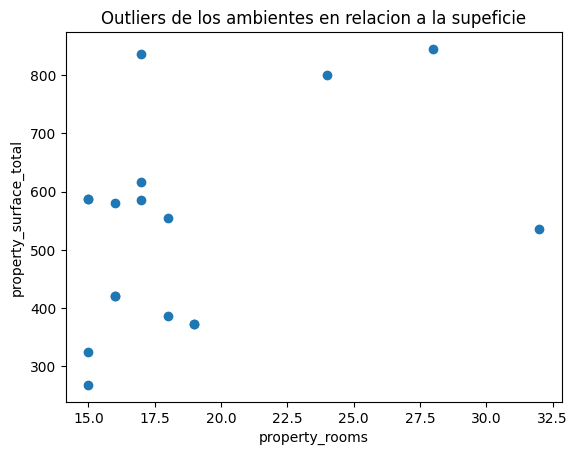

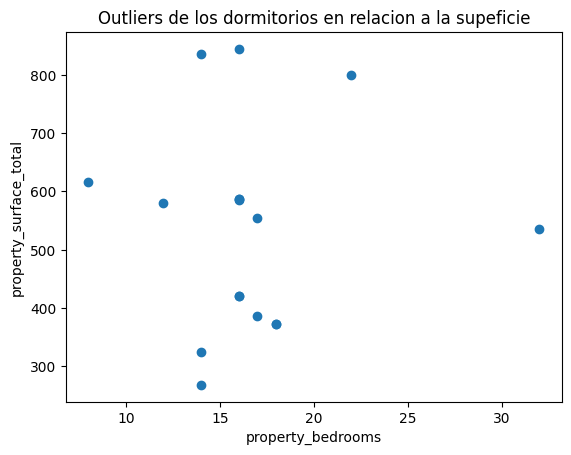

In [86]:
df_outlier_rooms_bedrooms_analizar_sup = df_outlier_rooms_bedrooms_analizar[df_outlier_rooms_bedrooms_analizar['property_surface_total'] >= 250]

plt.scatter(df_outlier_rooms_bedrooms_analizar_sup['property_rooms'], df_outlier_rooms_bedrooms_analizar_sup['property_surface_total'])
# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_surface_total')
plt.title('Outliers de los ambientes en relacion a la supeficie')
plt.show()

plt.scatter(df_outlier_rooms_bedrooms_analizar_sup['property_bedrooms'], df_outlier_rooms_bedrooms_analizar_sup['property_surface_total'])
# Personaliza el gráfico
plt.xlabel('property_bedrooms')
plt.ylabel('property_surface_total')
plt.title('Outliers de los dormitorios en relacion a la supeficie')
plt.show()


Vemos que cada uno de los inmuebles que posee una cantidad importante de ambientes y dormitorios contienen una importante superficie que las contiene. Por ende vamos a tomar en cuentas estas observaciones a la hora de hacer el analisis del problema.

Observamos que hay algunos valores de outliers de rooms que tienen sentido si se relacionan con los bedrooms. Por ende las observaciones con outliers alejados seran eliminados

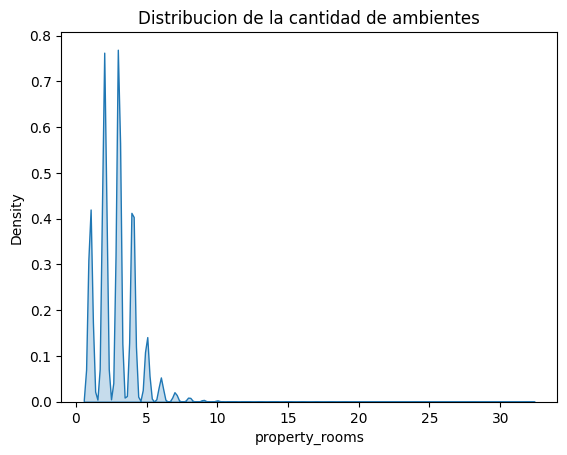

In [87]:
sns.kdeplot(x=df_train["property_rooms"], fill=True)
plt.title("Distribucion de la cantidad de ambientes")
plt.show()

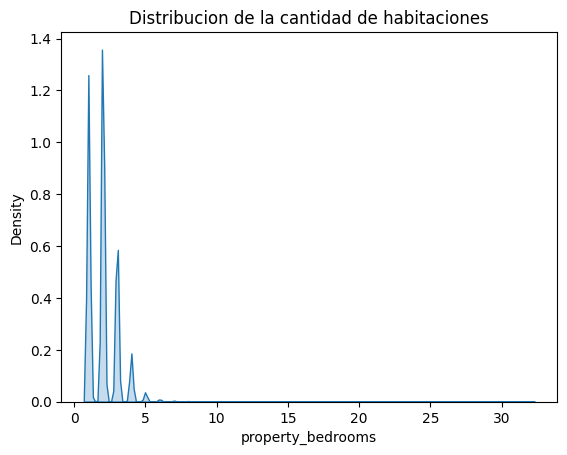

In [88]:
sns.kdeplot(x=df_train["property_bedrooms"], fill=True)
plt.title("Distribucion de la cantidad de habitaciones")
plt.show()

Ahora vamos hacer la misma relacion con las variables de los ambientes y habitaciones que hicimos para encontrar outliers (multiples) pero ahora con las variables de la superficie.



Valores atipicos de sup total.


latitud   longitud  property_rooms  property_bedrooms  \
459841 -34.627876 -58.437996             3.0                2.0   
370918 -34.571747 -58.422612             4.0                3.0   

        property_surface_total  property_surface_covered  type_casa  \
459841                  7153.0                    7153.0          0   
370918                 42110.0                     307.0          0   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
459841          1               0                0                0   
370918          1               1                0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
459841                 1                     0               0   
370918                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
459841            -0.011776           0.12528                  6.824510   
370918             0.928484           0.83194                 40.775119   

        z_property_surface_covered  
459841                    5.690926  
370918                    0.085307



Valores atipicos de la sup cubierta


latitud   longitud  property_rooms  property_bedrooms  \
459841 -34.627876 -58.437996             3.0                2.0   
1932   -34.637026 -58.426283             3.0                2.0   

        property_surface_total  property_surface_covered  type_casa  \
459841             7153.000000                    7153.0          0   
1932                420.500647                  217000.0          1   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
459841          1               0                0                0   
1932            0               0                0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
459841                 1                     0               0   
1932                   0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
459841            -0.011776           0.12528                  6.824510   
1932              -0.011776           0.12528                  0.285835   

        z_property_surface_covered  
459841                    5.690926  
1932                    177.517125

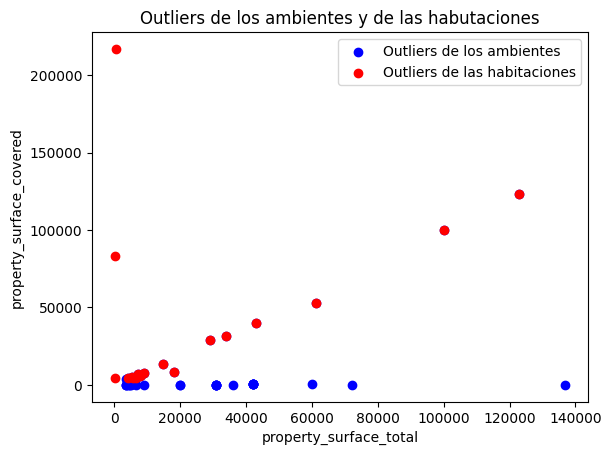

In [89]:
print("\n\nValores atipicos de sup total.")
df_oulier_sup_total = df_train[(df_train['z_property_surface_total'] > 3) | (df_train['z_property_surface_total'] < -3)]
display(df_oulier_sup_total.head(2))

print("\n\nValores atipicos de la sup cubierta")
df_oulier_sup_cub = df_train[(df_train['z_property_surface_covered'] > 3) | (df_train['z_property_surface_covered'] < -3)]
display(df_oulier_sup_cub.head(2))

#Combinar el df de los ouliers de los rooms con el df de los outliers de los bedrooms en un solo df
df_outlier_sup_total_cub = df_train[(df_train['z_property_surface_total'] > 3) | (df_train['z_property_surface_total'] < -3) | (df_train['z_property_surface_covered'] > 3) | (df_train['z_property_surface_covered'] < -3)]
#df_outlier_sup_total_cub = pd.concat([df_oulier_sup_total, df_oulier_sup_cub], ignore_index=False)
#df_outlier_sup_total_cub = df_outlier_sup_total_cub.drop_duplicates()


condicion_sup_total = (df_outlier_sup_total_cub['z_property_surface_total'] > 3) | (df_outlier_sup_total_cub['z_property_surface_total'] < -3)
condicion_sup_cub = (df_outlier_sup_total_cub['z_property_surface_covered'] > 3) | (df_outlier_sup_total_cub['z_property_surface_covered'] < -3)

# Crea el gráfico de dispersión
plt.scatter(df_outlier_sup_total_cub[condicion_sup_total]['property_surface_total'], df_outlier_sup_total_cub[condicion_sup_total]['property_surface_covered'], color='blue', label='Outliers de los ambientes')
plt.scatter(df_outlier_sup_total_cub[condicion_sup_cub]['property_surface_total'], df_outlier_sup_total_cub[condicion_sup_cub]['property_surface_covered'], color='red', label='Outliers de las habitaciones')

# Personaliza el gráfico
plt.xlabel('property_surface_total')
plt.ylabel('property_surface_covered')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()

# Muestra el gráfico
plt.show()

Observamos que hay siertos outliers entre las superficies totales y cubiertas que tienen alguna relacion y pueden tener algun sentido estos valores.

Con esta relacion podemos ver si entre dichas observaciones tienen valores coherentes.

In [90]:
# Calulo el vector de medias
vmedias = np.mean(df_outlier_sup_total_cub[["property_surface_total",	"property_surface_covered"]])

# Calculo la diferencia entre las observaciones y el vector de medias
x_dif = df_outlier_sup_total_cub[["property_surface_total",	"property_surface_covered"]] - vmedias

# Calculo matriz de covarianza y su inversa
cov = df_outlier_sup_total_cub[["property_surface_total",	"property_surface_covered"]].cov().values
inv_cov = np.linalg.inv(cov)

# Calculamos el cuadrado de la distancia de mahalanobis
mahal = np.dot(np.dot(x_dif, inv_cov), x_dif.T)

df_outlier_sup_total_cub["mahalanobis_sup_total_cub"] = mahal.diagonal()

<ipython-input-90-445d71ef4100>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outlier_sup_total_cub["mahalanobis_sup_total_cub"] = mahal.diagonal()


<Axes: ylabel='mahalanobis_sup_total_cub'>

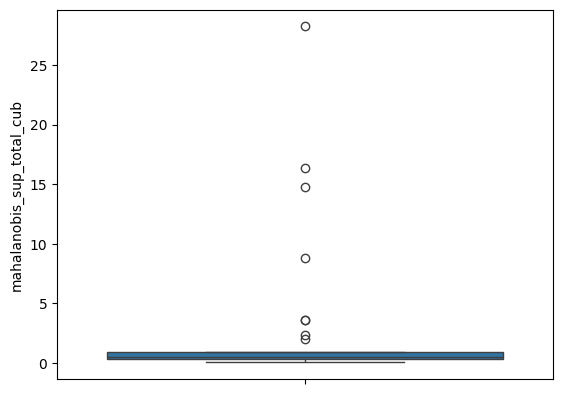

In [91]:
sns.boxplot(y=df_outlier_sup_total_cub.mahalanobis_sup_total_cub)

In [92]:
# Defino umbral
umbral = 0.3
# Observacione anómalas
condicion_outlier_sup_total_cub = df_outlier_sup_total_cub["mahalanobis_sup_total_cub"] > umbral
df_outlier_sup_total_cub[condicion_outlier_sup_total_cub].head()
df_outlier_sup_total_cub[condicion_outlier_sup_total_cub].shape[0]

39

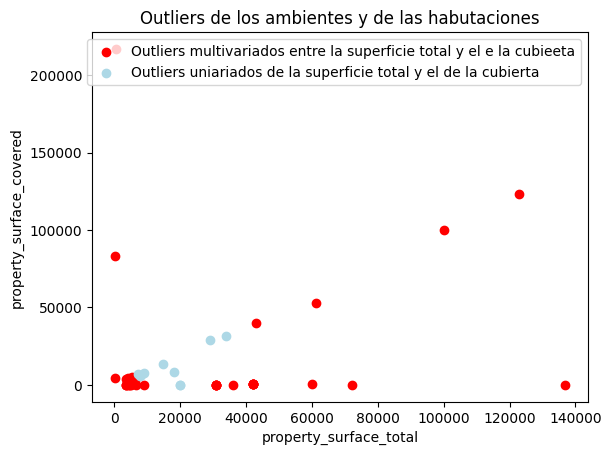

In [93]:
negada_condicion_outlier_sup_total_cub = ~(condicion_outlier_sup_total_cub)
# Crea el gráfico de dispersión
plt.scatter(df_outlier_sup_total_cub[condicion_outlier_sup_total_cub]['property_surface_total'], df_outlier_sup_total_cub[condicion_outlier_sup_total_cub]['property_surface_covered'], color='red', label='Outliers multivariados entre la superficie total y el e la cubieeta')
plt.scatter(df_outlier_sup_total_cub[negada_condicion_outlier_sup_total_cub]['property_surface_total'], df_outlier_sup_total_cub[negada_condicion_outlier_sup_total_cub]['property_surface_covered'], color='lightblue', label='Outliers uniariados de la superficie total y el de la cubierta')

# Personaliza el gráfico
plt.xlabel('property_surface_total')
plt.ylabel('property_surface_covered')
plt.title('Outliers de los ambientes y de las habutaciones')
plt.legend()



# Muestra el gráfico
plt.show()

Observamos que hay algunos valores de outliers de las superficies totales que tienen sentido si se relacionan con las superficies ede la cubierta. Por ende las observaciones con outliers alejados seran eliminados

In [94]:
for x in range(df_outlier_sup_total_cub.shape[0]):
  index = df_outlier_sup_total_cub.index[x]
  df_train.drop(index, inplace=True)

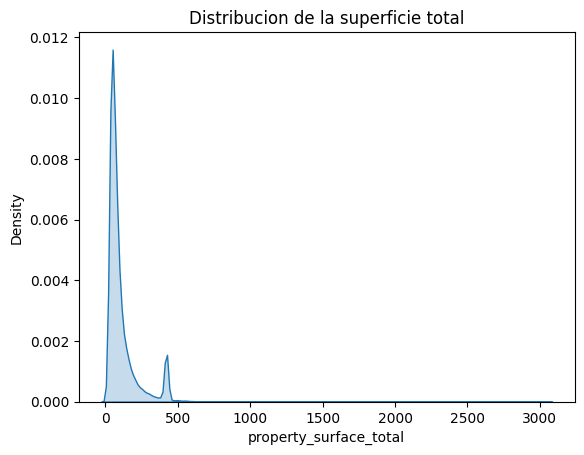

In [95]:
sns.kdeplot(x=df_train["property_surface_total"], fill=True)
#sns.boxplot(x=df_train["property_surface_total"])
plt.title("Distribucion de la superficie total")
plt.show()

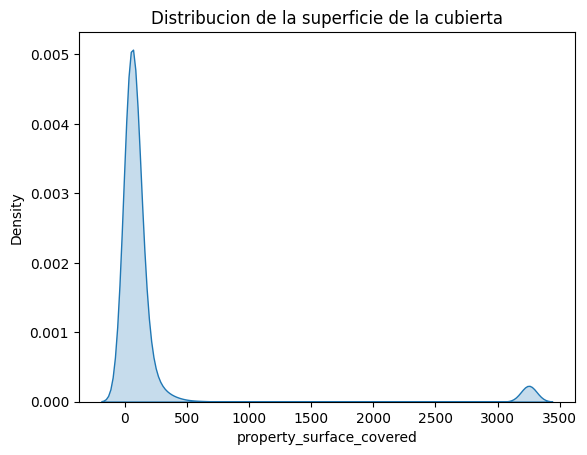

In [96]:
sns.kdeplot(x=df_train["property_surface_covered"], fill=True)
#sns.boxplot(x=df_train["property_surface_covered"])
plt.title("Distribucion de la superficie de la cubierta")
plt.show()

Llama la atencion los inmuebles que tenga una superficie de cubierta mayor de 500 metros cuatrados  y una superficie total mayor o igual a 700 metros cuadrados. Por ende trataremos de analizar dichas observaciones.

In [97]:
condicion_sup_total_cub = (df_train['property_surface_covered'] >= 500) | (df_train['property_surface_total'] >= 700)
df_train_sup_total_cub = df_train[condicion_sup_total_cub]
print("Hay ", df_train_sup_total_cub.shape[0], " inmuebles con una superficies de cubierta mayor o igual a 500 y superficie total mayor igual a 700")

Hay  2994  inmuebles con una superficies de cubierta mayor o igual a 500 y superficie total mayor igual a 700



Ver el percentaje que representa dentro de mi dataset


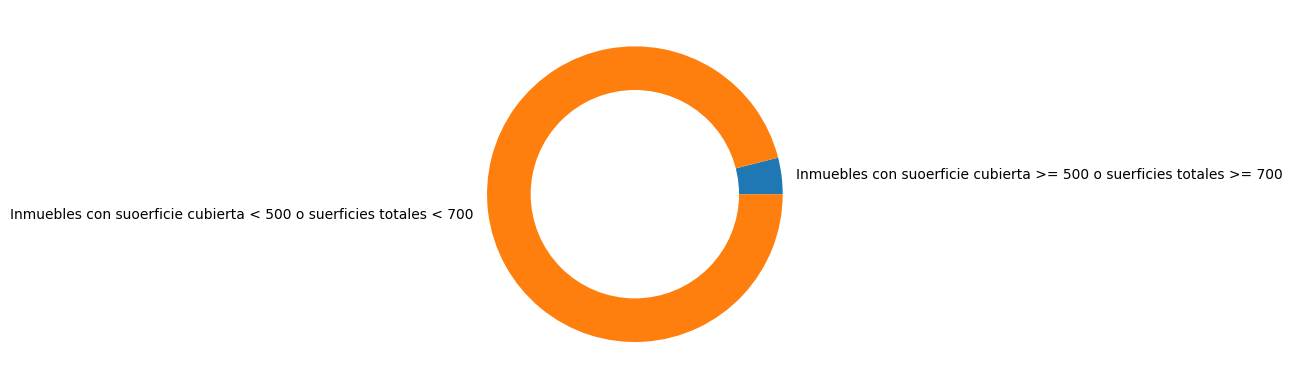

Las superficies cubiertas con  >= a 500 y suerficies totales >= a 700 representan el  3.9797423934282405 % de mi dataset


In [98]:
names = ['Inmuebles con suoerficie cubierta >= 500 o suerficies totales >= 700', 'Inmuebles con suoerficie cubierta < 500 o suerficies totales < 700']
porcentaje =  (df_train_sup_total_cub.shape[0] / df_train.shape[0]) * 100
otros = 100 - (porcentaje)
size = [porcentaje, otros]
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
print("Las superficies cubiertas con  >= a 500 y suerficies totales >= a 700 representan el ", porcentaje,"% de mi dataset")

Analicemos dichas observaciones.

latitud   longitud  property_rooms  property_bedrooms  \
406667 -34.609676 -58.434308             3.0                2.0   
311670 -34.556249 -58.459082             3.0                2.0   

        property_surface_total  property_surface_covered  type_casa  \
406667                    60.0               3250.354418          0   
311670                    59.0               3250.354418          0   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
406667          1               0                0                0   
311670          1               0                0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
406667                 1                     0               0   
311670                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
406667            -0.011776           0.12528                 -0.064287   
311670            -0.011776           0.12528                 -0.065258   

        z_property_surface_covered  
406667                    2.495375  
311670                    2.495375

Text(0.5, 1.0, 'Ambientes y dormitorios de los inmuebles de la superficie cubierta >= 500 y suerficies totales >= a 700')

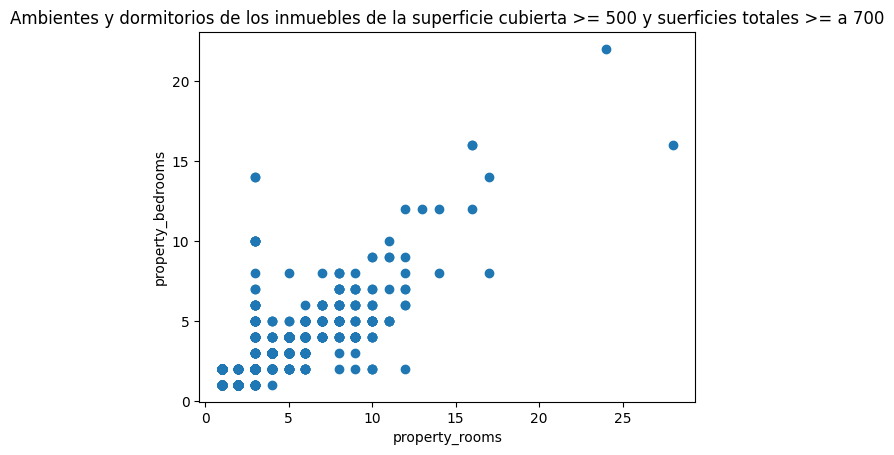

In [99]:
display(df_train_sup_total_cub.head(2))
plt.scatter(df_train_sup_total_cub['property_rooms'], df_train_sup_total_cub['property_bedrooms'])

# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_bedrooms')
plt.title('Ambientes y dormitorios de los inmuebles de la superficie cubierta >= 500 y suerficies totales >= a 700')


Podemos observar que si el inmueble tiene la superficie cubierta >= 500 o suerficies totales >= a 700 pero tiene una cantidad de habitaciones o de ambientes chicas no tiene nada de sentido. Por ende deseamos eliminarlo de nuestro dataset ya que no nos aportaria para el analisis a realizar.

Consideramos una cantidad importante de habitaciones a partir de **8**.

In [100]:
condicion_outlier_sup_rooms = ((df_train['property_surface_covered'] >= 500) | (df_train['property_surface_total'] >= 700)) & (df_train['property_rooms'] < 8) & (df_train['property_bedrooms'] < 8)

df_train.drop(df_train[condicion_outlier_sup_rooms].index, inplace=True)

En cambio si el inmueble resenta una caracteristica con una cantidad de inmuebles con con la superficie cubierta >= 500 o suerficies totales >= a 700 y tiene una cantidad de habitaciones y dormitorios importantes puede tener sentido ya que se puede identificar como aquellos inmuebles de lujo y poco comunes. Por ejemplo, un departamento dúplex o triplex con múltiples habitaciones, áreas de entretenimiento, terrazas y espacios adicionales.

Analicemos las superficies de aquellas observaciones que tienen ambintes o habitaciones mayor o igual a 8 y cumplen con la restriccion de tener la superficie cubierta >= 500 o suerficies totales >= a 700.

latitud   longitud  property_rooms  property_bedrooms  \
166105 -34.567092 -58.467051             9.0                6.0   
362696 -34.618485 -58.377993            16.0               16.0   

        property_surface_total  property_surface_covered  type_casa  \
166105              420.500647                     516.0          1   
362696              420.500647                     943.0          0   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
166105          0               0                1                0   
362696          1               0                0                0   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
166105                 0                     0               0   
362696                 0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
166105             3.749261          4.365241                  0.285835   
362696            13.151853          9.311862                  0.285835   

        z_property_surface_covered  
166105                    0.256440  
362696                    0.606075

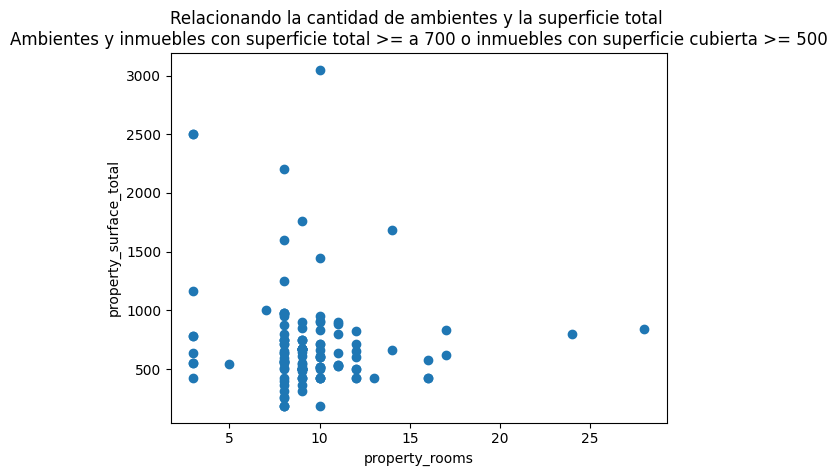

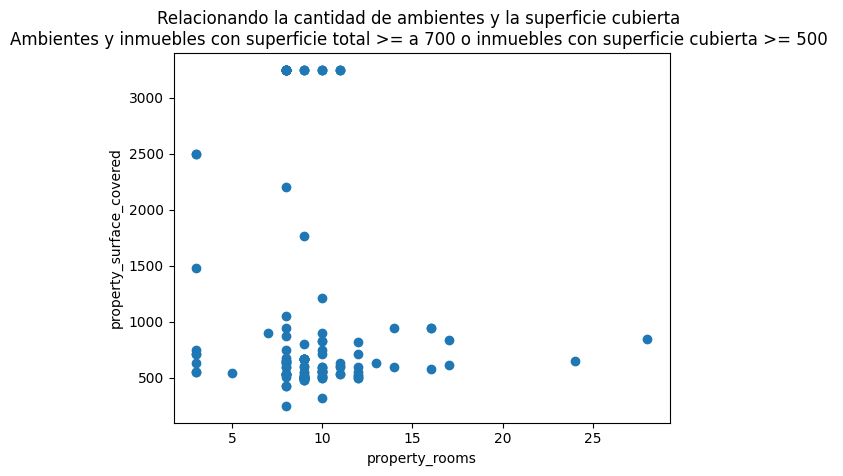

In [101]:
df_train_sup_total_cub = df_train_sup_total_cub[(df_train_sup_total_cub['property_rooms'] >= 8) | (df_train_sup_total_cub['property_bedrooms'] >= 8)]
display(df_train_sup_total_cub.head(2))

plt.scatter(df_train_sup_total_cub['property_rooms'], df_train_sup_total_cub['property_surface_total'])
# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_surface_total')
plt.title('Relacionando la cantidad de ambientes y la superficie total \nAmbientes y inmuebles con superficie total >= a 700 o inmuebles con superficie cubierta >= 500')
plt.show()

plt.scatter(df_train_sup_total_cub['property_rooms'], df_train_sup_total_cub['property_surface_covered'])
# Personaliza el gráfico
plt.xlabel('property_rooms')
plt.ylabel('property_surface_covered')
plt.title('Relacionando la cantidad de ambientes y la superficie cubierta \nAmbientes y inmuebles con superficie total >= a 700 o inmuebles con superficie cubierta >= 500 ')
plt.show()


Vemos que hay valores de superficie (tanto como totales como de la cubierta) que superan al 1000 y y es un dato que esta mal en el dataset por ende vamos a reemplazarlo por la media de aquellos inmuebles poco comunes "de lujo".

In [102]:
#Superficie cubierta
df_aux_sup_total_cub = df_train_sup_total_cub[(df_train_sup_total_cub['property_surface_covered'] > 1000) | (df_train_sup_total_cub['property_surface_total'] > 1000)]
#Borro aquellos valores que superan los 1000 del df
for x in range(df_aux_sup_total_cub.shape[0]):
  index_1 = df_aux_sup_total_cub.index[x]
  df_train_sup_total_cub.drop(index_1,  inplace=True)

#Luego de borrar, imputo aquellas filas con la superficie mayor a 1000 por su media (elimino antes para que no me altere el valor de la media)
for x in range(df_aux_sup_total_cub.shape[0]):
  index_2 = df_aux_sup_total_cub.index[x]
  if (df_train.loc[index_2, 'property_surface_covered'] > 1000) and (df_train.loc[index_2, 'property_surface_total'] <= 1000):
    df_train.loc[index_2, 'property_surface_covered'] = df_train_sup_total_cub['property_surface_covered'].mean()
  elif (df_train.loc[index_2, 'property_surface_covered'] <= 1000) and (df_train.loc[index_2, 'property_surface_total'] > 1000):
    df_train.loc[index_2, 'property_surface_total'] = df_train_sup_total_cub['property_surface_total'].mean()
  elif (df_train.loc[index_2, 'property_surface_covered'] > 1000) and (df_train.loc[index_2, 'property_surface_total'] > 1000):
    df_train.loc[index_2, 'property_surface_covered'] = df_train_sup_total_cub['property_surface_covered'].mean()
    df_train.loc[index_2, 'property_surface_total'] = df_train_sup_total_cub['property_surface_total'].mean()


Comparamos y vemos la distribucion de las variables de la superficie total y de la cubierta, ambientes y habitaciones.

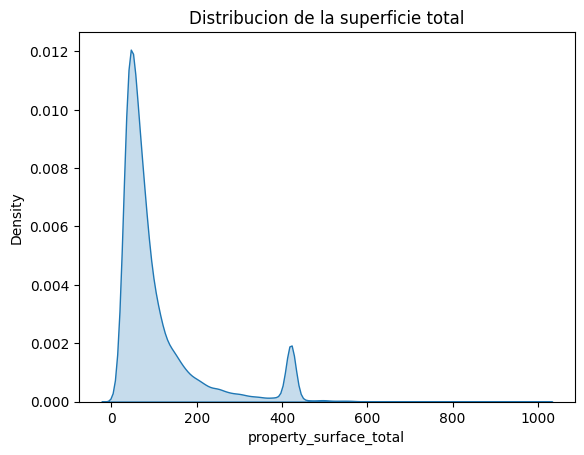

In [103]:
sns.kdeplot(x=df_train["property_surface_total"], fill=True)
plt.title("Distribucion de la superficie total")
plt.show()

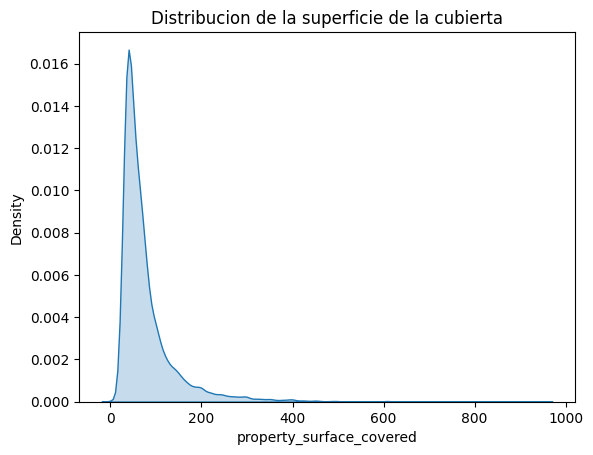

In [104]:
sns.kdeplot(x=df_train["property_surface_covered"], fill=True)
plt.title("Distribucion de la superficie de la cubierta")
plt.show()

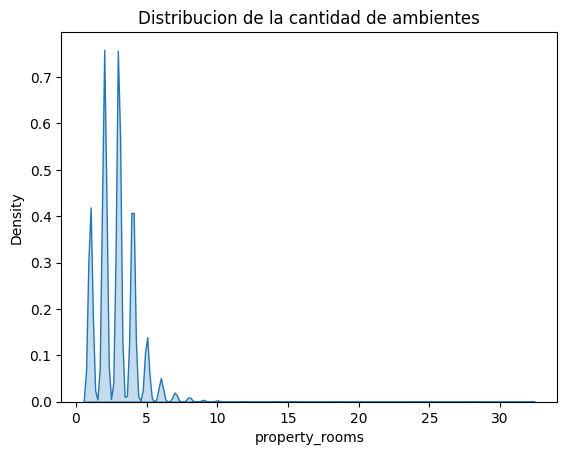

In [105]:
sns.kdeplot(x=df_train["property_rooms"], fill=True)
plt.title("Distribucion de la cantidad de ambientes")
plt.show()

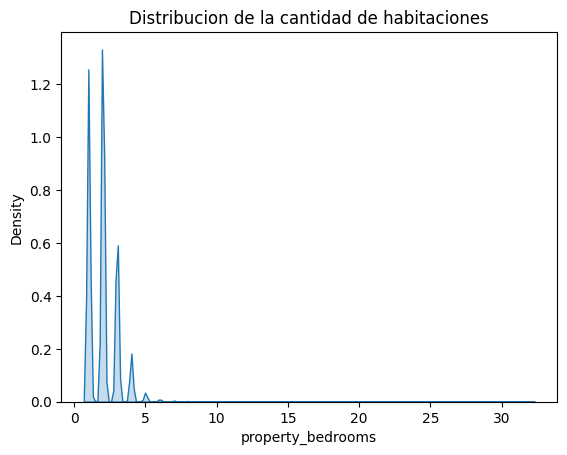

In [106]:
sns.kdeplot(x=df_train["property_bedrooms"], fill=True)
plt.title("Distribucion de la cantidad de habitaciones")
plt.show()

Eliminar Observaciones del data frame de entrenamiento de precios

In [107]:
index_train= df_train.index
price_train=price_train.loc[index_train]

Analizar los precios de venta con las superficie total del dataset

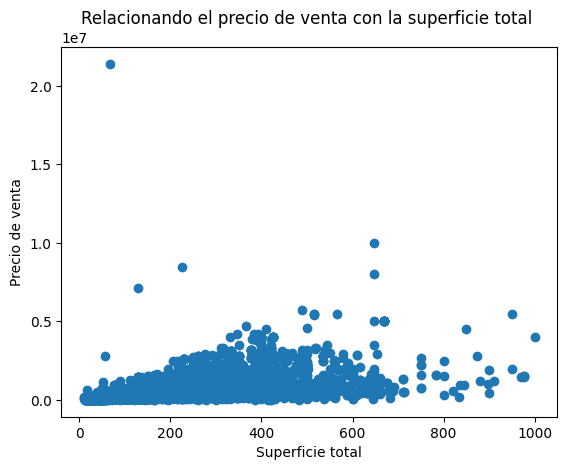

In [108]:
plt.scatter(df_train['property_surface_total'], price_train)
# Personaliza el gráfico
plt.xlabel('Superficie total')
plt.ylabel('Precio de venta')
plt.title('Relacionando el precio de venta con la superficie total ')
plt.show()

In [109]:
price_train.max()

21400000.0

vemos que la mayoria de anuncios se ubican por abajo de 5 millones de dolares, pero hay algunos anuncios atipicos que tienen su precio de ventas mayor a 5 millones de dolares. Observemos y analisemos dichos anuncios.

In [110]:
serie_precio_elevado = price_train > 5000000
serie_precio_elevado

11076     False
97969     False
453080    False
277802    False
97709     False
          ...  
449859    False
203156    False
445146    False
332847    False
35541     False
Name: property_price, Length: 72364, dtype: bool

In [111]:
df_precios_elevados = df_train[serie_precio_elevado]
df_precios_elevados.head(df_precios_elevados.shape[0])

latitud   longitud  property_rooms  property_bedrooms  \
306829 -34.616918 -58.359927             3.0                2.0   
241401 -34.553355 -58.438662             6.0                4.0   
332190 -34.593634 -58.377164             3.0                8.0   
148534 -34.565947 -58.442326             9.0                5.0   
413786 -34.228218 -59.554097             8.0                6.0   
156777 -34.608300 -58.371200             3.0                2.0   
210907 -34.577966 -58.401880            10.0                5.0   
60073  -34.616044 -58.458621             3.0                2.0   
241326 -34.552484 -58.439573             6.0                4.0   
243285 -34.228218 -59.554097             8.0                4.0   
45223  -34.586413 -58.388982            10.0                4.0   

        property_surface_total  property_surface_covered  type_casa  \
306829              128.000000                  118.0000          0   
241401              516.000000                  456.0000          0   
332190              647.026129                  609.0625          1   
148534              647.026129                  609.0625          1   
413786              566.000000                  473.0000          0   
156777              225.000000                   93.0000          1   
210907              950.000000                  900.0000          1   
60073                68.000000                   64.0000          0   
241326              516.000000                  456.0000          0   
243285              516.000000                  456.0000          0   
45223               490.000000                  490.0000          0   

        type_dpto  barrio_Palermo  barrio_Belgrano  barrio_Recoleta  \
306829          1               0                0                0   
241401          1               0                1                0   
332190          0               0                0                0   
148534          0               0                1                0   
413786          1               0                1                0   
156777          0               0                0                0   
210907          0               1                0                0   
60073           1               0                0                0   
241326          1               0                0                0   
243285          1               0                1                0   
45223           1               0                0                1   

        barrio_Caballito  barrio_Villa_Urquiza  barrio_Almagro  \
306829                 0                     0               0   
241401                 0                     0               0   
332190                 0                     0               0   
148534                 0                     0               0   
413786                 0                     0               0   
156777                 0                     0               0   
210907                 0                     0               0   
60073                  1                     0               0   
241326                 0                     0               0   
243285                 0                     0               0   
45223                  0                     0               0   

        z_property_bedrooms  z_property_rooms  z_property_surface_total  \
306829            -0.011776          0.125280                  0.001756   
241401             1.868743          2.245260                  0.378585   
332190             5.629779          0.125280                  1.009872   
148534             2.809002          4.365241                  1.589685   
413786             3.749261          3.658581                  0.427146   
156777            -0.011776          0.125280                  0.095963   
210907             2.809002          5.071901                  0.800091   
60073             -0.011776          0.125280                 -0.056517   
241326             1.868743    

Vemos que hay un anuncio con un precio por mayor a 5000000 dolares y tiene solamente 68 metros cuadrados de superficie. Por ende no tiene mucho sentido esta caracteristicas para el anuncio. Para que no haga un ruido en el dataset  lo que es imputar dicho dato por la media.

Los demas anuncios como tienen una superficie considerable puede tener sentido tomar en cuenta esos anuncios para el analisis final el problema.

In [112]:
index_precios_a_imputar = df_precios_elevados[df_precios_elevados['property_surface_total'] < 100].index
price_train.loc[index_precios_a_imputar] = price_train.mean()

Eliminar Observaciones del data frame de entrenamiento de precios

In [113]:
index_train= df_train.index
price_train=price_train.loc[index_train]

Comparamos el grafico despues de la imputacion.

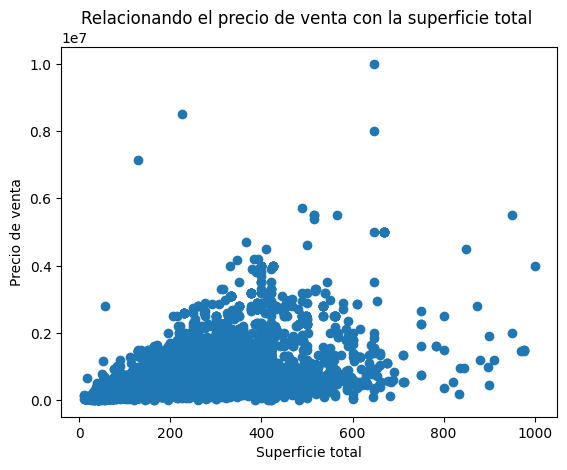

In [114]:
plt.scatter(df_train['property_surface_total'], price_train)
# Personaliza el gráfico
plt.xlabel('Superficie total')
plt.ylabel('Precio de venta')
plt.title('Relacionando el precio de venta con la superficie total ')
plt.show()

Eliminar las columnas que contienen el valor de Z-score ya que no nos aportara mas informacion al analisis.

In [115]:
columnas_z_eliminar = ['z_property_bedrooms', 'z_property_rooms', 'z_property_surface_total', 'z_property_surface_covered']
df_train.drop(columnas_z_eliminar, axis="columns", inplace=True)
df_train.columns

Index(['latitud', 'longitud', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'type_casa',
       'type_dpto', 'barrio_Palermo', 'barrio_Belgrano', 'barrio_Recoleta',
       'barrio_Caballito', 'barrio_Villa_Urquiza', 'barrio_Almagro'],
      dtype='object')

#**Preprocesamiento para el conjunto de test**

In [116]:
print("Porcentaje de valores NaN del DF de prueba")
display(df_test.isna().sum() / df_test.shape[0] * 100)

Porcentaje de valores NaN del DF de prueba


latitud                       3.905795
longitud                      3.905795
place_l4                     96.295316
place_l5                    100.000000
place_l6                    100.000000
property_rooms                1.148452
property_bedrooms            11.331040
property_surface_total        5.228897
property_surface_covered      3.397724
type_casa                     0.000000
type_dpto                     0.000000
barrio_Palermo                0.000000
barrio_Belgrano               0.000000
barrio_Recoleta               0.000000
barrio_Caballito              0.000000
barrio_Villa_Urquiza          0.000000
barrio_Almagro                0.000000
dtype: float64

Eliminar columnas place_l4, place_l5 y place_l6

In [117]:
df_test.drop(['place_l4', 'place_l5', 'place_l6'], axis="columns", inplace=True)

Imputar los datos faltantes por su media

In [118]:
media_latitud_test = df_test['latitud'].mean()
media_longitud_test = df_test['longitud'].mean()
media_property_rooms_test = df_test['property_rooms'].mean()
media_property_bedrooms_test = df_test['property_bedrooms'].mean()
media_property_surface_total_test = df_test['property_surface_total'].mean()
media_property_surface_covered_test = df_test['property_surface_covered'].mean()

In [119]:
df_test['latitud'].fillna(media_latitud_test, inplace=True)
df_test['longitud'].fillna(media_longitud_test, inplace=True)
df_test['property_rooms'].fillna(media_property_rooms_test, inplace=True)
df_test['property_bedrooms'].fillna(media_property_bedrooms_test, inplace=True)
df_test['property_surface_total'].fillna(media_property_surface_total_test, inplace=True)
df_test['property_surface_covered'].fillna(media_property_surface_covered_test, inplace=True)
df_test.astype("str").eq("nan").sum()

latitud                     0
longitud                    0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
type_casa                   0
type_dpto                   0
barrio_Palermo              0
barrio_Belgrano             0
barrio_Recoleta             0
barrio_Caballito            0
barrio_Villa_Urquiza        0
barrio_Almagro              0
dtype: int64

Eliminar observaciones eliminaddas en el conjunto de datos price_test que se borraron en el df_test

In [120]:
index_test= df_test.index
price_test=price_test.loc[index_test]

#**Bajar dataset de train y de test**

In [121]:
df_train.to_csv('df_train.csv')
price_train.to_csv('price_train.csv')
df_test.to_csv('df_test.csv')
price_test.to_csv('price_test.csv')

In [122]:
df_train.columns

Index(['latitud', 'longitud', 'property_rooms', 'property_bedrooms',
       'property_surface_total', 'property_surface_covered', 'type_casa',
       'type_dpto', 'barrio_Palermo', 'barrio_Belgrano', 'barrio_Recoleta',
       'barrio_Caballito', 'barrio_Villa_Urquiza', 'barrio_Almagro'],
      dtype='object')

#**Correlacion entre variables**

In [ ]:
df_train_num = df_train.select_dtypes(include=['float64'])
matriz_corr = df_train_num.corr()
matriz_corr

latitud  longitud  property_rooms  \
latitud                   1.000000 -0.441578        0.008556   
longitud                 -0.441578  1.000000       -0.008508   
property_rooms            0.008556 -0.008508        1.000000   
property_bedrooms         0.008394 -0.010132        0.809084   
property_surface_total    0.038569 -0.035621        0.532507   
property_surface_covered  0.035819 -0.022006        0.773309   

                          property_bedrooms  property_surface_total  \
latitud                            0.008394                0.038569   
longitud                          -0.010132               -0.035621   
property_rooms                     0.809084                0.532507   
property_bedrooms                  1.000000                0.484059   
property_surface_total             0.484059                1.000000   
property_surface_covered           0.701351                0.661013   

                          property_surface_covered  
latitud                                   0.035819  
longitud                                 -0.022006  
property_rooms                            0.773309  
property_bedrooms                         0.701351  
property_surface_total                    0.661013  
property_surface_covered                  1.000000

<Axes: >

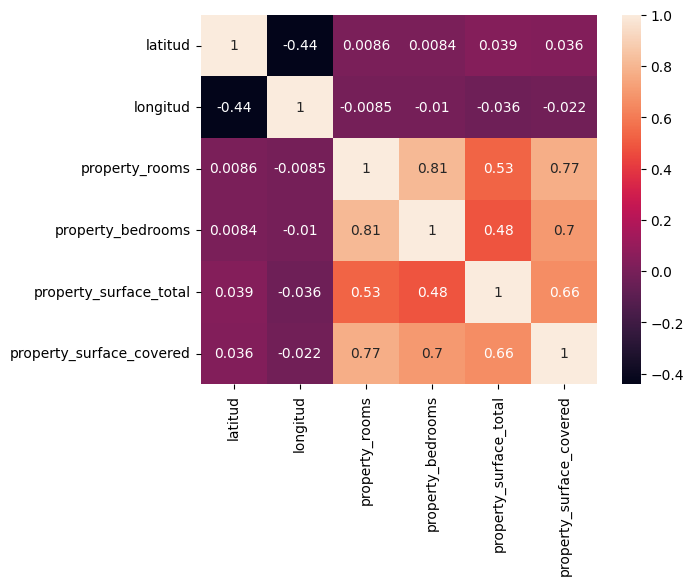

In [ ]:
sns.heatmap(df_train_num.corr(),annot=True)

Observamos algunas correlaciones interensantes entre variables (con un valor cercano a 1 o -1). Por ejemplo entre las variable de la cantiad de ambientes, la cantidad de dormitorios del inmueble, la superficie total y la superficie de la cubierta.

Tambien se puede apreciar un relacion lineal negativa ente la longitud y latitud.

Analizaremos los graficos de distribucion entre las variables con una correlacion cercana a 1 y -1.

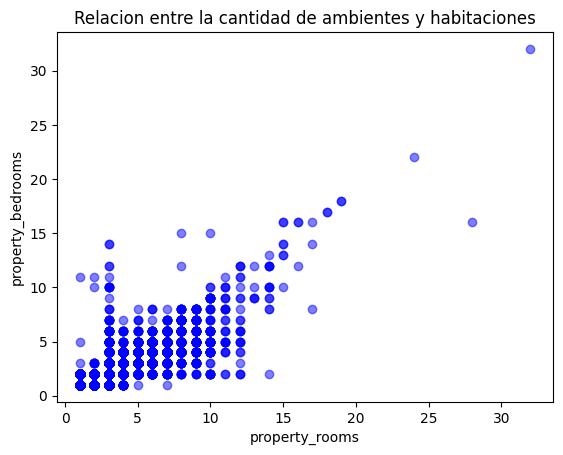

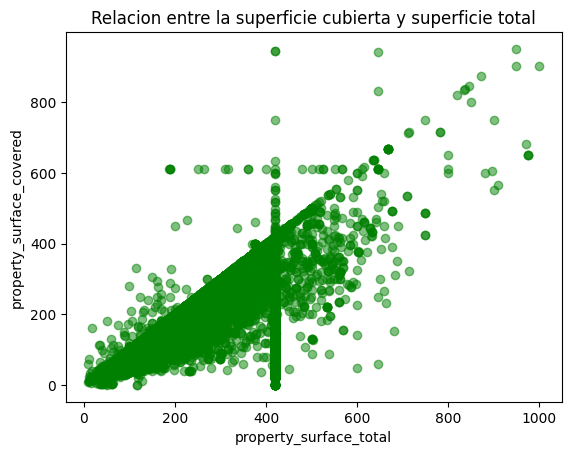

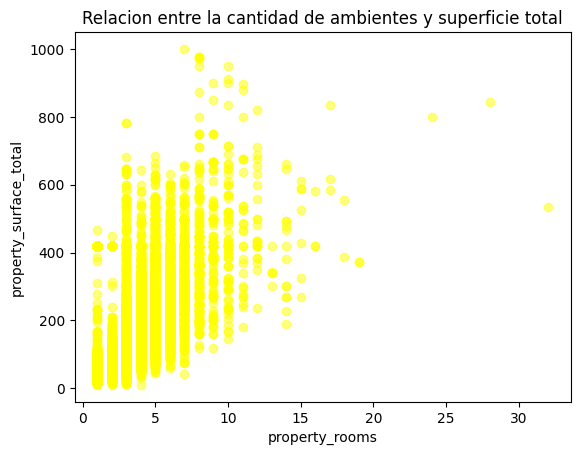

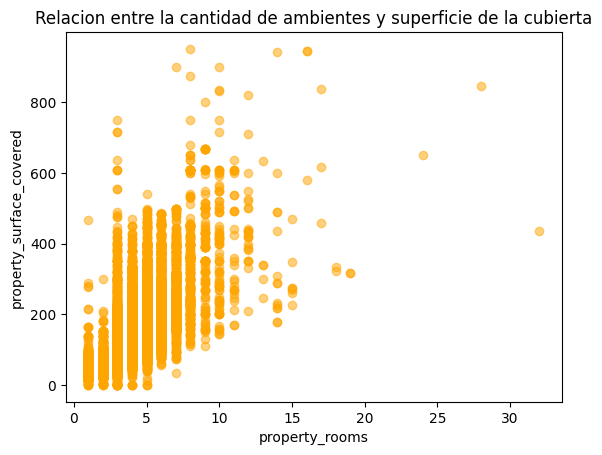

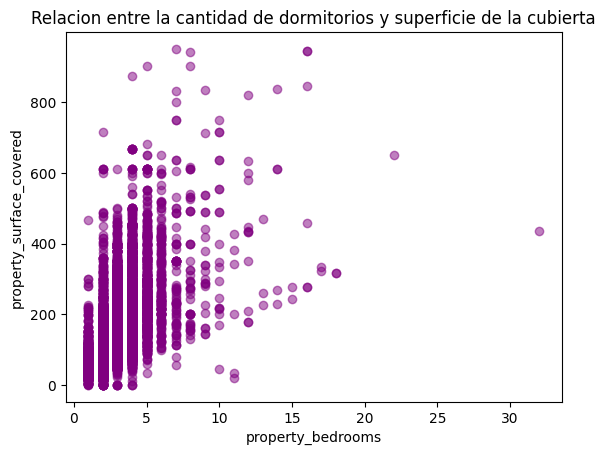

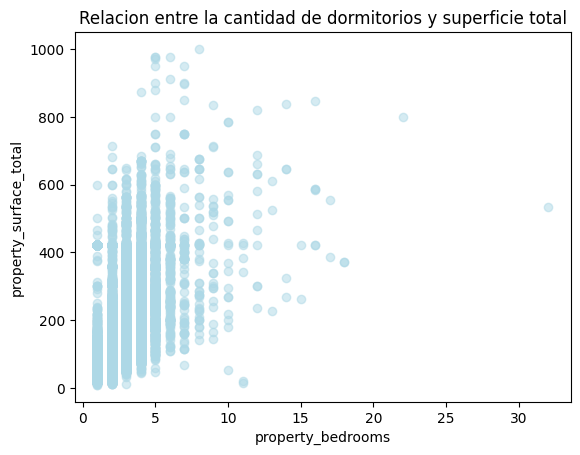

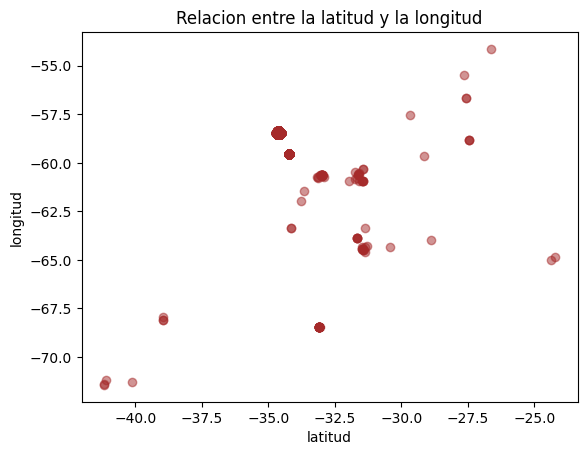

In [ ]:
def graficar_relacion(variable_x, variable_y, color, titulo):
   plt.scatter(df_train[variable_x], df_train[variable_y],label='data', color=color,alpha=0.5)
   plt.xlabel(variable_x)
   plt.ylabel(variable_y)
   plt.title(titulo)
   plt.show()

#Grafico entre dormitorios-ambientes
graficar_relacion('property_rooms', 'property_bedrooms', 'blue', "Relacion entre la cantidad de ambientes y habitaciones")
#Grafico entre superficie cubierta-superficie total
graficar_relacion('property_surface_total', 'property_surface_covered', 'green', "Relacion entre la superficie cubierta y superficie total")
#Grafico entre ambientes-superficie total
graficar_relacion('property_rooms', 'property_surface_total', 'yellow', "Relacion entre la cantidad de ambientes y superficie total")
#Grafico entre ambientes-superficie cubierta
graficar_relacion('property_rooms', 'property_surface_covered', 'orange', "Relacion entre la cantidad de ambientes y superficie de la cubierta")
#Grafico entre dormitorios-superficie cubierta
graficar_relacion('property_bedrooms', 'property_surface_covered', 'purple', "Relacion entre la cantidad de dormitorios y superficie de la cubierta")
#Grafico entre dormitorios-superficie total
graficar_relacion('property_bedrooms', 'property_surface_total', 'lightblue', "Relacion entre la cantidad de dormitorios y superficie total")
#Grafico entre longitud-latitud
graficar_relacion('latitud', 'longitud', 'brown', "Relacion entre la latitud y la longitud")


Notamos que entre la variable de dormitorios y ambientes tienden a tener una relacion lineal, al igual que entre las superficies totales y cubiertas y entre la cubierta con la cantidad de dormitorios y ambientes.

# **Agrupamiento**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import silhouette_score

Este dataset no tiene la eliminación de los outliers debido a la alta modificación en los datos realizados en dicho apartado.

In [ ]:
barrios=df_new_train["place_l3"].values
df_new_train["place_l3"]=le.fit_transform(df_new_train["place_l3"])
df_new_train.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l2', 'place_l3', 'operation', 'property_rooms',
       'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_currency', 'property_title',
       'type_casa', 'type_dpto'],
      dtype='object')

In [ ]:
df_new_train['typ']=df_new_train['type_casa'] + 2*(df_new_train['type_dpto'])
columnas_a_eliminar = ['id','start_date','created_on','end_date','operation','property_currency','property_title','type_casa','type_dpto']
df_new_train.drop(columnas_a_eliminar, axis="columns", inplace=True)

In [ ]:
df_new_train

latitud   longitud         place_l2  place_l3  property_rooms  \
11076  -34.228218 -59.554097  Capital Federal        35             5.0   
97969  -34.589855 -58.406316  Capital Federal        35             5.0   
453080 -34.623850 -58.377764  Capital Federal        40             2.0   
277802 -34.573932 -58.474268  Capital Federal        55             1.0   
97709  -34.621109 -58.466048  Capital Federal        17             2.0   
...           ...        ...              ...       ...             ...   
203156 -34.624150 -58.404265  Capital Federal        38             2.0   
445146 -34.545798 -58.469623  Capital Federal        24             1.0   
332847 -34.644207 -58.498511  Capital Federal        21             3.0   
35541  -34.577837 -58.495647  Capital Federal        55             2.0   
53922  -34.578178 -58.449308  Capital Federal        14             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
11076                 4.0                   202.0                182.000000   
97969                 3.0                   127.0                103.000000   
453080                1.0                    44.0                 42.000000   
277802                1.0                    34.0                 28.000000   
97709                 1.0                    41.0                 41.000000   
...                   ...                     ...                       ...   
203156                1.0                    89.0                 89.000000   
445146                1.0                    35.0                 32.000000   
332847                2.0                    73.0                 73.000000   
35541                 1.0                    72.0                 51.000000   
53922                 2.0                    70.0               3250.354418   

        typ  
11076     2  
97969     2  
453080    2  
277802    2  
97709     2  
...     ...  
203156    2  
445146    2  
332847    0  
35541     2  
53922     2  

[75297 rows x 9 columns]

Para decidir entre que variables se harán los clusters se hace un resumen de todos

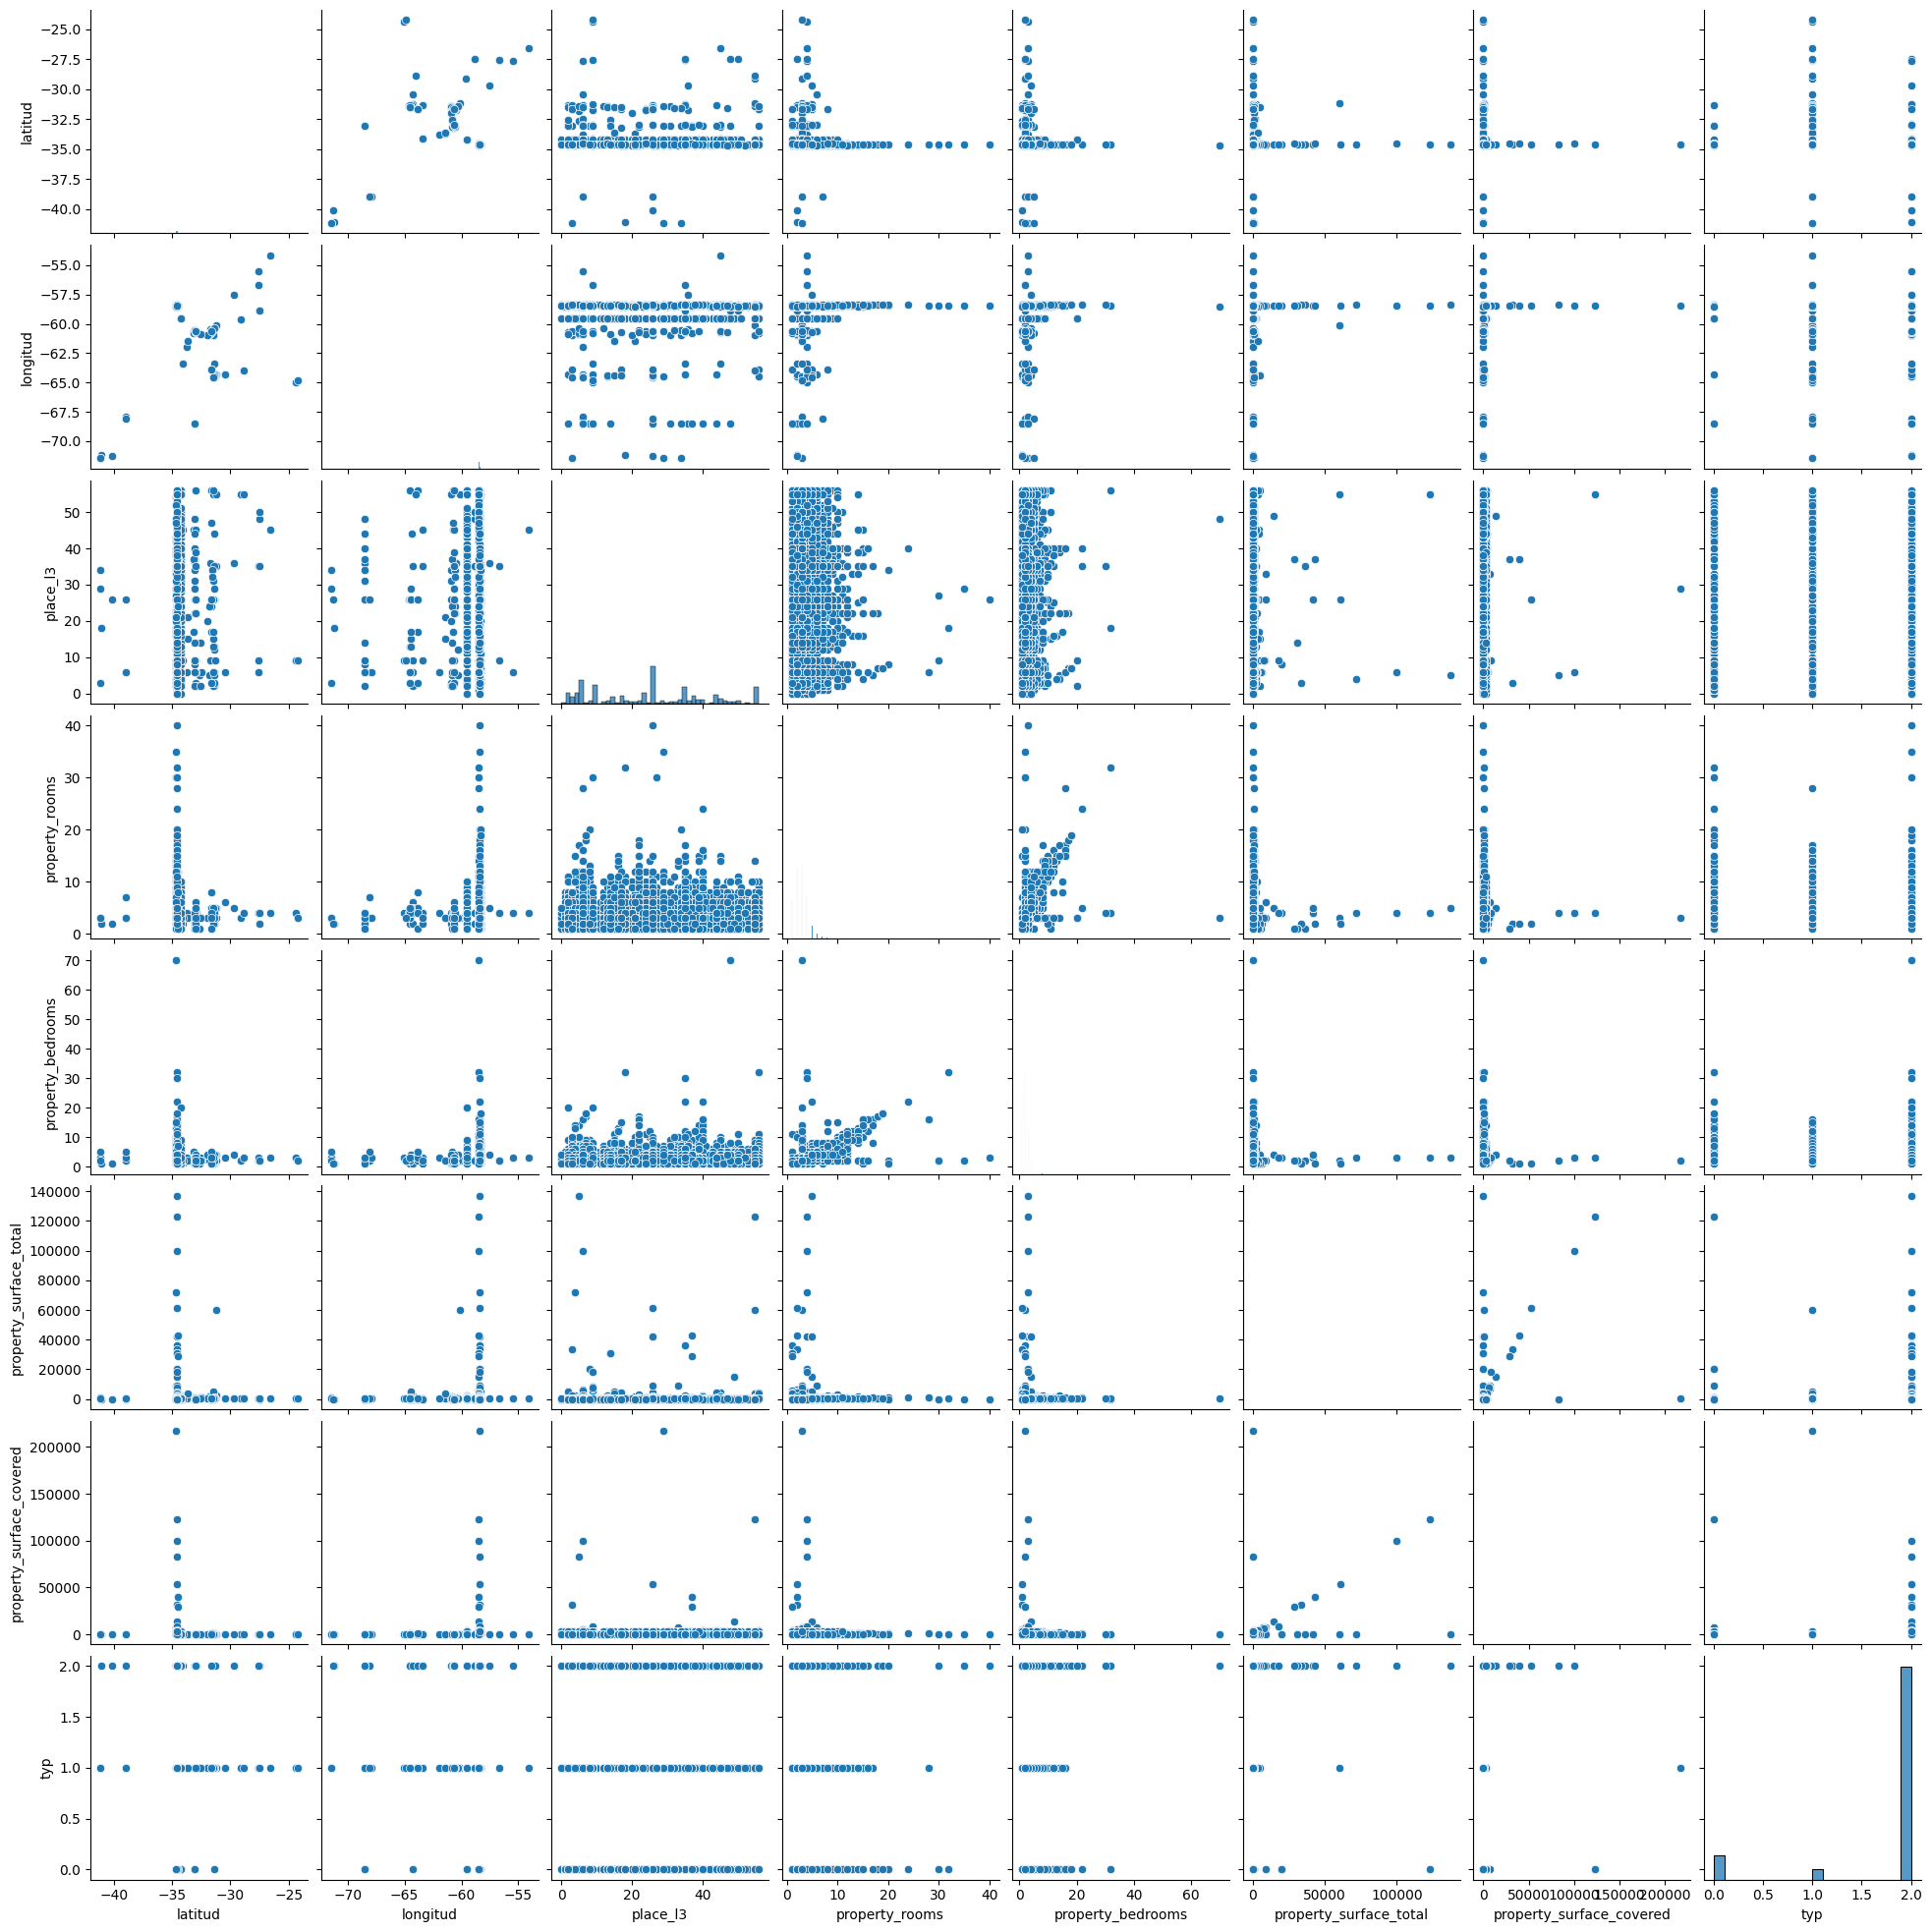

In [ ]:
sns.pairplot(df_new_train.select_dtypes(include=['float64', 'int64']))

Para observar la tendencia de clustering del dataset se deciden relizar el análisis de los siguientes conjuntos de variables:
1. longitud-latitud
2. longitud-place_l3
3. latitud-place_l3
4. type - placa_l3
5. property rooms-place_l3
6. property bedroom -place_l3
7. property room -property bedroom
8. property room- property_surce-total
9. type - property_surce-total


---


La elección fue tomada debido a que al obserbar el pair plot son los que más tendencia a agrupamientos parecen presentar

In [ ]:
def vector_creator(x,y,df=df_new_train):
    ys=df[y].values
    xs=df[x].values
    vector= [[xs[i], ys[i]] for i in range(len(ys))]
    return vector,xs,ys

In [ ]:
def cantidad_clusters(cart, min, max):
    sse = []
    list_k = list(range(min, max))

    for k in list_k:
        km = KMeans(n_clusters=k)
        km.fit(cart)
        sse.append(km.inertia_)

    # Grafico el SSE por K
    plt.figure(figsize=(6, 6))
    plt.plot(list_k, sse, '-o')
    plt.xlabel(r'Cantidad de clusters')
    plt.ylabel('SSE')
    plt.show()
    return

Pensamos en diferentes formas de agrupar las variables en conjuntos.



*   De acuerdo a la longitud y a la latitud podemos observar la cantidad de propiedades esparcidos por toda capital federal






In [ ]:
def silhouette_best(cart,min,max,interval):
    last_score=0.0
    max_c=min
    for nk_clusters in range(min,max,interval):
        clusterer = KMeans(n_clusters=nk_clusters)
        preds = clusterer.fit_predict(cart)
        score = silhouette_score (cart, preds)
        print ("For n_clusters =" + str(nk_clusters) + " silhouette score is " + str(score))
        if (score>last_score):
            max_c=nk_clusters
        else:
            break
        last_score=score
    print("Recomended clusters: ",max_c)
    return max_c

In [ ]:
def scatter_cluster(cart,x_vector,y_vector,clust):
    kmeans = KMeans(n_clusters=clust)  #Creamos un objeto de la clase KMeans para realizar el agrupamiento
    kmeans.fit(cart) #Entrenamos el algoritmo para que aprenda cómo agrupar
    y_kmeans = kmeans.predict(cart)
    plt.scatter(x_vector, y_vector, c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,marker='.')
    plt.show()
    return y_kmeans

1. Agrupamiento según Latitud y Longitud


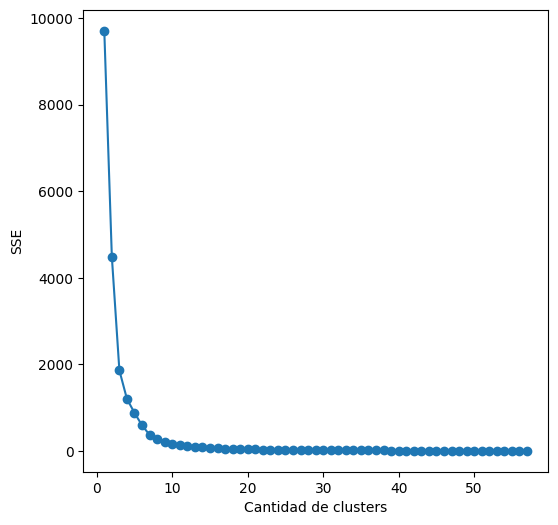

For n_clusters =2 silhouette score is 0.9512536929461055
For n_clusters =3 silhouette score is 0.9515769282064571
For n_clusters =4 silhouette score is 0.9517679748783612
For n_clusters =5 silhouette score is 0.9519233809350098
For n_clusters =6 silhouette score is 0.9521044265091073
For n_clusters =7 silhouette score is 0.9521581324592179
For n_clusters =8 silhouette score is 0.9522344842865179
For n_clusters =9 silhouette score is 0.4412417515504639
Recomended clusters:  8


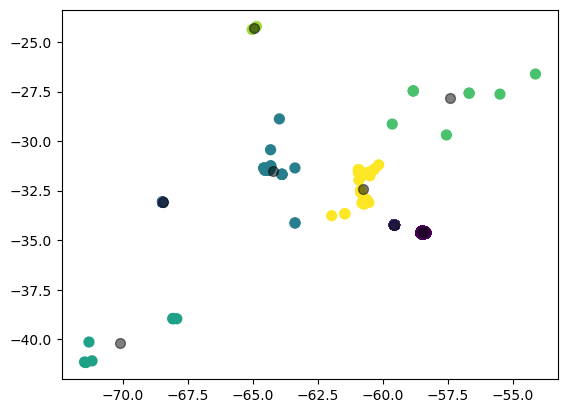

In [ ]:
print("1. Agrupamiento según Latitud y Longitud")
cart, long, lat=vector_creator("longitud","latitud")
cantidad_clusters(cart, 1, 58)
clust=silhouette_best(cart,2,10,1)
y_kmeans= scatter_cluster(cart,long,lat,clust)


Para tener una idea de como realmente se destribuirían los datos, es decir como son los grupos reales que existen (o sea la distribución por barrios), se decide hacer un gráfico de tipo scatter donde se colorea según el Barrio al cual pertenece cada coordenada.

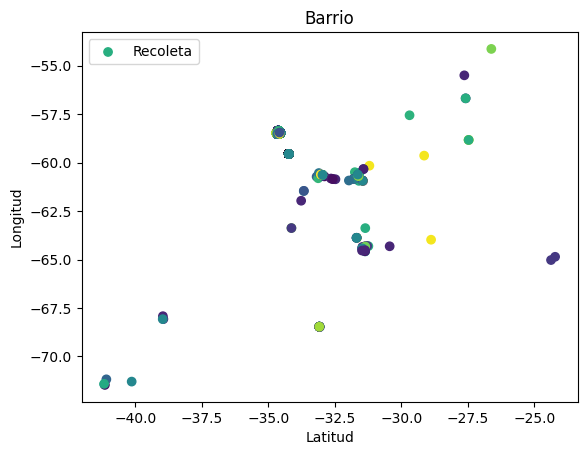

In [ ]:
# Crea el gráfico de dispersión
plt.scatter(df_new_train['latitud'],df_new_train['longitud'],c=df_new_train['place_l3'])

# Personaliza el gráfico
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title('Barrio')
plt.legend(barrios)

# Muestra el gráfico
plt.show()

<Axes: xlabel='latitud', ylabel='longitud'>

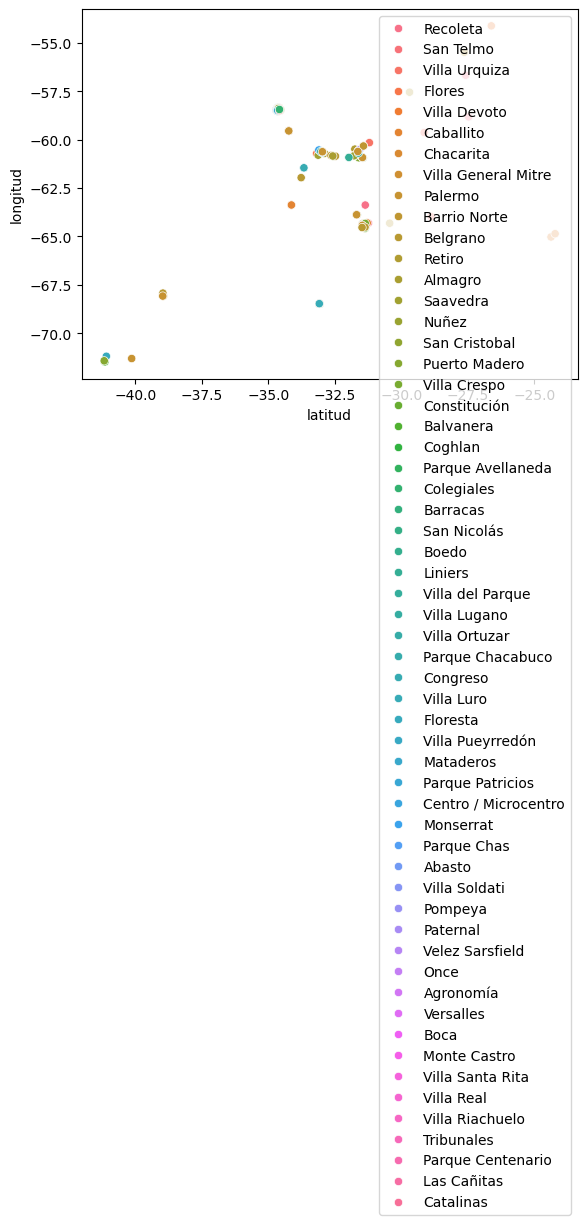

In [ ]:
sns.scatterplot(x=df_new_train['latitud'],y=df_new_train['longitud'],hue=barrios)

2. Agrupamiento según Latitud y Barrio


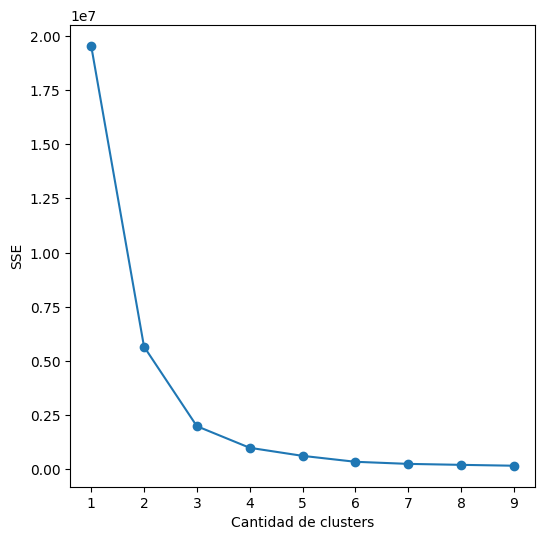

For n_clusters =2 silhouette score is 0.6246563319705357
For n_clusters =3 silhouette score is 0.6530662876126944
For n_clusters =4 silhouette score is 0.6832205862813862
For n_clusters =5 silhouette score is 0.6955376884389335
For n_clusters =6 silhouette score is 0.7237829990563229
For n_clusters =7 silhouette score is 0.6953086042290926
Recomended clusters:  6


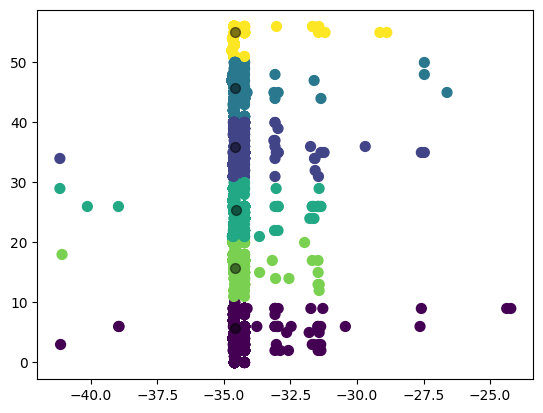

3. Agrupamiento según Longitud y Barrio


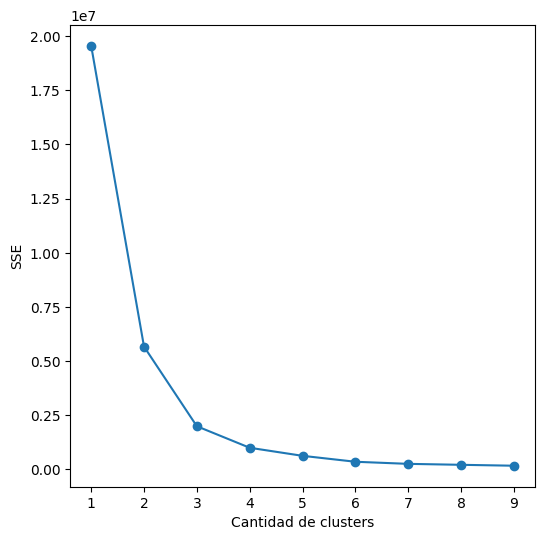

For n_clusters =2 silhouette score is 0.6238931014276394
For n_clusters =3 silhouette score is 0.6549572006371042
For n_clusters =4 silhouette score is 0.6809789598928512
For n_clusters =5 silhouette score is 0.6904825823603576
For n_clusters =6 silhouette score is 0.7201982307652924
For n_clusters =7 silhouette score is 0.681698266435656
Recomended clusters:  6


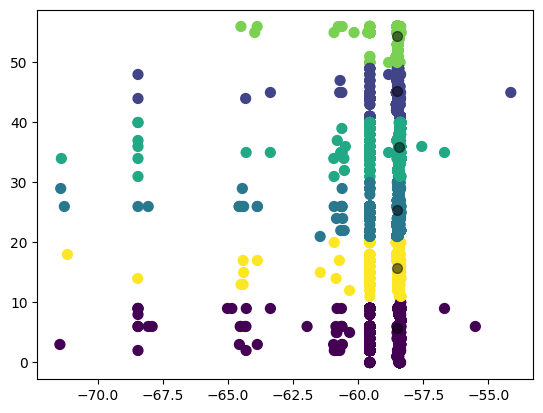

4. Agrupamiento según tipo de propiedad y Barrio


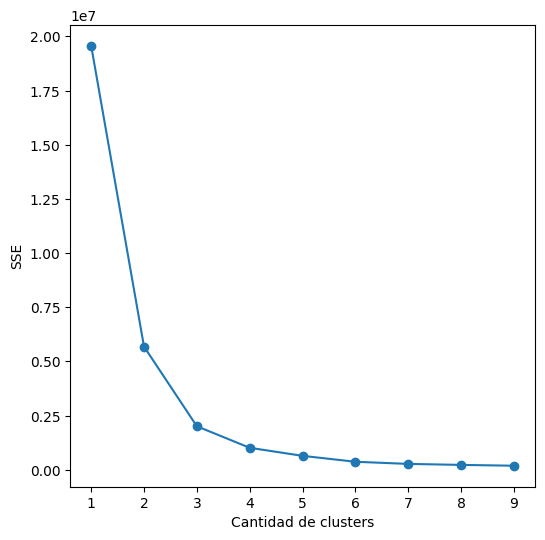

For n_clusters =2 silhouette score is 0.6220686060871055
For n_clusters =3 silhouette score is 0.6480928937181507
For n_clusters =4 silhouette score is 0.6745997710527208
For n_clusters =5 silhouette score is 0.681080448875357
For n_clusters =6 silhouette score is 0.7068040222785947
For n_clusters =7 silhouette score is 0.6647099405778393
Recomended clusters:  6


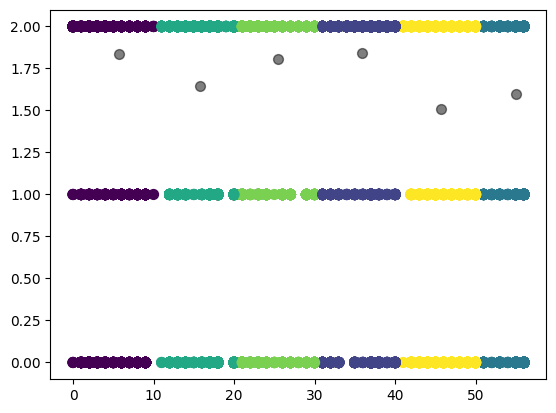

5. Agrupamiento según catidad de ambientes y Barrio


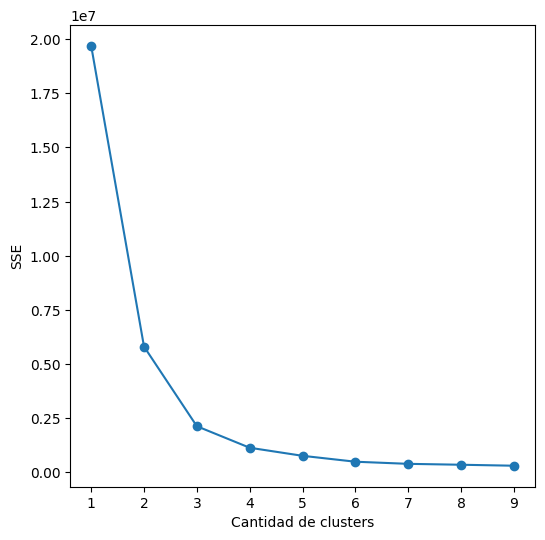

For n_clusters =2 silhouette score is 0.6096281521994337
For n_clusters =3 silhouette score is 0.6308897250798623
For n_clusters =4 silhouette score is 0.6369137649988664
For n_clusters =5 silhouette score is 0.6276926369125766
Recomended clusters:  4


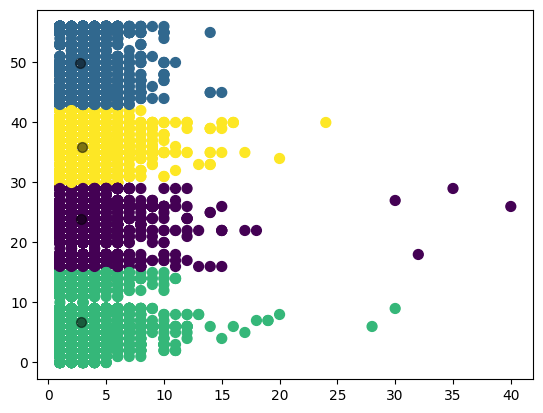

6. Agrupamiento según cantidad de dormitorios y Barrio


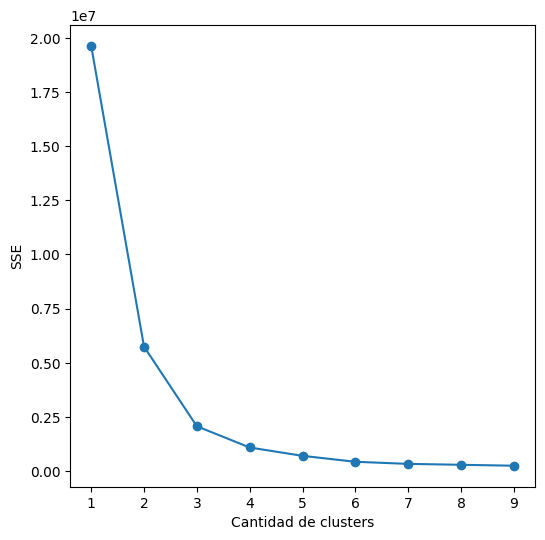

For n_clusters =2 silhouette score is 0.6152960181639314
For n_clusters =3 silhouette score is 0.6371351171913647
For n_clusters =4 silhouette score is 0.653822851845574
For n_clusters =5 silhouette score is 0.6352368057020744
Recomended clusters:  4


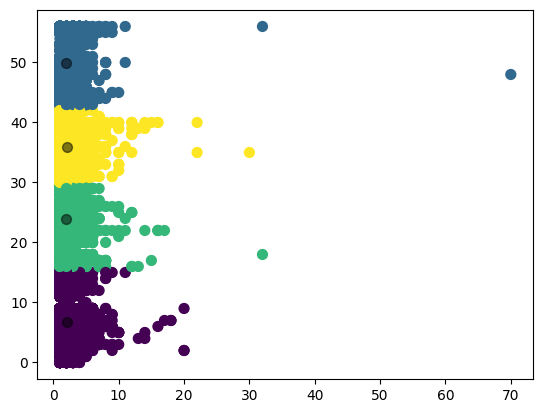

7. Agrupamiento según Ambientes y Dormitorios


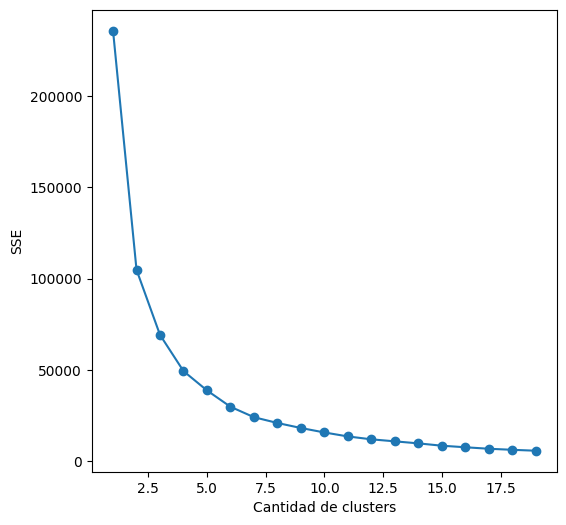

For n_clusters =2 silhouette score is 0.6214950506358663
For n_clusters =3 silhouette score is 0.6533923297245768
For n_clusters =4 silhouette score is 0.6964832530747193
For n_clusters =5 silhouette score is 0.7865222198798727
For n_clusters =6 silhouette score is 0.7895373521294083
For n_clusters =7 silhouette score is 0.8135090237755817
For n_clusters =8 silhouette score is 0.8682931953959913
For n_clusters =9 silhouette score is 0.8693595440482103
For n_clusters =10 silhouette score is 0.8908449052910812
For n_clusters =11 silhouette score is 0.8912368858416989
For n_clusters =12 silhouette score is 0.8914562708270253
For n_clusters =13 silhouette score is 0.9004949885444123
For n_clusters =14 silhouette score is 0.8955262641843456
Recomended clusters:  13


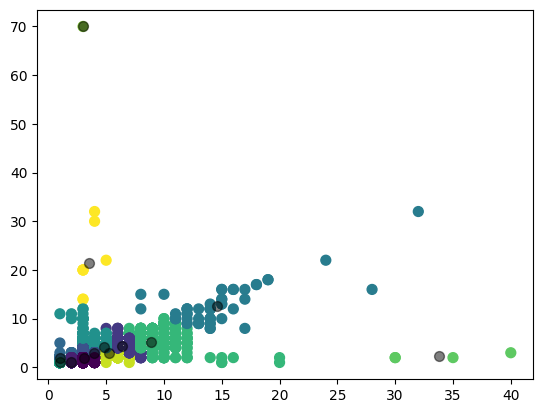

8. Agrupamiento según Ambientes y Supeficie


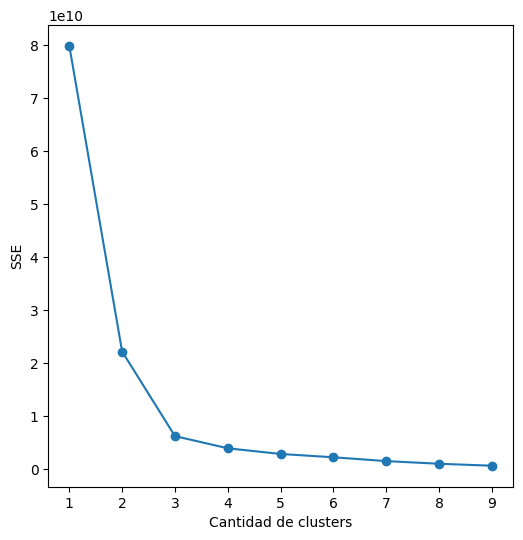

For n_clusters =2 silhouette score is 0.9978650752441022
For n_clusters =3 silhouette score is 0.9973888980697453
Recomended clusters:  2


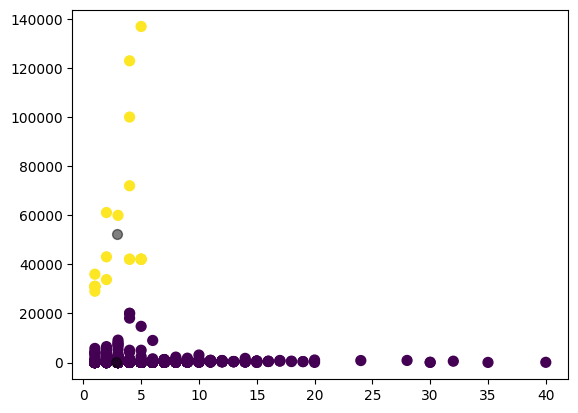

9. Agrupamiento según Tipo de propiedades y Supeficie


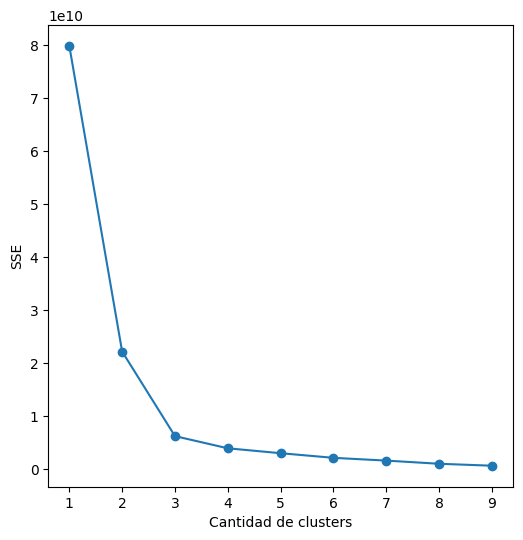

For n_clusters =2 silhouette score is 0.9978656269327795
For n_clusters =3 silhouette score is 0.9973896005895929
Recomended clusters:  2


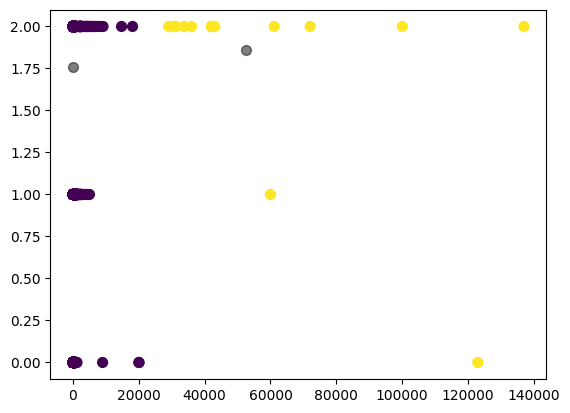

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
print("2. Agrupamiento según Latitud y Barrio")
vec, lat, barr=vector_creator("latitud","place_l3")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,8,1)
scatter_cluster(vec,lat,barr,clust)

print("3. Agrupamiento según Longitud y Barrio")
vec, long, barr=vector_creator("longitud","place_l3")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,long,barr,clust)

print("4. Agrupamiento según tipo de propiedad y Barrio")
vec, typ, barr=vector_creator("place_l3","typ")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,typ,barr,clust)

print("5. Agrupamiento según catidad de ambientes y Barrio")
vec, pr, barr=vector_creator("property_rooms","place_l3")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,pr,barr,clust)

print("6. Agrupamiento según cantidad de dormitorios y Barrio")
vec, pb, barr=vector_creator("property_bedrooms","place_l3")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,pb,barr,clust)

print("7. Agrupamiento según Ambientes y Dormitorios")
vec, pr, pb=vector_creator("property_rooms","property_bedrooms")
cantidad_clusters(vec, 1, 20)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,pr,pb,clust)

print("8. Agrupamiento según Ambientes y Supeficie")
vec, pr, pst=vector_creator("property_rooms","property_surface_total")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,pr,pst,clust)

print("9. Agrupamiento según Tipo de propiedades y Supeficie")
vec, typ, pst=vector_creator("property_surface_total","typ")
cantidad_clusters(vec, 1, 10)
clust=silhouette_best(vec,2,20,1)
scatter_cluster(vec,typ,pst,clust)

* Los agrupamientos de Latitud/Longitud barrio presentan 6 grupos cada uno. Como en realidad hay 57 barrios diversos debe haber una superpocición entre latitudes y longitudes de las propiedades que pertenecen a dichos barrios, por lo que no se puede confiar en la versosimilidad de dichos datos.
* Los agrupamintos según tipo y barrio presentan una cantidad de grupos diversa a 3 o 57 como consecuencia de las diferentes tendencias en tipo de propiedad en los distintos barrios. Es decir, en barrios como Recoleta, o Palermo hay una mayor tnedencia a departamnetos, mientras que en barrios como Mataderos hay una mayor cantidad de casas.
* Generalmente la cantidad de ambientes y cantidad de dormitorios están estrechamente relacionados al tipo de propiedad, consecuentemente la previa justificación aplica.
* Normalmente, hay una relación lineal positiva entre la cantidad de ambientes y dormitorios, entonces no se espera una fuerte tendencia a agrupamientos.
* Algo similar ocurre para la superficie total y la cantidad de ambientes, ya que se espera que cuanta mayor superficie tenga la propiedad más ambientes posea.
* El análisis hecho sobre conjuntos donde el tipo de propiedad es una variable que en sí presentan 3 grupos, consecuentemente se espera una cantidad de grupos de alrededor de dicho número al creer que propiedades del mismo tipo suelen tener superficies totales más semejantes entre si que con otros tipos de propiedades.



*   Podemos definir si una propiedad su tamanio de acuerdo al tamanio del area habitable, la cantidad de habiaciones y banios.



Dentro del mapa de C.A.B.A.




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

In [ ]:
df_caba = gpd.read_file("https://raw.githubusercontent.com/claudia-ramos/7506R-1C2024-GRUPO3/main/Datasets/barrios.csv")

Mapa

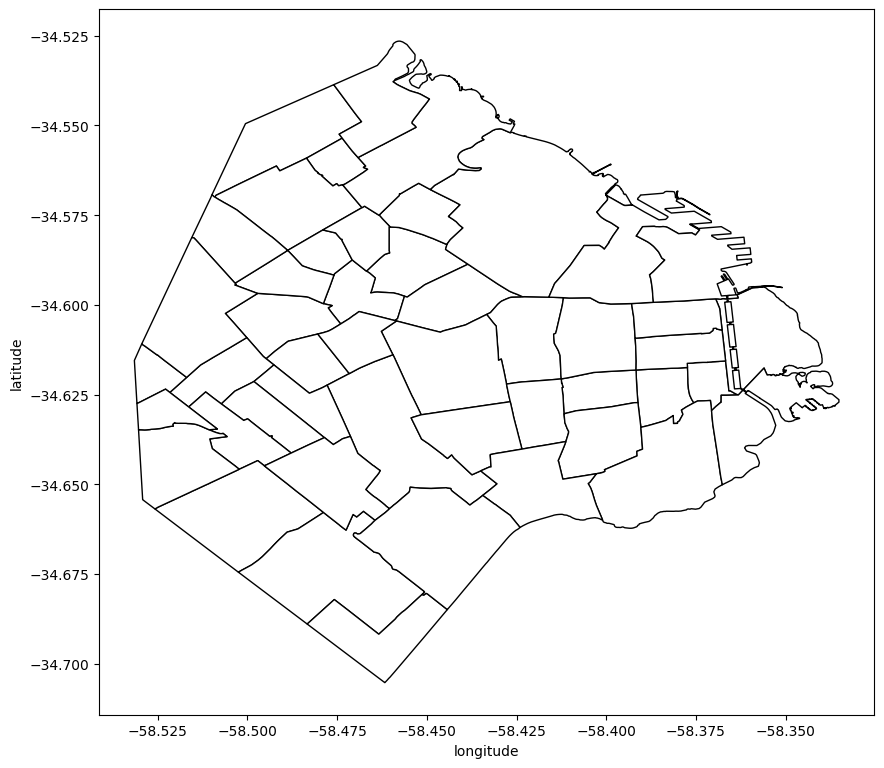

In [ ]:
fig, gax = plt.subplots(figsize=(10, 10))
df_caba.plot(ax=gax, edgecolor="black", color="white")
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
plt.show()

Eliminación de datos por fuera de la cuidad de Buenos Aires

In [ ]:
bnds=df_caba['geometry'].bounds
minx=min(bnds['minx'])
maxx=max(bnds['maxx'])
miny=min(bnds['miny'])
maxy=max(bnds['maxy'])

In [ ]:
df_coor=df_new_train[(df_new_train['latitud']>miny) & (df_new_train['latitud']< maxy) & (df_new_train['longitud']>minx) & (df_new_train['longitud']<maxx)]

Agrupación de los datos filtrados en la cantidad de clusters calculada mediante silhouette. Esto da que la mejor agrupación es con 3 grupos, a diferencia de previo la eliminación de los datos con ubicación por fuera de la delimitación buscada donde se recomendaban 8 grupos

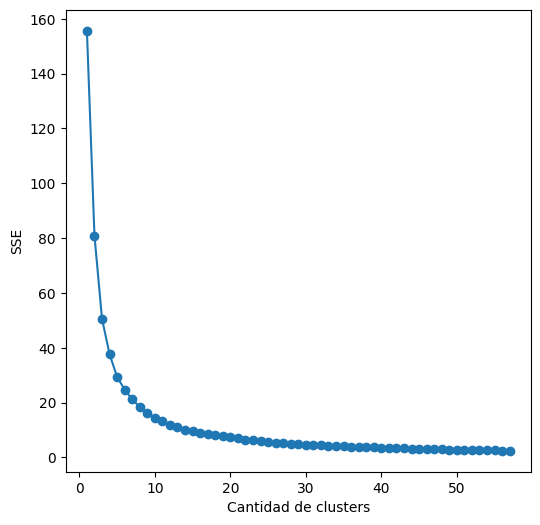

For n_clusters =2 silhouette score is 0.41902359068142286
For n_clusters =3 silhouette score is 0.45696684824587247
For n_clusters =4 silhouette score is 0.3899173206027538
Recomended clusters:  3


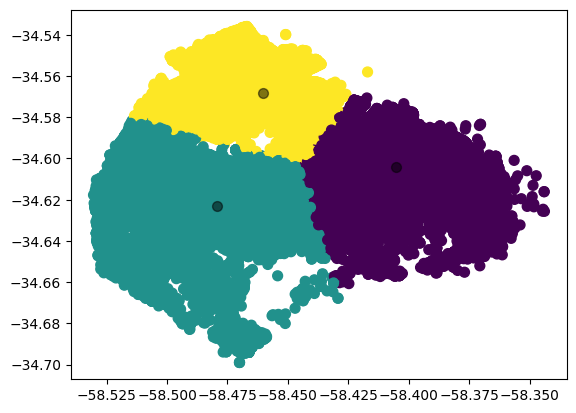

In [ ]:
cart, long, lat=vector_creator("longitud","latitud",df_coor)
cantidad_clusters(cart, 1, 58)
clust=silhouette_best(cart,2,10,1)
y_kmeans= scatter_cluster(cart,long,lat,clust)

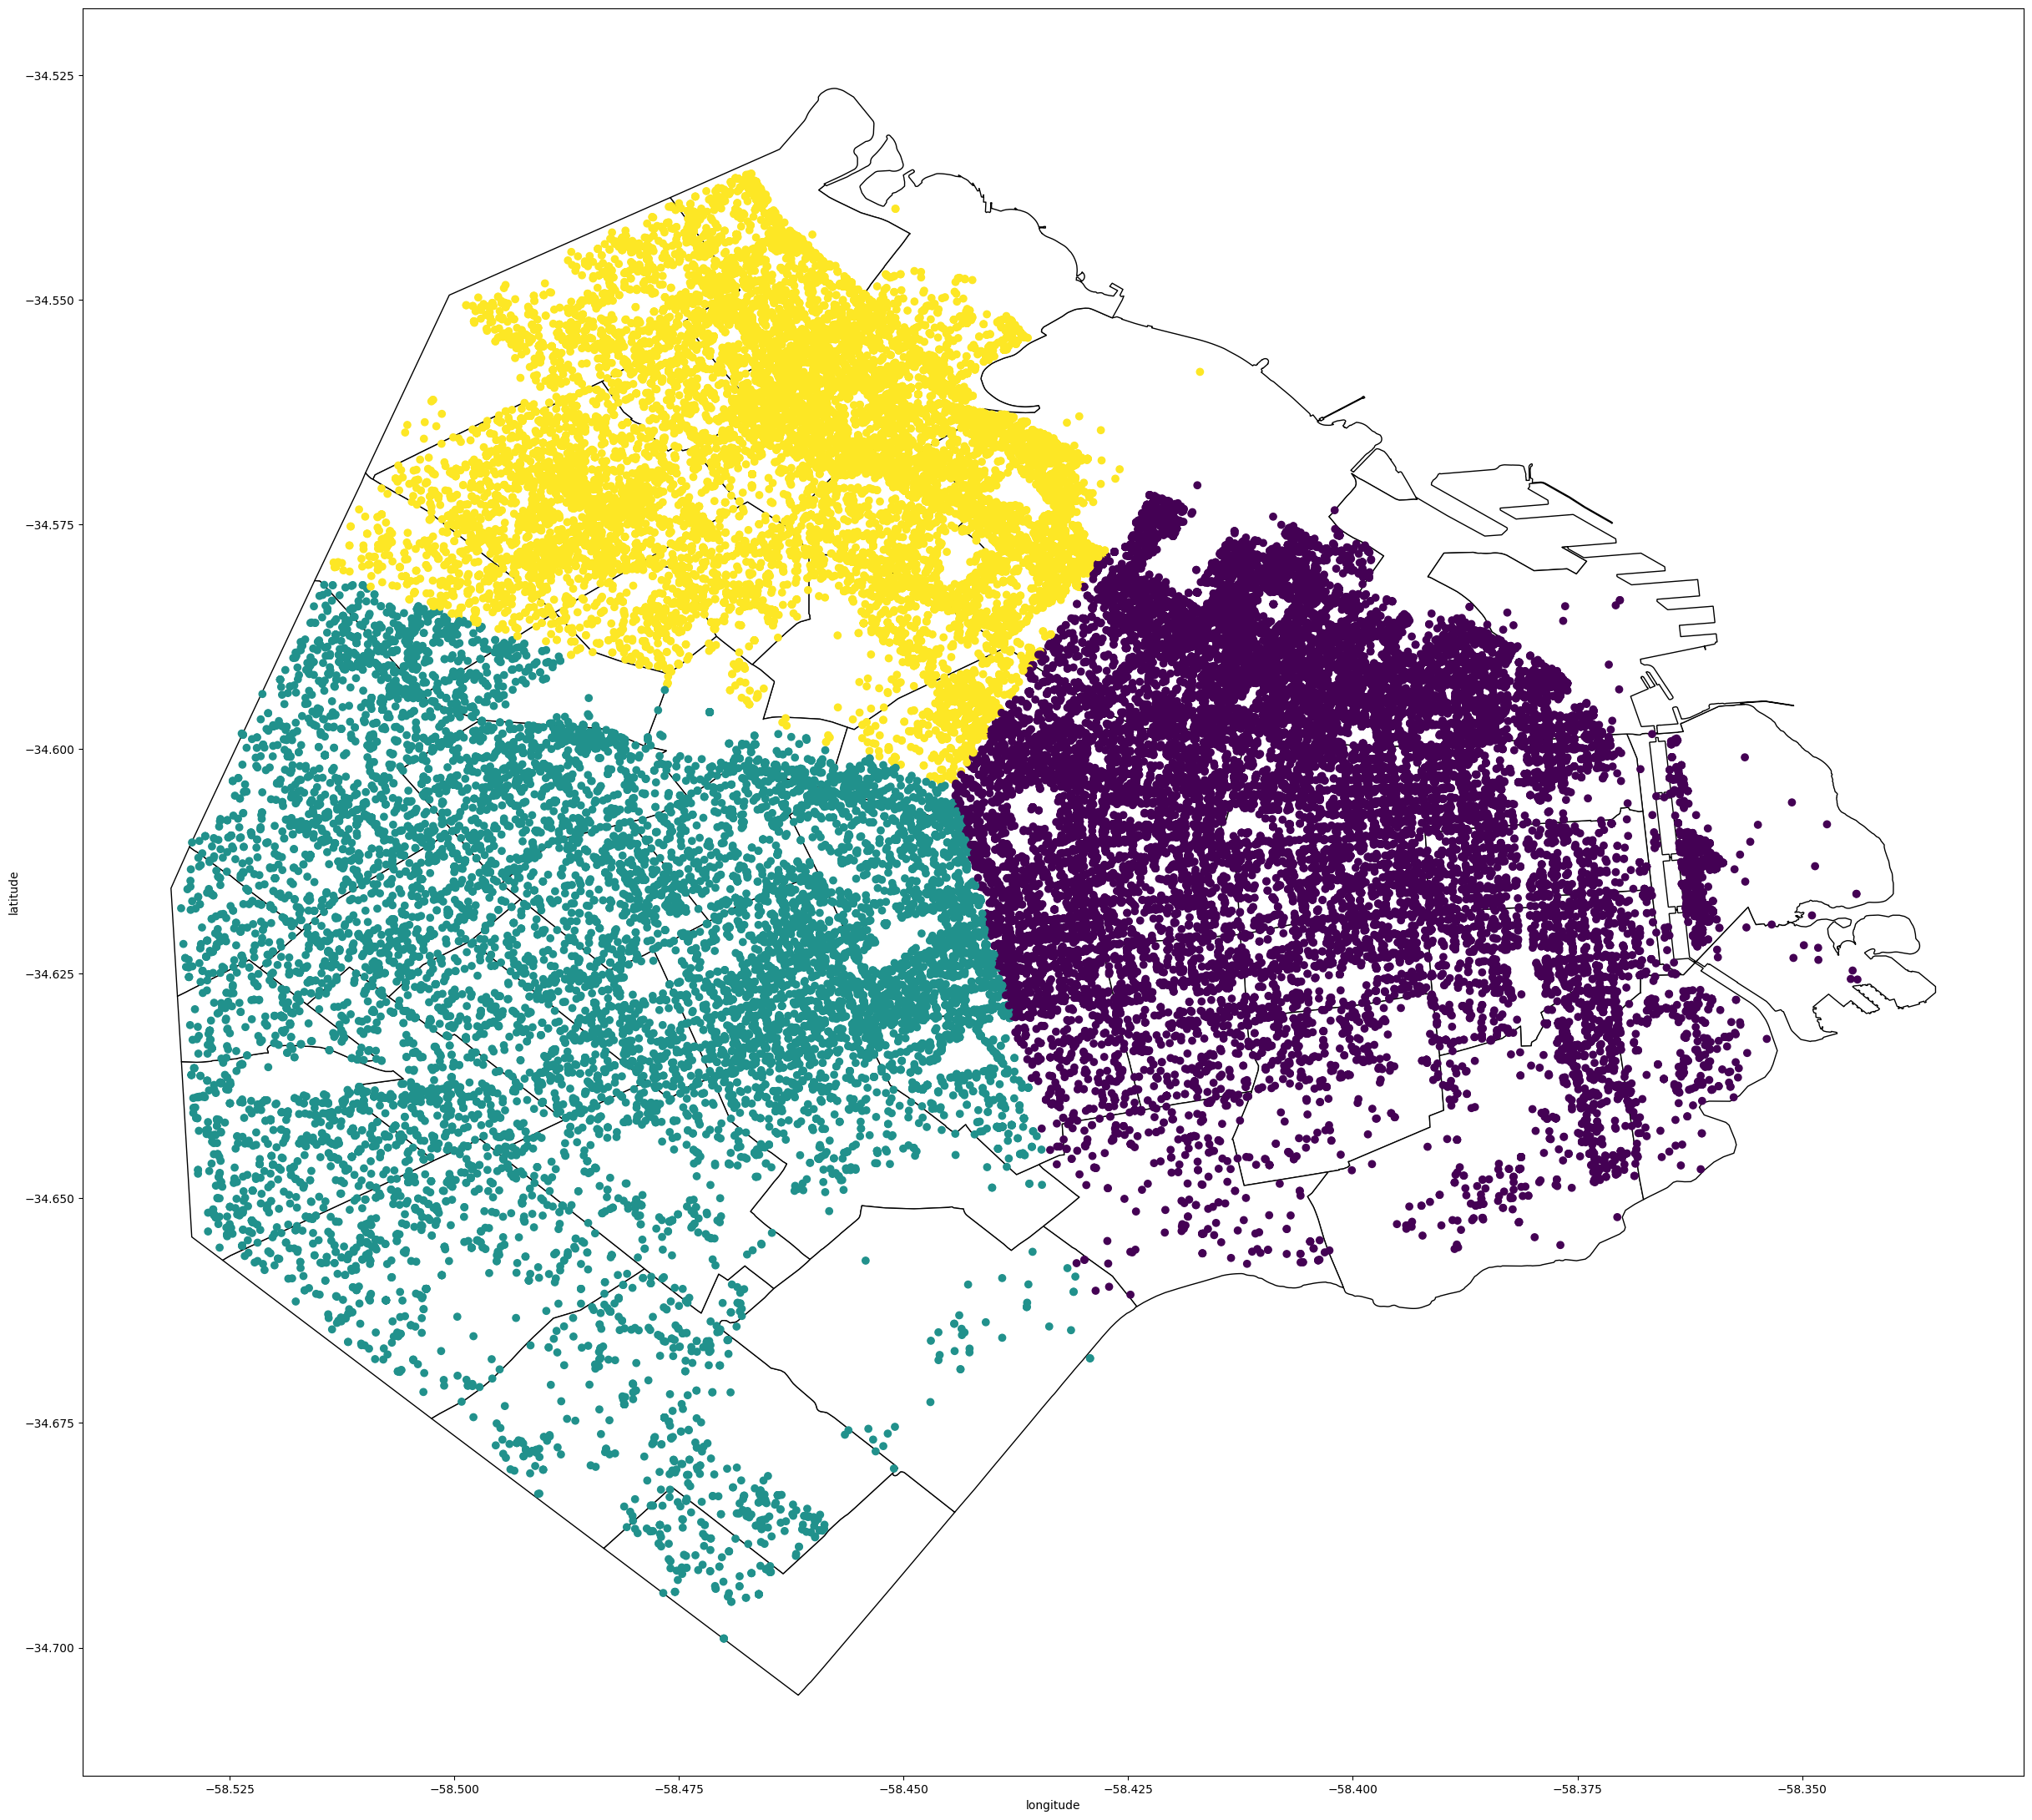

In [ ]:
fig, gax = plt.subplots(figsize=(30, 30))
df_caba.plot(ax=gax, edgecolor="black", color="white")
gax.scatter(long, lat, c=y_kmeans)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
plt.show()

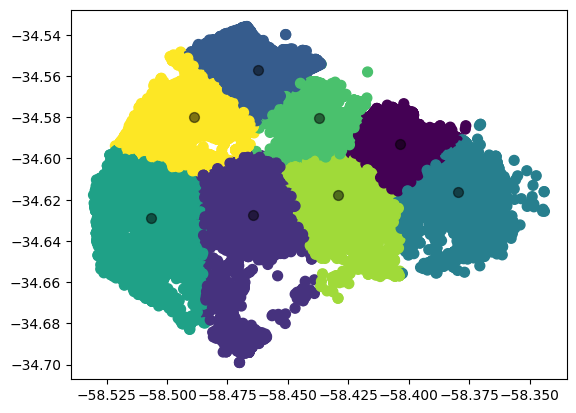

In [ ]:
cart, long, lat=vector_creator("longitud","latitud",df_coor)
y_kmeans= scatter_cluster(cart,long,lat,8)

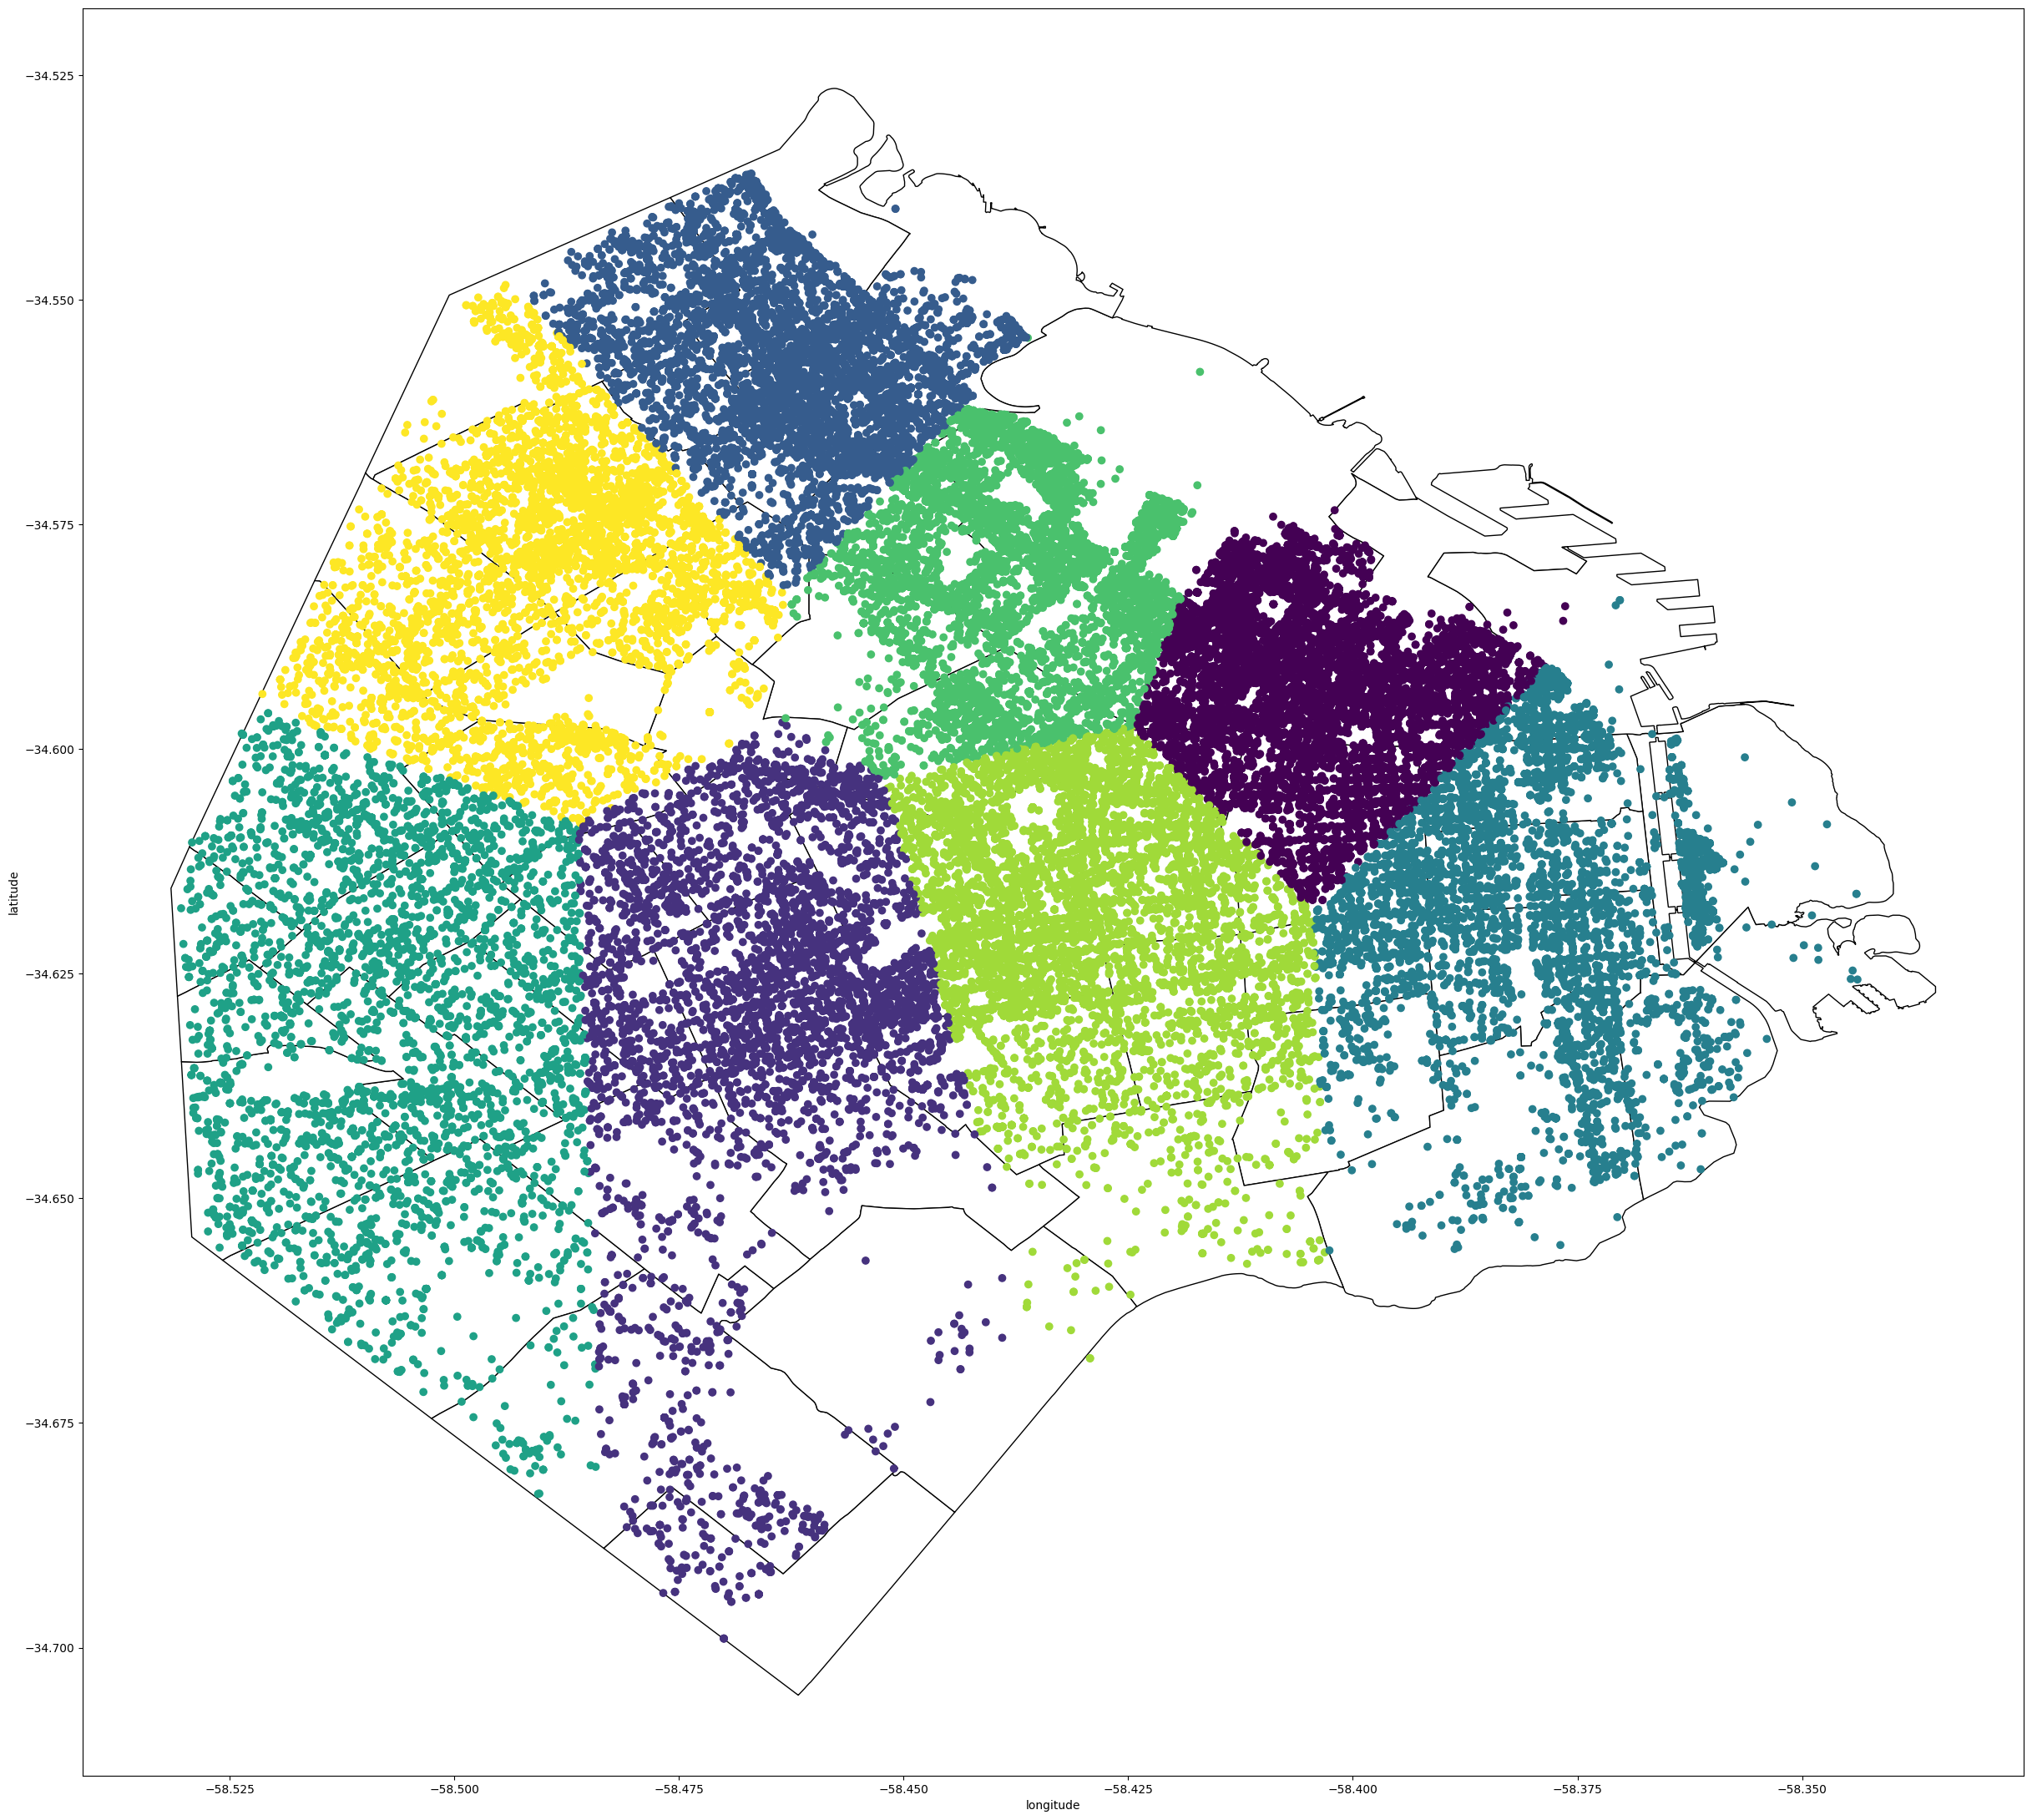

In [ ]:
fig, gax = plt.subplots(figsize=(30, 30))
df_caba.plot(ax=gax, edgecolor="black", color="white")
gax.scatter(long, lat, c=y_kmeans)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
plt.show()

Vale aclarar que si se toman las coordenads como válidas entonces habría que hacer un nuevo filtrado donde se eliminan todos aquellas propiedades que quedarían por fuera del area delimitada de Ciudad de Buenos Aires